# All Plant Disease Classification

### Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

### Import data into tensorflow dataset object

Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.8 0.1 0.1 -- ./training/PlantVillage/


In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        r"C:\Users\DELL\Desktop\Satyajit Project\Main Project\training\output\train",
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 16504 images belonging to 15 classes.


In [4]:
train_generator.class_indices

{'Pepper_bell_Bacterial_spot': 0,
 'Pepper_bell_healthy': 1,
 'Potato_Early_blight': 2,
 'Potato_Late_blight': 3,
 'Potato_healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 10,
 'Tomato_Target_Spot': 11,
 'Tomato_YellowLeaf_Curl_Virus': 12,
 'Tomato_healthy': 13,
 'Tomato_mosaic_virus': 14}

In [36]:
class_names = list(train_generator.class_indices.keys())
class_names

['Pepper_bell_Bacterial_spot',
 'Pepper_bell_healthy',
 'Potato_Early_blight',
 'Potato_Late_blight',
 'Potato_healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato_Target_Spot',
 'Tomato_YellowLeaf_Curl_Virus',
 'Tomato_healthy',
 'Tomato_mosaic_virus']

In [6]:
!pip install scipy

In [7]:
import scipy

In [8]:
for image_batch,label_batch in train_generator:
    print(image_batch[0])

[[[0.6051357  0.5570497  0.58305347]
  [0.609574   0.5606004  0.58704793]
  [0.61401236 0.5641511  0.59104246]
  ...
  [0.65426195 0.6111247  0.64249724]
  [0.6517721  0.6086348  0.6400074 ]
  [0.72333884 0.6802016  0.71157414]]

 [[0.58181417 0.5386769  0.5622063 ]
  [0.58137035 0.5382331  0.5617625 ]
  [0.58092654 0.5377893  0.5613187 ]
  ...
  [0.6467168  0.6035795  0.63495207]
  [0.6553228  0.61218554 0.6435581 ]
  [0.73399097 0.69085366 0.72222626]]

 [[0.58990103 0.5467638  0.5702932 ]
  [0.58812577 0.5449885  0.5685179 ]
  [0.58635044 0.5432132  0.5667426 ]
  ...
  [0.63917154 0.5960343  0.62740684]
  [0.6588735  0.6157362  0.6471088 ]
  [0.74464303 0.7015058  0.7328783 ]]

 ...

 [[0.46633857 0.41927975 0.4741817 ]
  [0.48093972 0.43388087 0.48878285]
  [0.48589602 0.4388372  0.49373916]
  ...
  [0.51096785 0.46390906 0.5031247 ]
  [0.5022445  0.45518562 0.4944013 ]
  [0.5106773  0.4636185  0.50283414]]

 [[0.4671296  0.42007074 0.47497272]
  [0.48244348 0.43538466 0.49028662]


[[[0.63413125 0.62236655 0.6890332 ]
  [0.60291684 0.59115213 0.6578188 ]
  [0.5474938  0.5357291  0.6023958 ]
  ...
  [0.684465   0.6805434  0.7432885 ]
  [0.6824779  0.6785563  0.7413014 ]
  [0.6804907  0.6765691  0.7393142 ]]

 [[0.6333033  0.6215386  0.68820524]
  [0.6060632  0.5942985  0.66096514]
  [0.54914975 0.53738505 0.6040517 ]
  ...
  [0.62726665 0.6233451  0.6860902 ]
  [0.6241204  0.62019885 0.68294394]
  [0.6209741  0.61705256 0.67979765]]

 [[0.6324754  0.6207107  0.68737733]
  [0.6092094  0.5974447  0.6641114 ]
  [0.5508057  0.539041   0.60570765]
  ...
  [0.63698095 0.6330594  0.6958045 ]
  [0.64343905 0.6395175  0.7022626 ]
  [0.6498972  0.64597565 0.70872074]]

 ...

 [[0.29398134 0.2626088  0.32143232]
  [0.28967592 0.25830337 0.3171269 ]
  [0.2853705  0.25399795 0.31282148]
  ...
  [0.34117648 0.3137255  0.37647063]
  [0.40055424 0.37310326 0.43584836]
  [0.3562357  0.32878473 0.39152983]]

 [[0.3533528  0.32198024 0.38080376]
  [0.36378518 0.33241263 0.39123616]


[[[0.4832789  0.46759263 0.5264162 ]
  [0.47899914 0.46331286 0.5221364 ]
  [0.47471938 0.4590331  0.51785666]
  ...
  [0.38034338 0.3472306  0.40953454]
  [0.38407052 0.3487764  0.41544306]
  [0.3471207  0.31347093 0.37684897]]

 [[0.5196951  0.5040088  0.56283236]
  [0.51296973 0.4972835  0.55610704]
  [0.5062444  0.49055815 0.5493817 ]
  ...
  [0.39134848 0.3576243  0.42115104]
  [0.37123126 0.33593714 0.4026038 ]
  [0.3507891  0.3177507  0.37990597]]

 [[0.5782457  0.5625594  0.621383  ]
  [0.56724066 0.5515544  0.6103779 ]
  [0.55623555 0.5405493  0.5993728 ]
  ...
  [0.40235355 0.36801803 0.43276754]
  [0.35839197 0.32309785 0.38976452]
  [0.35445747 0.32203043 0.3829629 ]]

 ...

 [[0.5882353  0.5921569  0.67058825]
  [0.5882353  0.5921569  0.67058825]
  [0.59198856 0.59591013 0.6743415 ]
  ...
  [0.45463777 0.44679463 0.5330692 ]
  [0.4531661  0.44532296 0.53159744]
  [0.45010912 0.442266   0.5285405 ]]

 [[0.5882353  0.5921569  0.67058825]
  [0.58872634 0.5926479  0.67107934]


[[[0.6794776  0.6637913  0.7226148 ]
  [0.650866   0.6351797  0.6940032 ]
  [0.63758856 0.6219023  0.6807258 ]
  ...
  [0.5309236  0.5073942  0.56229615]
  [0.52366394 0.5001345  0.5550365 ]
  [0.5144605  0.49093106 0.54583305]]

 [[0.6840793  0.668393   0.7272166 ]
  [0.653742   0.63805574 0.69687927]
  [0.6358629  0.6201766  0.67900014]
  ...
  [0.470801   0.4472716  0.50217354]
  [0.47553775 0.45200834 0.50691026]
  [0.49164382 0.4681144  0.5230164 ]]

 [[0.68567294 0.66998667 0.7288102 ]
  [0.6576478  0.6419615  0.70078504]
  [0.6372224  0.62153614 0.68035966]
  ...
  [0.56804794 0.54451853 0.5994205 ]
  [0.567964   0.5444346  0.59933656]
  [0.5501323  0.52660286 0.5815048 ]]

 ...

 [[0.7207974  0.7129543  0.76785624]
  [0.71964693 0.7118038  0.7667058 ]
  [0.7184965  0.71065336 0.7655553 ]
  ...
  [0.6546567  0.6418729  0.6953236 ]
  [0.60304916 0.595206   0.6461864 ]
  [0.62924063 0.6213975  0.6723779 ]]

 [[0.7133823  0.70553917 0.7604411 ]
  [0.71280706 0.7049639  0.7598659 ]


[[[0.5387545  0.4916957  0.54659766]
  [0.5372549  0.4901961  0.54509807]
  [0.5478924  0.5008336  0.5557355 ]
  ...
  [0.73449314 0.6874343  0.7423363 ]
  [0.73852235 0.6914635  0.7463655 ]
  [0.73921466 0.69215584 0.7470578 ]]

 [[0.53898525 0.4919265  0.5468284 ]
  [0.5372549  0.4901961  0.54509807]
  [0.5477193  0.5006605  0.55556244]
  ...
  [0.7243208  0.677262   0.73216397]
  [0.7316054  0.6845466  0.73944855]
  [0.7313746  0.6843158  0.73921776]]

 [[0.5390953  0.49203643 0.5469384 ]
  [0.5377281  0.49066925 0.5455712 ]
  [0.54814476 0.50108594 0.5559879 ]
  ...
  [0.758428   0.71136916 0.7662711 ]
  [0.7665119  0.7194531  0.77435505]
  [0.7671465  0.7200877  0.77498966]]

 ...

 [[0.72473705 0.6698351  0.7286586 ]
  [0.7246217  0.6697197  0.7285433 ]
  [0.7295036  0.6746016  0.73342514]
  ...
  [0.789551   0.7424922  0.79739416]
  [0.78706986 0.74001104 0.794913  ]
  [0.7740357  0.7269769  0.7818788 ]]

 [[0.7153901  0.66048807 0.71931165]
  [0.7150439  0.66014194 0.7189655 ]


[[[0.46737048 0.4516842  0.51835084]
  [0.46417993 0.44849366 0.5151603 ]
  [0.46098936 0.44530308 0.51196975]
  ...
  [0.74658006 0.7387369  0.7897173 ]
  [0.7563818  0.7485387  0.79951906]
  [0.7520053  0.74416214 0.79514253]]

 [[0.47562894 0.45994267 0.5266093 ]
  [0.47594798 0.4602617  0.52692837]
  [0.47626704 0.46058077 0.5272474 ]
  ...
  [0.7475372  0.73969406 0.79067445]
  [0.75606275 0.7482196  0.7992    ]
  [0.75136715 0.743524   0.7945044 ]]

 [[0.43266767 0.4169814  0.4836481 ]
  [0.43745354 0.42176726 0.48843393]
  [0.44223937 0.4265531  0.49321976]
  ...
  [0.7484944  0.74065125 0.79163164]
  [0.7557437  0.74790055 0.79888093]
  [0.7507291  0.74288595 0.79386634]]

 ...

 [[0.44060478 0.4249185  0.49158517]
  [0.42887905 0.41319278 0.47985944]
  [0.4256548  0.40996853 0.4766352 ]
  ...
  [0.7130147  0.7051716  0.76007354]
  [0.7142909  0.7064478  0.7613498 ]
  [0.7155672  0.70772403 0.762626  ]]

 [[0.4396476  0.4239613  0.490628  ]
  [0.42792186 0.4122356  0.47890228]


[[[0.4097069  0.3979422  0.46460885]
  [0.4354502  0.4236855  0.49035215]
  [0.4515688  0.4398041  0.5064708 ]
  ...
  [0.63707453 0.6253098  0.6998196 ]
  [0.63732827 0.62556356 0.70007336]
  [0.637582   0.6258173  0.7003271 ]]

 [[0.4081845  0.3964198  0.4630865 ]
  [0.43367407 0.42190936 0.48857605]
  [0.4510613  0.4392966  0.50596327]
  ...
  [0.62681055 0.61504585 0.68955564]
  [0.62503445 0.61326975 0.68777955]
  [0.6232583  0.6114936  0.68600345]]

 [[0.40666214 0.39489743 0.4615641 ]
  [0.43189797 0.42013326 0.48679993]
  [0.45055386 0.43878916 0.50545585]
  ...
  [0.58883345 0.57706875 0.65157855]
  [0.58553493 0.5737702  0.64828   ]
  [0.5822364  0.5704717  0.6449815 ]]

 ...

 [[0.3830341  0.35558313 0.38695568]
  [0.38151172 0.35406074 0.3854333 ]
  [0.37998933 0.35253835 0.3839109 ]
  ...
  [0.4991436  0.48345733 0.54228085]
  [0.51537263 0.49968636 0.5585099 ]
  [0.55992275 0.5442365  0.60306   ]]

 [[0.37471488 0.3472639  0.37863645]
  [0.37496862 0.34751764 0.3788902 ]


[[[0.5049328  0.49708965 0.5794426 ]
  [0.48708925 0.48581612 0.56816906]
  [0.48061323 0.4845348  0.56688774]
  ...
  [0.75294125 0.74509805 0.82745105]
  [0.75294125 0.74509805 0.82745105]
  [0.75294125 0.74509805 0.82745105]]

 [[0.50594556 0.49810243 0.58045536]
  [0.48835522 0.4863225  0.5686754 ]
  [0.48036003 0.4842816  0.5666346 ]
  ...
  [0.7546412  0.74679804 0.829151  ]
  [0.75489444 0.74705124 0.82940423]
  [0.7551476  0.74730444 0.8296574 ]]

 [[0.50695837 0.49911523 0.58146816]
  [0.48962122 0.4868289  0.5691818 ]
  [0.48010683 0.4840284  0.56638134]
  ...
  [0.746712   0.7388689  0.8212218 ]
  [0.7451929  0.73734975 0.8197027 ]
  [0.7436737  0.73583055 0.8181835 ]]

 ...

 [[0.417325   0.389874   0.46046227]
  [0.41529945 0.38784847 0.4584367 ]
  [0.41327387 0.3858229  0.45641115]
  ...
  [0.5972639  0.58549917 0.6678521 ]
  [0.59607846 0.58431375 0.6666667 ]
  [0.60423785 0.59247315 0.6748261 ]]

 [[0.42182526 0.39213634 0.46943843]
  [0.42385083 0.39390868 0.4719704 ]


[[[0.71965593 0.664754   0.62945986]
  [0.7193191  0.66441715 0.62912303]
  [0.7189823  0.6640803  0.6287862 ]
  ...
  [0.64126563 0.5863637  0.58244205]
  [0.68425405 0.6293521  0.6254305 ]
  [0.6981538  0.64325184 0.63933027]]

 [[0.723563   0.66866106 0.63336694]
  [0.7232262  0.66832423 0.6330301 ]
  [0.72288936 0.6679874  0.6326933 ]
  ...
  [0.6442971  0.58939517 0.5854736 ]
  [0.68863297 0.633731   0.62980944]
  [0.6961327  0.64123076 0.6373092 ]]

 [[0.7235104  0.6686084  0.6333143 ]
  [0.7238472  0.66894525 0.63365114]
  [0.72418404 0.6692821  0.63398796]
  ...
  [0.64732873 0.5924268  0.5885052 ]
  [0.6930119  0.6381099  0.63418835]
  [0.6941117  0.63920975 0.6352882 ]]

 ...

 [[0.5654623  0.49879563 0.46742308]
  [0.59943205 0.5327654  0.50139284]
  [0.5543327  0.48766604 0.4562935 ]
  ...
  [0.5535392  0.48687258 0.4594216 ]
  [0.5451183  0.47845164 0.45100063]
  [0.5366973  0.47003067 0.4425797 ]]

 [[0.5698412  0.50317454 0.47180197]
  [0.59505314 0.5283865  0.49701396]


[[[0.6002199  0.58453363 0.68257284]
  [0.59060067 0.5749144  0.6729536 ]
  [0.5809815  0.5652952  0.6633344 ]
  ...
  [0.4341948  0.41458696 0.532234  ]
  [0.38242355 0.3628157  0.48046276]
  [0.471951   0.45234317 0.5699902 ]]

 [[0.63530004 0.61961377 0.717653  ]
  [0.6307733  0.61508703 0.71312624]
  [0.62624663 0.61056036 0.70859957]
  ...
  [0.42231226 0.40270442 0.52035147]
  [0.39996445 0.3803566  0.49800366]
  [0.45667347 0.43706563 0.55471265]]

 [[0.5985229  0.5828366  0.6808759 ]
  [0.6053129  0.5896266  0.6876659 ]
  [0.6121029  0.59641665 0.6944559 ]
  ...
  [0.41042975 0.3908219  0.508469  ]
  [0.41750532 0.39789748 0.51554453]
  [0.44139594 0.42178807 0.53943515]]

 ...

 [[0.61990005 0.59244907 0.6630373 ]
  [0.61527103 0.58782005 0.6584083 ]
  [0.60323036 0.5757794  0.6463676 ]
  ...
  [0.47085074 0.41987035 0.49045858]
  [0.46462655 0.41364616 0.48423442]
  [0.4584024  0.40742198 0.47801024]]

 [[0.6182025  0.5907515  0.66133976]
  [0.6169685  0.58951753 0.66010576]


[[[0.64402264 0.5969638  0.6361795 ]
  [0.64428926 0.59723043 0.6364461 ]
  [0.64571357 0.59865475 0.63787043]
  ...
  [0.7312911  0.6842323  0.723448  ]
  [0.7405136  0.6934548  0.7326705 ]
  [0.6948375  0.64777863 0.6869944 ]]

 [[0.6933911  0.64633226 0.68554795]
  [0.69016325 0.64310443 0.6823201 ]
  [0.6855341  0.6384753  0.677691  ]
  ...
  [0.7266619  0.6796031  0.7188188 ]
  [0.74265015 0.69559133 0.734807  ]
  [0.68914    0.6420812  0.6812969 ]]

 [[0.63918    0.5921212  0.63133687]
  [0.64370114 0.5966423  0.635858  ]
  [0.64868635 0.6016275  0.6408432 ]
  ...
  [0.72203285 0.674974   0.7141897 ]
  [0.7447867  0.69772786 0.73694354]
  [0.68344265 0.63638383 0.6755995 ]]

 ...

 [[0.5384706  0.4639608  0.4874902 ]
  [0.53471875 0.4602089  0.48373833]
  [0.5493969  0.474887   0.49841642]
  ...
  [0.54905266 0.47454286 0.49807227]
  [0.55261356 0.47810373 0.50163317]
  [0.55617446 0.48166463 0.50519407]]

 [[0.53989494 0.46538517 0.48891458]
  [0.53400654 0.45949674 0.48302615]


[[[0.48247522 0.411887   0.4589458 ]
  [0.45319733 0.3826091  0.42966792]
  [0.42391947 0.35333124 0.40039006]
  ...
  [0.65080273 0.58805764 0.6311949 ]
  [0.5656678  0.5029227  0.54605997]
  [0.6373733  0.5746282  0.6177654 ]]

 [[0.32709825 0.25651002 0.30356884]
  [0.35580203 0.2852138  0.33227262]
  [0.38450584 0.31391758 0.36097643]
  ...
  [0.6410434  0.57829833 0.6214356 ]
  [0.55246407 0.48971897 0.5328562 ]
  [0.65344745 0.59070235 0.6338396 ]]

 [[0.55464274 0.48405445 0.5311133 ]
  [0.51330924 0.44272098 0.4897798 ]
  [0.47197577 0.4013875  0.44844636]
  ...
  [0.6284847  0.56573963 0.6088769 ]
  [0.56090057 0.49815542 0.5412927 ]
  [0.6523284  0.5895833  0.63272053]]

 ...

 [[0.44867274 0.38984922 0.4173002 ]
  [0.4694292  0.41060567 0.43805665]
  [0.5214389  0.46261537 0.49006635]
  ...
  [0.71398216 0.6630018  0.6982959 ]
  [0.7287673  0.6777869  0.713081  ]
  [0.7126932  0.6617128  0.69700694]]

 [[0.43833938 0.37951586 0.40696684]
  [0.48205885 0.42323533 0.4506863 ]


[[[0.41945866 0.41945866 0.4273018 ]
  [0.42009374 0.42009374 0.42793688]
  [0.42117646 0.42117646 0.4290196 ]
  ...
  [0.627451   0.627451   0.627451  ]
  [0.627451   0.627451   0.627451  ]
  [0.627451   0.627451   0.627451  ]]

 [[0.4163856  0.4163856  0.42422873]
  [0.41581714 0.41581714 0.42366028]
  [0.4160878  0.4160878  0.42393094]
  ...
  [0.627451   0.627451   0.627451  ]
  [0.627451   0.627451   0.627451  ]
  [0.627451   0.627451   0.627451  ]]

 [[0.43581617 0.43581617 0.4436593 ]
  [0.43459326 0.43459326 0.4424364 ]
  [0.43323982 0.43323982 0.44108295]
  ...
  [0.627451   0.627451   0.627451  ]
  [0.627451   0.627451   0.627451  ]
  [0.627451   0.627451   0.627451  ]]

 ...

 [[0.3694492  0.3694492  0.3694492 ]
  [0.35812342 0.35812342 0.35812342]
  [0.34987876 0.34987876 0.34987876]
  ...
  [0.6156863  0.61960787 0.59607846]
  [0.6156863  0.61960787 0.59607846]
  [0.6156863  0.61960787 0.59607846]]

 [[0.3689078  0.3689078  0.3689078 ]
  [0.35731134 0.35731134 0.35731134]


[[[0.81287265 0.71091187 0.65208834]
  [0.8146738  0.712713   0.6538895 ]
  [0.816475   0.7145142  0.65569067]
  ...
  [0.68370813 0.5974336  0.54645324]
  [0.724355   0.6380805  0.5871001 ]
  [0.7295094  0.6432349  0.5922545 ]]

 [[0.8000493  0.6980885  0.639265  ]
  [0.79955804 0.6975972  0.6387737 ]
  [0.7990668  0.697106   0.6382825 ]
  ...
  [0.6849362  0.59866166 0.5476813 ]
  [0.72427315 0.63799864 0.5870182 ]
  [0.73008245 0.64380795 0.59282756]]

 [[0.8393039  0.73734313 0.6785196 ]
  [0.83832145 0.73636067 0.67753714]
  [0.83733904 0.7353782  0.6765547 ]
  ...
  [0.6861643  0.5998898  0.5489094 ]
  [0.72419125 0.63791674 0.58693635]
  [0.7306556  0.6443811  0.5934007 ]]

 ...

 [[0.882353   0.8431373  0.80392164]
  [0.8872673  0.8480516  0.8088359 ]
  [0.90247756 0.8632619  0.8240462 ]
  ...
  [0.86147743 0.82226175 0.7869676 ]
  [0.86205053 0.82283485 0.78754073]
  [0.86262363 0.82340795 0.78811383]]

 [[0.882353   0.8431373  0.80392164]
  [0.887431   0.8482153  0.8089996 ]


[[[0.3395704  0.33564883 0.31996256]
  [0.33364415 0.32972258 0.3140363 ]
  [0.32771793 0.32379636 0.3081101 ]
  ...
  [0.5097899  0.5097899  0.5097899 ]
  [0.53186804 0.53186804 0.53186804]
  [0.54452115 0.54452115 0.54452115]]

 [[0.37215304 0.36823148 0.35254517]
  [0.36784306 0.3639215  0.34823522]
  [0.36353305 0.35961148 0.3439252 ]
  ...
  [0.51302236 0.51302236 0.51302236]
  [0.53402305 0.53402305 0.53402305]
  [0.54398245 0.54398245 0.54398245]]

 [[0.36309186 0.3591703  0.343484  ]
  [0.36524683 0.36132526 0.345639  ]
  [0.36740187 0.3634803  0.34779403]
  ...
  [0.51625484 0.51625484 0.51625484]
  [0.536178   0.536178   0.536178  ]
  [0.54344374 0.54344374 0.54344374]]

 ...

 [[0.47311637 0.47703794 0.4574301 ]
  [0.4784314  0.48235297 0.46274513]
  [0.4784314  0.48235297 0.46274513]
  ...
  [0.5529412  0.56078434 0.54901963]
  [0.5529412  0.56078434 0.54901963]
  [0.5529412  0.56078434 0.54901963]]

 [[0.47419387 0.47811544 0.4585076 ]
  [0.4784314  0.48235297 0.46274513]


[[[0.7154304  0.68405783 0.7350382 ]
  [0.71529526 0.6839227  0.7349031 ]
  [0.71516013 0.6837876  0.734768  ]
  ...
  [0.58628416 0.5196175  0.5902057 ]
  [0.57846725 0.5118006  0.5823888 ]
  [0.568656   0.50198936 0.5725776 ]]

 [[0.72275466 0.6913821  0.7423625 ]
  [0.72234935 0.6909768  0.7419572 ]
  [0.721944   0.6905714  0.7415518 ]
  ...
  [0.58614904 0.5194824  0.5900706 ]
  [0.5780619  0.5113952  0.58198345]
  [0.5683858  0.5017192  0.57230735]]

 [[0.73281217 0.7014396  0.75242   ]
  [0.732542   0.70116943 0.7521498 ]
  [0.73227173 0.7008992  0.7518796 ]
  ...
  [0.586014   0.51934725 0.58993554]
  [0.5776566  0.51098996 0.5815782 ]
  [0.56811565 0.5014489  0.5720372 ]]

 ...

 [[0.6124581  0.55755615 0.6163797 ]
  [0.6014277  0.5465257  0.60534924]
  [0.6039216  0.54901963 0.60784316]
  ...
  [0.5117075  0.44111922 0.50386435]
  [0.5137342  0.44314593 0.5058911 ]
  [0.51576084 0.44517267 0.5079177 ]]

 [[0.6117825  0.55688053 0.61570406]
  [0.6015628  0.54666084 0.60548437]


[[[0.47537467 0.408708   0.4479237 ]
  [0.48397464 0.41730797 0.45652366]
  [0.4925746  0.4259079  0.46512362]
  ...
  [0.63349926 0.5825189  0.617813  ]
  [0.6605033  0.60952294 0.64481705]
  [0.5324265  0.48144606 0.5167402 ]]

 [[0.42320326 0.3565366  0.39575228]
  [0.41987425 0.35320756 0.39242324]
  [0.4165452  0.34987855 0.38909423]
  ...
  [0.6407121  0.5897317  0.6250258 ]
  [0.65883887 0.6078585  0.6431526 ]
  [0.5182781  0.46729773 0.50259185]]

 [[0.4781291  0.41146243 0.4506781 ]
  [0.473413   0.40674633 0.445962  ]
  [0.4686969  0.40203023 0.4412459 ]
  ...
  [0.64792496 0.5969446  0.6322387 ]
  [0.65717435 0.60619396 0.6414881 ]
  [0.50412977 0.4531494  0.48844352]]

 ...

 [[0.57964647 0.5012151  0.5482739 ]
  [0.58867466 0.5102433  0.5573021 ]
  [0.33326402 0.25483266 0.30189148]
  ...
  [0.52948505 0.46673992 0.5098772 ]
  [0.52254957 0.45980448 0.5029417 ]
  [0.51561415 0.45286903 0.4960063 ]]

 [[0.5835303  0.50509894 0.55215776]
  [0.56703603 0.48860464 0.5356635 ]


[[[0.5473445  0.5591092  0.5865602 ]
  [0.5629143  0.574679   0.5980956 ]
  [0.5726603  0.58442503 0.6040329 ]
  ...
  [0.572548   0.60223997 0.58823425]
  [0.57414424 0.60360825 0.5898305 ]
  [0.5757405  0.6049765  0.5914268 ]]

 [[0.5469644  0.5587291  0.5861801 ]
  [0.56268626 0.57445097 0.5980196 ]
  [0.57250834 0.58427304 0.60388094]
  ...
  [0.62688607 0.64668226 0.644439  ]
  [0.62734216 0.6469863  0.644971  ]
  [0.6277982  0.6472903  0.64550316]]

 [[0.54658437 0.55834913 0.5858001 ]
  [0.5624582  0.5742229  0.5979436 ]
  [0.57235634 0.58412105 0.6037289 ]
  ...
  [0.635484   0.65117025 0.65882355]
  [0.6353319  0.6510182  0.65882355]
  [0.6351799  0.65086615 0.65882355]]

 ...

 [[0.3774343  0.5382186  0.27155194]
  [0.37819445 0.53897876 0.2723121 ]
  [0.3789546  0.53973895 0.27307224]
  ...
  [0.8980393  0.89019614 0.8941177 ]
  [0.8980393  0.89019614 0.8941177 ]
  [0.9002455  0.89240235 0.8963239 ]]

 [[0.33644232 0.49311382 0.22850356]
  [0.3342379  0.49075738 0.22622313]


[[[0.446142   0.41084784 0.48535767]
  [0.3532698  0.31797567 0.3924855 ]
  [0.3437863  0.30849218 0.383002  ]
  ...
  [0.35481042 0.3195163  0.40186927]
  [0.38024506 0.34495094 0.42730388]
  [0.40567973 0.37038562 0.45273855]]

 [[0.46140277 0.42610866 0.50061846]
  [0.3685306  0.3332365  0.4077463 ]
  [0.33106902 0.29577488 0.3702847 ]
  ...
  [0.46051097 0.42521685 0.5075698 ]
  [0.44588605 0.41059193 0.49294487]
  [0.43126112 0.395967   0.47831994]]

 [[0.47666356 0.44136944 0.5158792 ]
  [0.3837914  0.34849727 0.42300707]
  [0.3183517  0.28305754 0.35756737]
  ...
  [0.38823533 0.3529412  0.43529415]
  [0.38823533 0.3529412  0.43529415]
  [0.38823533 0.3529412  0.43529415]]

 ...

 [[0.5532031  0.54535997 0.6316345 ]
  [0.5450237  0.53718054 0.62345505]
  [0.54120845 0.5333653  0.6196398 ]
  ...
  [0.795534   0.80337715 0.8622007 ]
  [0.7931421  0.8009852  0.85980874]
  [0.798678   0.8065211  0.86534464]]

 [[0.5256208  0.5177777  0.6040522 ]
  [0.52180564 0.5139625  0.600237  ]


[[[0.7185064  0.67536914 0.6910554 ]
  [0.72414285 0.6810056  0.6966919 ]
  [0.73161966 0.6884824  0.7041687 ]
  ...
  [0.7284696  0.68533236 0.70886177]
  [0.72827554 0.6851383  0.7086677 ]
  [0.7280814  0.68494415 0.70847356]]

 [[0.7184093  0.67527205 0.6909583 ]
  [0.72385174 0.6807145  0.69640076]
  [0.7318137  0.6886765  0.70436275]
  ...
  [0.7037124  0.66057515 0.68410456]
  [0.70002496 0.65688765 0.68041706]
  [0.6963374  0.65320015 0.67672956]]

 [[0.71831226 0.675175   0.6908613 ]
  [0.72356063 0.6804234  0.69610965]
  [0.73200786 0.6888706  0.7045569 ]
  ...
  [0.59082836 0.5476911  0.5712205 ]
  [0.5946129  0.55147564 0.57500505]
  [0.5983975  0.55526024 0.57878965]]

 ...

 [[0.45148414 0.38873905 0.39266062]
  [0.45187232 0.3891272  0.39304876]
  [0.4522605  0.38951537 0.39343694]
  ...
  [0.47012198 0.41129845 0.42306316]
  [0.48785862 0.42903507 0.44079977]
  [0.44876167 0.38993815 0.40170285]]

 [[0.44263834 0.37989324 0.3838148 ]
  [0.44225016 0.37950507 0.38342664]


[[[0.4470851  0.4470851  0.43924198]
  [0.44614977 0.44614977 0.43921572]
  [0.4452144  0.4452144  0.43921572]
  ...
  [0.50677496 0.50677496 0.50677496]
  [0.49387816 0.49387816 0.49387816]
  [0.4812769  0.4812769  0.4812769 ]]

 [[0.45487228 0.45487228 0.44702914]
  [0.4539369  0.4539369  0.44609377]
  [0.45300156 0.45300156 0.44515842]
  ...
  [0.50630724 0.50630724 0.50630724]
  [0.4920074  0.4920074  0.4920074 ]
  [0.47987384 0.47987384 0.47987384]]

 [[0.4587807  0.4587807  0.45093757]
  [0.45831302 0.45831302 0.45046988]
  [0.45784536 0.45784536 0.45000222]
  ...
  [0.505711   0.505711   0.505711  ]
  [0.49015152 0.49015152 0.49015152]
  [0.4784708  0.4784708  0.4784708 ]]

 ...

 [[0.43039438 0.43823752 0.43431595]
  [0.41388035 0.42172348 0.41780192]
  [0.39629364 0.40413678 0.4002152 ]
  ...
  [0.44303846 0.44303846 0.44303846]
  [0.4427684  0.4427684  0.4427684 ]
  [0.44230074 0.44230074 0.44230074]]

 [[0.43086204 0.43870518 0.4347836 ]
  [0.41107425 0.4189174  0.41499582]


[[[0.64016026 0.5852583  0.58133674]
  [0.6411023  0.58620036 0.5822788 ]
  [0.64204437 0.5871424  0.58322084]
  ...
  [0.8377642  0.81815636 0.8063916 ]
  [0.83234257 0.8127347  0.80097   ]
  [0.81419533 0.7945875  0.7828228 ]]

 [[0.6048114  0.54990935 0.5459878 ]
  [0.6045287  0.54962677 0.5457052 ]
  [0.6042461  0.5493441  0.54542255]
  ...
  [0.8380468  0.81843895 0.80667424]
  [0.83215415 0.8125463  0.8007816 ]
  [0.8137243  0.79411644 0.78235173]]

 [[0.61745894 0.562557   0.5586354 ]
  [0.6168937  0.56199175 0.5580702 ]
  [0.6163285  0.5614265  0.55750495]
  ...
  [0.83832943 0.8187216  0.8069569 ]
  [0.83196574 0.81235784 0.80059314]
  [0.8132533  0.79364544 0.78188074]]

 ...

 [[0.50217485 0.43158665 0.42374352]
  [0.511816   0.44122773 0.4333846 ]
  [0.5835804  0.51299214 0.505149  ]
  ...
  [0.5121494  0.43763956 0.41411015]
  [0.512903   0.4383932  0.4148638 ]
  [0.5136567  0.43914685 0.41561744]]

 [[0.50236326 0.43177503 0.4239319 ]
  [0.5136059  0.44301766 0.43517452]


[[[0.43596742 0.44381055 0.43988898]
  [0.43700773 0.44485086 0.4409293 ]
  [0.43804803 0.44589117 0.4419696 ]
  ...
  [0.6569205  0.6647636  0.6529989 ]
  [0.6490659  0.65690905 0.64514434]
  [0.6213156  0.62915874 0.61739403]]

 [[0.4104422  0.41828534 0.41436377]
  [0.41408327 0.4219264  0.41800484]
  [0.41772434 0.42556748 0.4216459 ]
  ...
  [0.65848094 0.6663241  0.6545594 ]
  [0.64750546 0.6553486  0.6435839 ]
  [0.61715436 0.6249975  0.6132328 ]]

 [[0.39729628 0.40513942 0.40121785]
  [0.39885673 0.40669987 0.4027783 ]
  [0.40041718 0.40826032 0.40433875]
  ...
  [0.6576057  0.6654489  0.65368414]
  [0.64408857 0.6519317  0.640167  ]
  [0.61433977 0.6221829  0.6104182 ]]

 ...

 [[0.56036717 0.579975   0.56428874]
  [0.5598245  0.57943237 0.5637461 ]
  [0.54242665 0.5620345  0.5463482 ]
  ...
  [0.6346992  0.64254236 0.6229345 ]
  [0.63164204 0.6394852  0.61987734]
  [0.63476294 0.6426061  0.62299824]]

 [[0.5619276  0.58153546 0.5658492 ]
  [0.55878425 0.5783921  0.5627058 ]


[[[0.4849443  0.4221992  0.46141487]
  [0.5483401  0.48559496 0.5248107 ]
  [0.52078986 0.45804474 0.49726042]
  ...
  [0.5860316  0.5350512  0.57034534]
  [0.6021039  0.5511235  0.5864176 ]
  [0.5398315  0.48885113 0.52414525]]

 [[0.5546     0.49185485 0.5310706 ]
  [0.55371267 0.49096757 0.53018326]
  [0.45453066 0.39178556 0.43100125]
  ...
  [0.5568426  0.50586224 0.54115635]
  [0.5450155  0.49403512 0.52932924]
  [0.5480147  0.4970343  0.5323284 ]]

 [[0.55853325 0.49578813 0.53500384]
  [0.5348401  0.47209498 0.5113107 ]
  [0.4411896  0.3784445  0.41766018]
  ...
  [0.5912245  0.5402441  0.5755382 ]
  [0.54455024 0.49356988 0.52886397]
  [0.5686275  0.5176471  0.5529412 ]]

 ...

 [[0.52264017 0.4402872  0.45989504]
  [0.4653344  0.38298145 0.4025893 ]
  [0.5064815  0.4241286  0.44373643]
  ...
  [0.5638221  0.51676327 0.5246064 ]
  [0.5970954  0.55003655 0.5578797 ]
  [0.63595414 0.58889526 0.5967384 ]]

 [[0.52039623 0.43804333 0.45765117]
  [0.49053273 0.4081798  0.42778763]


[[[0.5954697  0.5954697  0.5954697 ]
  [0.59621626 0.59621626 0.59621626]
  [0.5981793  0.5981793  0.5981793 ]
  ...
  [0.6431373  0.64705884 0.654902  ]
  [0.6431373  0.64705884 0.654902  ]
  [0.6431373  0.64705884 0.654902  ]]

 [[0.59668714 0.59668714 0.59668714]
  [0.596652   0.596652   0.596652  ]
  [0.5973432  0.5973432  0.5973432 ]
  ...
  [0.64487416 0.6487957  0.65663886]
  [0.6448566  0.64877814 0.6566213 ]
  [0.644839   0.64876056 0.6566037 ]]

 [[0.597735   0.597735   0.597735  ]
  [0.5977526  0.5977526  0.5977526 ]
  [0.5987377  0.5987377  0.5987377 ]
  ...
  [0.64705884 0.6509804  0.65882355]
  [0.64705884 0.6509804  0.65882355]
  [0.64705884 0.6509804  0.65882355]]

 ...

 [[0.33845672 0.33453515 0.31884888]
  [0.3424288  0.3385072  0.32282093]
  [0.33995935 0.33603778 0.3203515 ]
  ...
  [0.4856313  0.48955286 0.469945  ]
  [0.50865555 0.5125771  0.49296924]
  [0.5188008  0.52272236 0.5031145 ]]

 [[0.33775812 0.33383656 0.31815028]
  [0.34338883 0.33946726 0.32378098]


[[[0.7895356  0.78169245 0.8365944 ]
  [0.79331625 0.7854731  0.84037507]
  [0.7970968  0.78925365 0.8441556 ]
  ...
  [0.66655064 0.65086436 0.7057663 ]
  [0.6932583  0.677572   0.73247397]
  [0.67629856 0.6606123  0.71551424]]

 [[0.72162044 0.7137773  0.76867926]
  [0.72419816 0.716355   0.771257  ]
  [0.7267758  0.7189327  0.77383465]
  ...
  [0.6686128  0.6529265  0.70782846]
  [0.69171166 0.6760254  0.73092735]
  [0.67801696 0.6623307  0.71723264]]

 [[0.6550319  0.6471888  0.70209074]
  [0.65812516 0.650282   0.705184  ]
  [0.66121835 0.6533752  0.70827717]
  ...
  [0.6706749  0.65498865 0.7098906 ]
  [0.69016504 0.67447877 0.7293807 ]
  [0.6797355  0.6640492  0.71895117]]

 ...

 [[0.57752335 0.5814449  0.66379786]
  [0.5522117  0.5561333  0.6384862 ]
  [0.55530244 0.559224   0.64157695]
  ...
  [0.48199892 0.4702342  0.55258715]
  [0.4861232  0.4743585  0.55671144]
  [0.49024752 0.4784828  0.5608357 ]]

 [[0.5770078  0.58092934 0.66328233]
  [0.55066514 0.5545867  0.63693964]


[[[0.3508588  0.31948626 0.40183923]
  [0.35995644 0.3285839  0.41093683]
  [0.3596063  0.32823375 0.41058668]
  ...
  [0.34237838 0.3266921  0.41688818]
  [0.35747176 0.3417855  0.4319816 ]
  [0.37256518 0.3568789  0.44707498]]

 [[0.35868502 0.32731247 0.4096654 ]
  [0.35268924 0.3213167  0.40366966]
  [0.36463743 0.3332649  0.41561785]
  ...
  [0.39995983 0.38427356 0.47446966]
  [0.3949287  0.37924242 0.4694385 ]
  [0.38989756 0.37421128 0.46440738]]

 [[0.36651123 0.33513868 0.4174916 ]
  [0.34542206 0.3140495  0.39640245]
  [0.36966857 0.33829603 0.42064896]
  ...
  [0.41334724 0.39766097 0.48785704]
  [0.42955866 0.4138724  0.50406843]
  [0.44577008 0.4300838  0.52027994]]

 ...

 [[0.6467118  0.6388687  0.7212216 ]
  [0.6450348  0.63719165 0.7195446 ]
  [0.64335775 0.6355146  0.71786755]
  ...
  [0.6965856  0.70442873 0.78678167]
  [0.66095346 0.6687966  0.75114954]
  [0.7878999  0.79574305 0.878096  ]]

 [[0.6135472  0.60570407 0.688057  ]
  [0.60739803 0.5995549  0.68190783]


[[[0.6        0.60784316 0.6039216 ]
  [0.6        0.60784316 0.6039216 ]
  [0.6        0.60784316 0.6039216 ]
  ...
  [0.5826038  0.5865254  0.5943685 ]
  [0.5803922  0.58431375 0.5921569 ]
  [0.582037   0.58595854 0.5938017 ]]

 [[0.5976907  0.60553384 0.60161227]
  [0.59819514 0.6060383  0.6021167 ]
  [0.59869957 0.6065427  0.60262114]
  ...
  [0.5820994  0.58602095 0.5938641 ]
  [0.5803922  0.58431375 0.5921569 ]
  [0.5825414  0.586463   0.5943061 ]]

 [[0.59607846 0.6039216  0.6       ]
  [0.59607846 0.6039216  0.6       ]
  [0.59607846 0.6039216  0.6       ]
  ...
  [0.5815949  0.58551645 0.5933596 ]
  [0.5803922  0.58431375 0.5921569 ]
  [0.5830459  0.58696747 0.5948106 ]]

 ...

 [[0.32908764 0.32908764 0.3212445 ]
  [0.32461557 0.32461557 0.31677243]
  [0.31294855 0.31294855 0.30510542]
  ...
  [0.32176247 0.32176247 0.31391934]
  [0.3222669  0.3222669  0.31442377]
  [0.32277137 0.32277137 0.31492823]]

 [[0.3285832  0.3285832  0.32074007]
  [0.32310218 0.32310218 0.31525904]


[[[0.5803922  0.5254902  0.5921569 ]
  [0.58285594 0.527954   0.59462065]
  [0.58922064 0.5343187  0.60098535]
  ...
  [0.40918255 0.35820216 0.4287904 ]
  [0.4094662  0.35848582 0.42907405]
  [0.40974987 0.35876945 0.4293577 ]]

 [[0.5803922  0.5254902  0.5921569 ]
  [0.5825722  0.52767026 0.5943369 ]
  [0.5886534  0.53375137 0.6004181 ]
  ...
  [0.41309386 0.36211348 0.4327017 ]
  [0.4133775  0.3623971  0.43298534]
  [0.41366115 0.36268076 0.433269  ]]

 [[0.5803922  0.5254902  0.5921569 ]
  [0.58228856 0.5273866  0.59405327]
  [0.588086   0.53318405 0.5998507 ]
  ...
  [0.41700518 0.36602476 0.43661302]
  [0.4172888  0.3663084  0.43689665]
  [0.41757244 0.36659205 0.43718028]]

 ...

 [[0.6887075  0.6377271  0.67694277]
  [0.6884238  0.6374434  0.6766591 ]
  [0.68814015 0.63715976 0.67637545]
  ...
  [0.4639636  0.40121847 0.44435573]
  [0.46665832 0.40391323 0.44705048]
  [0.4406746  0.3779295  0.42106676]]

 [[0.68775296 0.6367726  0.67598826]
  [0.6880366  0.63705623 0.6762719 ]


[[[0.6157812  0.5883302  0.61970276]
  [0.6216287  0.5941777  0.62555027]
  [0.6156863  0.5882353  0.61960787]
  ...
  [0.57143766 0.5439867  0.5753592 ]
  [0.5686495  0.5411985  0.57257104]
  [0.5633607  0.5359097  0.56728226]]

 [[0.6126079  0.5851569  0.61652946]
  [0.6232154  0.5957644  0.62713695]
  [0.6156863  0.5882353  0.61960787]
  ...
  [0.53508085 0.5076299  0.5390024 ]
  [0.53652054 0.50906956 0.5404421 ]
  [0.54128045 0.51382947 0.545202  ]]

 [[0.60943466 0.5819836  0.61335623]
  [0.624802   0.597351   0.62872356]
  [0.6156863  0.5882353  0.61960787]
  ...
  [0.5667323  0.5392813  0.57065386]
  [0.56735426 0.5399033  0.57127583]
  [0.5652387  0.53778774 0.5691603 ]]

 ...

 [[0.43162757 0.38064718 0.40809816]
  [0.43268532 0.38170493 0.4091559 ]
  [0.43374306 0.38276267 0.41021365]
  ...
  [0.39965853 0.34867814 0.38397226]
  [0.2992921  0.24831171 0.2836058 ]
  [0.37647063 0.3254902  0.36078432]]

 [[0.42913678 0.37815636 0.40560737]
  [0.42755017 0.37656975 0.40402076]


[[[0.42453834 0.37355796 0.40100893]
  [0.42081937 0.36983898 0.39728996]
  [0.41710043 0.36612004 0.39357102]
  ...
  [0.4695096  0.42637235 0.44990176]
  [0.42524168 0.38210443 0.40563384]
  [0.36617133 0.32303405 0.34656346]]

 [[0.45050782 0.39952743 0.4269784 ]
  [0.44732013 0.39633974 0.42379072]
  [0.44413245 0.39315206 0.42060304]
  ...
  [0.46791577 0.4247785  0.44830793]
  [0.41302222 0.36988497 0.39341438]
  [0.3640462  0.32090893 0.34443834]]

 [[0.4666667  0.4156863  0.4431373 ]
  [0.4666667  0.4156863  0.4431373 ]
  [0.4666667  0.4156863  0.4431373 ]
  ...
  [0.46632195 0.42318466 0.4467141 ]
  [0.4008028  0.35766554 0.38119495]
  [0.36192107 0.31878382 0.34231323]]

 ...

 [[0.5802625  0.5292821  0.5684978 ]
  [0.5763771  0.5253967  0.5646124 ]
  [0.57254905 0.52156866 0.56078434]
  ...
  [0.55573934 0.5086805  0.5478962 ]
  [0.55892706 0.51186824 0.5510839 ]
  [0.5621147  0.5150559  0.5542716 ]]

 [[0.5797312  0.52875084 0.5679665 ]
  [0.5758458  0.5248654  0.5640811 ]


[[[0.68242294 0.68242294 0.79222685]
  [0.5607482  0.5607482  0.67055213]
  [0.40475062 0.40475062 0.5145545 ]
  ...
  [0.49174625 0.4839031  0.57802075]
  [0.49515188 0.4873087  0.5814264 ]
  [0.49855748 0.49071434 0.584832  ]]

 [[0.6794654  0.6794654  0.7892693 ]
  [0.56370574 0.56370574 0.67350966]
  [0.40833548 0.40833548 0.51813936]
  ...
  [0.2824114  0.27456826 0.3686859 ]
  [0.27649635 0.2686532  0.3627709 ]
  [0.27058133 0.2627382  0.35685587]]

 [[0.6765079  0.6765079  0.78631186]
  [0.5666632  0.5666632  0.6764672 ]
  [0.41192034 0.41192034 0.5217243 ]
  ...
  [0.3474213  0.33957815 0.4336958 ]
  [0.3499307  0.34208757 0.4362052 ]
  [0.35244012 0.34459698 0.43871462]]

 ...

 [[0.4706535  0.46281037 0.5490849 ]
  [0.47361106 0.46576792 0.5520424 ]
  [0.47656858 0.46872544 0.55499995]
  ...
  [0.30082786 0.28122002 0.36749452]
  [0.36001995 0.3404121  0.42668664]
  [0.41535315 0.3957453  0.4820198 ]]

 [[0.5970368  0.58919364 0.67546815]
  [0.59775376 0.5899106  0.67618513]


[[[0.6513427  0.5768329  0.5493819 ]
  [0.6150258  0.540516   0.51306504]
  [0.66517633 0.59066653 0.5632155 ]
  ...
  [0.7765817  0.69815034 0.6628562 ]
  [0.7829531  0.7045217  0.6692276 ]
  [0.78932446 0.7108931  0.675599  ]]

 [[0.6669816  0.5924718  0.5650208 ]
  [0.60228306 0.52777326 0.5003223 ]
  [0.66749316 0.59298337 0.5655324 ]
  ...
  [0.8050078  0.72657645 0.69128233]
  [0.7858936  0.70746225 0.67216814]
  [0.7667794  0.68834805 0.65305394]]

 [[0.68262047 0.60811067 0.5806597 ]
  [0.5895403  0.5150305  0.48757946]
  [0.66981006 0.59530026 0.5678493 ]
  ...
  [0.6761737  0.5977423  0.5624482 ]
  [0.6553219  0.5768905  0.5415964 ]
  [0.63447    0.5560386  0.5207445 ]]

 ...

 [[0.6309531  0.5564433  0.53291386]
  [0.629759   0.55524915 0.53171974]
  [0.63323426 0.55872446 0.53519505]
  ...
  [0.57611805 0.50160825 0.47415727]
  [0.6115121  0.5370023  0.5095513 ]
  [0.59766215 0.52315235 0.49570134]]

 [[0.649555   0.5750452  0.5515158 ]
  [0.6520054  0.5774956  0.55396616]


[[[0.4091     0.36204118 0.37772745]
  [0.4817064  0.4346476  0.45033386]
  [0.5379114  0.4908526  0.50653887]
  ...
  [0.7128626  0.6736469  0.6775685 ]
  [0.7109131  0.67169744 0.675619  ]
  [0.70896363 0.66974795 0.6736695 ]]

 [[0.40731707 0.36025822 0.37594453]
  [0.4702331  0.4231743  0.43886057]
  [0.52996945 0.48291057 0.49859685]
  ...
  [0.7058824  0.6666667  0.67058825]
  [0.7058824  0.6666667  0.67058825]
  [0.7058824  0.6666667  0.67058825]]

 [[0.41316545 0.36610663 0.3817929 ]
  [0.45788652 0.4108277  0.42651397]
  [0.52022207 0.47316325 0.48884952]
  ...
  [0.71926    0.6800443  0.68396586]
  [0.7251084  0.6858927  0.68981427]
  [0.7309568  0.6917411  0.6956627 ]]

 ...

 [[0.5724377  0.5253789  0.54106516]
  [0.5731432  0.52608436 0.54177064]
  [0.57379305 0.52673423 0.5424205 ]
  ...
  [0.8122933  0.79268545 0.8083717 ]
  [0.79757845 0.7779706  0.7986356 ]
  [0.7560406  0.73643273 0.75996214]]

 [[0.5763607  0.5293019  0.54498816]
  [0.5786303  0.5315715  0.5472578 ]


[[[0.6425766  0.63473344 0.64649814]
  [0.63868296 0.6308398  0.64260453]
  [0.58296347 0.57512033 0.58688504]
  ...
  [0.47202945 0.4641863  0.48379415]
  [0.57007056 0.5622274  0.58183527]
  [0.59896314 0.59112    0.61072785]]

 [[0.5153781  0.507535   0.5192997 ]
  [0.51487225 0.5070291  0.5187938 ]
  [0.5007603  0.49291718 0.5046818 ]
  ...
  [0.47608772 0.46824458 0.48785242]
  [0.5665736  0.5587305  0.5783383 ]
  [0.59544075 0.5875976  0.60720545]]

 [[0.5388016  0.5309585  0.5427232 ]
  [0.5378962  0.5300531  0.5418178 ]
  [0.5322989  0.5244558  0.5362205 ]
  ...
  [0.5215083  0.51366514 0.533273  ]
  [0.5159532  0.50811005 0.5277179 ]
  [0.53556967 0.52772653 0.5473344 ]]

 ...

 [[0.40061393 0.4045355  0.41237864]
  [0.39989302 0.40381458 0.41165772]
  [0.4184819  0.42240345 0.4302466 ]
  ...
  [0.351933   0.35585457 0.3636977 ]
  [0.42662615 0.4305477  0.43839085]
  [0.43446824 0.4383898  0.44623297]]

 [[0.41705853 0.4209801  0.42882323]
  [0.44080338 0.44472495 0.45256808]


[[[0.58487725 0.5652694  0.5927204 ]
  [0.583778   0.5641702  0.59162116]
  [0.58267885 0.563071   0.590522  ]
  ...
  [0.59401864 0.56656766 0.59401864]
  [0.5747597  0.54730874 0.5747597 ]
  [0.5877928  0.56034184 0.5877928 ]]

 [[0.5936348  0.57402694 0.6014779 ]
  [0.59326833 0.5736605  0.6011115 ]
  [0.59290195 0.5732941  0.6007451 ]
  ...
  [0.59108746 0.5636365  0.59108746]
  [0.57439333 0.54694235 0.57439333]
  [0.59109044 0.56363946 0.59109044]]

 [[0.59315705 0.5735492  0.6010002 ]
  [0.5938899  0.57428205 0.601733  ]
  [0.5946227  0.5750148  0.6024658 ]
  ...
  [0.5881563  0.5607053  0.5881563 ]
  [0.57402694 0.54657596 0.57402694]
  [0.594388   0.566937   0.594388  ]]

 ...

 [[0.4323825  0.41277465 0.43630406]
  [0.4267154  0.40710756 0.43063697]
  [0.45119396 0.43158612 0.45511553]
  ...
  [0.4334978  0.39036053 0.41388994]
  [0.419941   0.37680376 0.40033317]
  [0.40638423 0.36324698 0.3867764 ]]

 [[0.4309169  0.41130906 0.43483847]
  [0.43037942 0.41077155 0.434301  ]


[[[0.6573655  0.6103067  0.62599295]
  [0.64515334 0.5980945  0.6137808 ]
  [0.6261395  0.5790807  0.594767  ]
  ...
  [0.5553422  0.49651873 0.5161265 ]
  [0.5545918  0.49576822 0.5153761 ]
  [0.5538413  0.49501777 0.5146256 ]]

 [[0.65623975 0.6091809  0.6248672 ]
  [0.64665437 0.59959555 0.6152818 ]
  [0.6280157  0.5809569  0.59664315]
  ...
  [0.5610504  0.5022268  0.5218347 ]
  [0.56217605 0.5033525  0.52296036]
  [0.5633018  0.5044783  0.5240861 ]]

 [[0.65511405 0.60805523 0.6237415 ]
  [0.6481553  0.60109645 0.6167827 ]
  [0.62989193 0.5828331  0.5985194 ]
  ...
  [0.5727611  0.5139376  0.53354543]
  [0.5738868  0.5150633  0.5346711 ]
  [0.57501256 0.516189   0.5357969 ]]

 ...

 [[0.6482273  0.6090116  0.61293316]
  [0.64972824 0.61051255 0.6144341 ]
  [0.6512292  0.6120135  0.6159351 ]
  ...
  [0.6000525  0.5451505  0.5451505 ]
  [0.6039216  0.54901963 0.54901963]
  [0.6019706  0.54706866 0.54706866]]

 [[0.6801501  0.6409344  0.644856  ]
  [0.68652916 0.6473135  0.65123504]


[[[0.6040176  0.56480193 0.56088036]
  [0.62589395 0.58667827 0.5827567 ]
  [0.6259437  0.58672804 0.58280647]
  ...
  [0.62635857 0.60282916 0.60282916]
  [0.6252555  0.6017261  0.6017261 ]
  [0.6241525  0.6006231  0.6006231 ]]

 [[0.6021793  0.5629636  0.55904204]
  [0.623688   0.5844723  0.58055073]
  [0.62741446 0.5881988  0.5842772 ]
  ...
  [0.62291604 0.59938663 0.59938663]
  [0.6236514  0.600122   0.600122  ]
  [0.62438667 0.60085726 0.60085726]]

 [[0.60034096 0.5611252  0.55720365]
  [0.6214819  0.5822662  0.57834464]
  [0.62888515 0.58966947 0.5857479 ]
  ...
  [0.6339982  0.6104688  0.6104688 ]
  [0.6354689  0.6119395  0.6119395 ]
  [0.6369396  0.6134102  0.6134102 ]]

 ...

 [[0.5122914  0.46915415 0.461311  ]
  [0.51082075 0.46768346 0.45984033]
  [0.50935    0.46621275 0.4583696 ]
  ...
  [0.64011717 0.6009015  0.59305835]
  [0.6392157  0.6        0.5921569 ]
  [0.6481724  0.6089567  0.60111356]]

 [[0.5150905  0.4719533  0.46411017]
  [0.51656127 0.473424   0.46558085]


[[[0.4621604  0.39549375 0.46608198]
  [0.4285394  0.36187273 0.43246096]
  [0.44326138 0.37659472 0.44718295]
  ...
  [0.4274065  0.36073983 0.42348492]
  [0.43480134 0.36813468 0.43087977]
  [0.44219622 0.37552956 0.43827465]]

 [[0.46659732 0.39993063 0.4705189 ]
  [0.4311276  0.36446092 0.43504918]
  [0.4399337  0.37326702 0.44385526]
  ...
  [0.39678752 0.33012083 0.39286596]
  [0.38347673 0.31681007 0.37955517]
  [0.37016597 0.3034993  0.3662444 ]]

 [[0.47103423 0.40436757 0.4749558 ]
  [0.43371582 0.36704916 0.4376374 ]
  [0.436606   0.3699393  0.44052756]
  ...
  [0.3331847  0.26651803 0.32926312]
  [0.3346637  0.267997   0.33074212]
  [0.33614266 0.26947597 0.3322211 ]]

 ...

 [[0.6644896  0.6291955  0.6958622 ]
  [0.6633804  0.62808627 0.69475293]
  [0.66227114 0.626977   0.6936437 ]
  ...
  [0.5072825  0.45630205 0.52689034]
  [0.5088537  0.45787326 0.5284615 ]
  [0.5331717  0.48219132 0.5527796 ]]

 [[0.6769623  0.6416682  0.70833486]
  [0.68029004 0.6449959  0.7116626 ]


[[[0.45647973 0.44471502 0.48785228]
  [0.45098042 0.43921572 0.48235297]
  [0.45511705 0.44335234 0.4864896 ]
  ...
  [0.56078434 0.5647059  0.58431375]
  [0.56078434 0.5647059  0.58431375]
  [0.56078434 0.5647059  0.58431375]]

 [[0.4573227  0.44555798 0.48869523]
  [0.45098042 0.43921572 0.48235297]
  [0.45455503 0.44279033 0.48592758]
  ...
  [0.56078434 0.5647059  0.58431375]
  [0.56078434 0.5647059  0.58431375]
  [0.56078434 0.5647059  0.58431375]]

 [[0.45816568 0.44640097 0.48953822]
  [0.45098042 0.43921572 0.48235297]
  [0.45399308 0.44222838 0.48536563]
  ...
  [0.56078434 0.5647059  0.58431375]
  [0.56078434 0.5647059  0.58431375]
  [0.56078434 0.5647059  0.58431375]]

 ...

 [[0.28144404 0.27752247 0.29713032]
  [0.28088206 0.2769605  0.29656833]
  [0.28032008 0.2763985  0.29600635]
  ...
  [0.4735453  0.48138848 0.47746688]
  [0.47156286 0.479406   0.47548443]
  [0.46765137 0.4754945  0.47157294]]

 [[0.2784314  0.27450982 0.29411766]
  [0.2784314  0.27450982 0.29411766]


[[[0.5637901  0.57947636 0.5755548 ]
  [0.5634983  0.5791846  0.575263  ]
  [0.5632066  0.5788929  0.5749713 ]
  ...
  [0.47807726 0.4741557  0.45846942]
  [0.4748531  0.47093153 0.45524526]
  [0.4784314  0.47450984 0.45882356]]

 [[0.5647059  0.5803922  0.5764706 ]
  [0.5647059  0.5803922  0.5764706 ]
  [0.5647059  0.5803922  0.5764706 ]
  ...
  [0.47778553 0.47386396 0.4581777 ]
  [0.47514483 0.47122326 0.455537  ]
  [0.4784314  0.47450984 0.45882356]]

 [[0.55873793 0.5744242  0.57050264]
  [0.5593214  0.5750077  0.5710861 ]
  [0.5599048  0.57559115 0.5716696 ]
  ...
  [0.47749382 0.47357225 0.45788598]
  [0.47543654 0.47151497 0.4558287 ]
  [0.4784314  0.47450984 0.45882356]]

 ...

 [[0.6117647  0.62352943 0.59607846]
  [0.6093751  0.6211398  0.59368885]
  [0.59594923 0.60771394 0.58026296]
  ...
  [0.42169508 0.42169508 0.39032254]
  [0.42344546 0.42344546 0.39207292]
  [0.4251958  0.4251958  0.39382327]]

 [[0.6117647  0.62352943 0.59607846]
  [0.6090833  0.62084806 0.593397  ]


[[[0.6189442  0.5718854  0.6111011 ]
  [0.41620648 0.36914766 0.40836334]
  [0.4734745  0.42641568 0.46563137]
  ...
  [0.52365243 0.4962014  0.527574  ]
  [0.53591317 0.5084622  0.53983474]
  [0.548174   0.52072304 0.5520956 ]]

 [[0.6053928  0.558334   0.5975497 ]
  [0.45557004 0.40851122 0.4477269 ]
  [0.4573419  0.41028306 0.44949877]
  ...
  [0.56275606 0.5353051  0.56667763]
  [0.54985    0.52239895 0.55377156]
  [0.5369439  0.50949293 0.5408655 ]]

 [[0.59184146 0.5447826  0.58399826]
  [0.49493366 0.44787484 0.48709053]
  [0.44120926 0.39415044 0.43336612]
  ...
  [0.5102443  0.48279333 0.5141659 ]
  [0.51669735 0.48924634 0.5206189 ]
  [0.5231504  0.4956994  0.52707195]]

 ...

 [[0.42042428 0.37336543 0.41258115]
  [0.44171932 0.3946605  0.4338762 ]
  [0.4630144  0.41595557 0.45517126]
  ...
  [0.5547911  0.5312617  0.58616364]
  [0.5018195  0.47829005 0.53319204]
  [0.5768063  0.5532769  0.60817885]]

 [[0.519799   0.47274017 0.51195586]
  [0.5088288  0.46177    0.5009857 ]


[[[0.69736093 0.6503021  0.65814525]
  [0.6979051  0.6508463  0.65868944]
  [0.6972192  0.6501604  0.6580035 ]
  ...
  [0.58431375 0.52156866 0.5254902 ]
  [0.60869527 0.5459502  0.54987174]
  [0.636954   0.5742089  0.5781305 ]]

 [[0.6898664  0.6428076  0.65065074]
  [0.6901385  0.6430797  0.65092283]
  [0.690625   0.6435662  0.6514093 ]
  ...
  [0.58431375 0.52156866 0.5254902 ]
  [0.61087203 0.54812694 0.5520485 ]
  [0.6388586  0.5761135  0.5800351 ]]

 [[0.68755555 0.64049673 0.64833987]
  [0.68646723 0.6394084  0.64725155]
  [0.68649846 0.63943964 0.6472828 ]
  ...
  [0.58431375 0.52156866 0.5254902 ]
  [0.6130487  0.5503036  0.55422515]
  [0.6407632  0.5780181  0.5819397 ]]

 ...

 [[0.5638102  0.520673   0.5520455 ]
  [0.57208234 0.528945   0.56031764]
  [0.5578341  0.51469684 0.5460694 ]
  ...
  [0.46877617 0.41779578 0.44524676]
  [0.47068077 0.41970038 0.44715136]
  [0.47258538 0.42160496 0.44905597]]

 [[0.5648022  0.521665   0.5530375 ]
  [0.5723942  0.52925694 0.5606295 ]


[[[0.759626   0.7439397  0.74786127]
  [0.7478308  0.73214453 0.7360661 ]
  [0.7552013  0.739515   0.7434366 ]
  ...
  [0.7949736  0.78097194 0.7703121 ]
  [0.7968914  0.7833692  0.7707915 ]
  [0.79880923 0.78576636 0.771271  ]]

 [[0.76202315 0.7463369  0.75025845]
  [0.74878967 0.7331034  0.73702496]
  [0.75328344 0.73759717 0.74151874]
  ...
  [0.7774391  0.76401925 0.7477217 ]
  [0.769768   0.7558687  0.7405301 ]
  [0.762097   0.74771816 0.7333385 ]]

 [[0.7644204  0.7487341  0.7526557 ]
  [0.7497486  0.7340623  0.7379839 ]
  [0.75136566 0.7356794  0.73960096]
  ...
  [0.73304784 0.71736157 0.70884836]
  [0.7306506  0.71496433 0.70741004]
  [0.7282534  0.71256715 0.70597166]]

 ...

 [[0.54195565 0.50273997 0.50666153]
  [0.54051733 0.50130165 0.5052232 ]
  [0.539079   0.4998633  0.5037849 ]
  ...
  [0.5246643  0.47760543 0.47760543]
  [0.5494599  0.50240105 0.50240105]
  [0.53696185 0.489903   0.489903  ]]

 [[0.5349297  0.49571398 0.49963555]
  [0.53445023 0.49523455 0.49915612]


[[[0.49682072 0.46544817 0.5164286 ]
  [0.46674126 0.43536872 0.4863491 ]
  [0.35553914 0.3241666  0.37514699]
  ...
  [0.5909729  0.5674435  0.6145023 ]
  [0.5895794  0.56605    0.6131088 ]
  [0.58818597 0.56465656 0.6117154 ]]

 [[0.50053656 0.469164   0.5201444 ]
  [0.46813467 0.43676212 0.4877425 ]
  [0.36320302 0.33183047 0.3828109 ]
  ...
  [0.6684588  0.6449294  0.6919882 ]
  [0.675426   0.6518966  0.6989554 ]
  [0.6823932  0.6588638  0.7059226 ]]

 [[0.5042524  0.47287983 0.5238602 ]
  [0.4695281  0.43815556 0.48913595]
  [0.37086692 0.33949438 0.39047477]
  ...
  [0.7271424  0.703613   0.7506718 ]
  [0.72923255 0.70570314 0.75276196]
  [0.7313227  0.7077933  0.7548521 ]]

 ...

 [[0.4896514  0.438671   0.46612197]
  [0.49754754 0.44656712 0.4740181 ]
  [0.50544363 0.45446324 0.48191422]
  ...
  [0.6964511  0.6533139  0.6768433 ]
  [0.6798868  0.63674957 0.660279  ]
  [0.6698439  0.6267066  0.65023607]]

 [[0.57187825 0.52089787 0.54834884]
  [0.56932366 0.51834327 0.54579425]


[[[0.65005875 0.6069215  0.63829404]
  [0.64737827 0.604241   0.63561356]
  [0.6446978  0.6015605  0.6329331 ]
  ...
  [0.8123615  0.7849105  0.81628305]
  [0.8084586  0.78100765 0.8123802 ]
  [0.8045558  0.7771048  0.80847734]]

 [[0.711319   0.6681818  0.6995543 ]
  [0.7051921  0.66205484 0.6934274 ]
  [0.69906527 0.655928   0.68730056]
  ...
  [0.8119786  0.7845276  0.81590015]
  [0.8080757  0.78062475 0.8119973 ]
  [0.8041729  0.7767219  0.80809444]]

 [[0.6424296  0.59929234 0.6306649 ]
  [0.64970523 0.606568   0.6379405 ]
  [0.6569809  0.61384356 0.64521617]
  ...
  [0.8115956  0.7841446  0.8155172 ]
  [0.80769277 0.7802418  0.81161433]
  [0.80379    0.776339   0.80771154]]

 ...

 [[0.6375273  0.5865469  0.6139979 ]
  [0.6401695  0.5891891  0.6166401 ]
  [0.6215213  0.5705409  0.5979919 ]
  ...
  [0.79958683 0.7564495  0.78782207]
  [0.79894227 0.7554524  0.78700125]
  [0.7966447  0.75238895 0.7843208 ]]

 [[0.6398248  0.5888444  0.6162954 ]
  [0.63978654 0.58880615 0.61625713]


[[[0.4509111  0.46659738 0.47836208]
  [0.41385695 0.42954323 0.44130793]
  [0.4497249  0.4654112  0.4771759 ]
  ...
  [0.40687516 0.40096802 0.45098042]
  [0.4073144  0.4005288  0.45098042]
  [0.40775362 0.40008956 0.45098042]]

 [[0.45749962 0.4731859  0.4849506 ]
  [0.4081469  0.42383316 0.4355979 ]
  [0.45279953 0.4684858  0.4802505 ]
  ...
  [0.44006097 0.42928892 0.47441155]
  [0.44489253 0.43368125 0.47792542]
  [0.4497241  0.4380736  0.4814393 ]]

 [[0.46202886 0.47771513 0.48947984]
  [0.40563473 0.421321   0.4330857 ]
  [0.45309645 0.46878272 0.48054743]
  ...
  [0.4248425  0.40436515 0.45040664]
  [0.4208894  0.39909434 0.44557503]
  [0.41693625 0.39382353 0.44074345]]

 ...

 [[0.37257984 0.39218768 0.4039524 ]
  [0.38004678 0.39965463 0.41141933]
  [0.3799843  0.39959213 0.41135684]
  ...
  [0.511623   0.52338773 0.5565485 ]
  [0.5005606  0.5091992  0.53769225]
  [0.56542754 0.56644493 0.5947654 ]]

 [[0.31056052 0.33016837 0.3419331 ]
  [0.30045813 0.32006598 0.33183068]


[[[0.70736116 0.6916749  0.74657685]
  [0.7176471  0.7019608  0.7568628 ]
  [0.7208365  0.70515025 0.76005226]
  ...
  [0.7071347  0.6992916  0.7541936 ]
  [0.7052251  0.697382   0.75228393]
  [0.7033155  0.69547236 0.7503743 ]]

 [[0.7062154  0.6905291  0.74543107]
  [0.7176471  0.7019608  0.7568628 ]
  [0.718163   0.70247674 0.7573787 ]
  ...
  [0.7076971  0.69985396 0.7547559 ]
  [0.7084609  0.7006178  0.75551975]
  [0.70922476 0.7013816  0.75628364]]

 [[0.70452774 0.68884146 0.7437434 ]
  [0.71677834 0.70109206 0.7559941 ]
  [0.7176471  0.7019608  0.7568628 ]
  ...
  [0.72690094 0.7190578  0.77395976]
  [0.7291925  0.72134936 0.7762513 ]
  [0.73148406 0.7236409  0.7785429 ]]

 ...

 [[0.5176471  0.48627454 0.5372549 ]
  [0.5176471  0.48627454 0.5372549 ]
  [0.511428   0.48005545 0.53103584]
  ...
  [0.5109133  0.4873839  0.54228586]
  [0.5300863  0.50655687 0.5614588 ]
  [0.5414589  0.5179295  0.57283145]]

 [[0.45492473 0.4235522  0.47453257]
  [0.44805002 0.41667747 0.46765786]


[[[0.5476266  0.49272463 0.49272463]
  [0.5422244  0.48732242 0.48732242]
  [0.5416603  0.48675835 0.48675835]
  ...
  [0.66719854 0.6201397  0.6201397 ]
  [0.60982686 0.56276804 0.56276804]
  [0.72200054 0.6749417  0.6749417 ]]

 [[0.58853906 0.5336371  0.5336371 ]
  [0.57773465 0.5228327  0.5228327 ]
  [0.57170045 0.51679844 0.51679844]
  ...
  [0.6655038  0.618445   0.618445  ]
  [0.6008213  0.5537625  0.5537625 ]
  [0.7442096  0.69715077 0.69715077]]

 [[0.6245855  0.56968355 0.56968355]
  [0.6461944  0.59129244 0.59129244]
  [0.6366867  0.58178467 0.58178467]
  ...
  [0.6552996  0.6082408  0.6082408 ]
  [0.6230305  0.5759716  0.5759716 ]
  [0.73818326 0.69112444 0.69112444]]

 ...

 [[0.17106822 0.14864472 0.14751336]
  [0.08500454 0.06712721 0.07762194]
  [0.12665841 0.1134851  0.13131621]
  ...
  [0.7302554  0.6831966  0.6831966 ]
  [0.76146823 0.7144094  0.7144094 ]
  [0.79268104 0.7456222  0.7456222 ]]

 [[0.13805468 0.11803216 0.11870155]
  [0.08680528 0.0683277  0.08062316]


[[[0.7458017  0.70266443 0.72619385]
  [0.80257607 0.7594388  0.7829682 ]
  [0.75966966 0.7165324  0.7400618 ]
  ...
  [0.585945   0.5349646  0.57025874]
  [0.58682865 0.53584826 0.5711424 ]
  [0.5877123  0.5367319  0.572026  ]]

 [[0.7434453  0.700308   0.72383744]
  [0.80385244 0.7607152  0.7842446 ]
  [0.7601606  0.7170234  0.7405528 ]
  ...
  [0.6113761  0.5603957  0.59568983]
  [0.6106888  0.5597084  0.59500253]
  [0.6100015  0.5590211  0.59431523]]

 [[0.7410889  0.6979517  0.7214811 ]
  [0.8051289  0.7619916  0.78552103]
  [0.7606515  0.7175143  0.7410437 ]
  ...
  [0.58884984 0.53786945 0.57316357]
  [0.588948   0.5379676  0.57326174]
  [0.5890462  0.5380658  0.5733599 ]]

 ...

 [[0.5269142  0.4641691  0.50338477]
  [0.52907425 0.46632916 0.50554484]
  [0.5312342  0.46848917 0.5077048 ]
  ...
  [0.43984964 0.3692614  0.41632023]
  [0.44889873 0.3783105  0.42536932]
  [0.51319987 0.44261158 0.4896704 ]]

 [[0.4936242  0.43087912 0.4700948 ]
  [0.49175876 0.42901367 0.46822935]


[[[0.42225206 0.42225206 0.4300952 ]
  [0.4212377  0.4212377  0.42908084]
  [0.42022333 0.42022333 0.42806646]
  ...
  [0.5083514  0.5083514  0.5161945 ]
  [0.49663043 0.49663043 0.5044736 ]
  [0.48843393 0.48843393 0.49627706]]

 [[0.427451   0.427451   0.43529415]
  [0.427451   0.427451   0.43529415]
  [0.427451   0.427451   0.43529415]
  ...
  [0.507337   0.507337   0.5151801 ]
  [0.49561605 0.49561605 0.5034592 ]
  [0.48809582 0.48809582 0.49593896]]

 [[0.43608856 0.43608856 0.4439317 ]
  [0.43473604 0.43473604 0.44257918]
  [0.43338352 0.43338352 0.44122666]
  ...
  [0.5063226  0.5063226  0.51416576]
  [0.4946017  0.4946017  0.50244486]
  [0.48775765 0.48775765 0.4956008 ]]

 ...

 [[0.37563452 0.37171295 0.35602668]
  [0.37337053 0.36944896 0.3537627 ]
  [0.37808436 0.3741628  0.35847652]
  ...
  [0.45960122 0.45960122 0.4517581 ]
  [0.45993936 0.45993936 0.45209622]
  [0.46027747 0.46027747 0.45243433]]

 [[0.3752964  0.37137485 0.35568857]
  [0.37370864 0.36978707 0.3541008 ]


[[[0.58012795 0.56836325 0.5958142 ]
  [0.59680414 0.58503944 0.6124904 ]
  [0.5985604  0.5867957  0.61424667]
  ...
  [0.45122552 0.40808827 0.4394608 ]
  [0.44997996 0.40684268 0.43821526]
  [0.44763142 0.40449417 0.4358667 ]]

 [[0.57906044 0.56729573 0.5947467 ]
  [0.59659064 0.58482593 0.6122769 ]
  [0.5989874  0.5872227  0.6146737 ]
  ...
  [0.4092552  0.36611795 0.3974905 ]
  [0.40894994 0.3658127  0.39718524]
  [0.41172546 0.3685882  0.39996076]]

 [[0.5779929  0.5662282  0.5936792 ]
  [0.59637713 0.5846124  0.6120634 ]
  [0.5994144  0.5876497  0.6151007 ]
  ...
  [0.45707917 0.41394192 0.44531447]
  [0.4594581  0.41632086 0.4476934 ]
  [0.46116614 0.4180289  0.44940144]]

 ...

 [[0.62211305 0.5789758  0.5946621 ]
  [0.62254006 0.5794028  0.5950891 ]
  [0.62296706 0.5798298  0.5955161 ]
  ...
  [0.36007068 0.3090903  0.33654127]
  [0.4420173  0.3910369  0.41848788]
  [0.4090811  0.3581007  0.3855517 ]]

 [[0.62352943 0.5803922  0.59607846]
  [0.62352943 0.5803922  0.59607846]


[[[0.6461741  0.5951937  0.62264466]
  [0.63236326 0.5813829  0.60883385]
  [0.58157545 0.53059506 0.55804604]
  ...
  [0.43137258 0.37254903 0.3921569 ]
  [0.43137258 0.37254903 0.3921569 ]
  [0.43137258 0.37254903 0.3921569 ]]

 [[0.6474144  0.59643394 0.623885  ]
  [0.6324761  0.58149564 0.6089467 ]
  [0.5834923  0.5325119  0.55996287]
  ...
  [0.46609044 0.4072669  0.42687476]
  [0.467669   0.40884548 0.42845333]
  [0.46924755 0.41042402 0.43003187]]

 [[0.64865464 0.59767425 0.6251252 ]
  [0.6325888  0.5816084  0.6090594 ]
  [0.5854091  0.5344287  0.5618797 ]
  ...
  [0.43423173 0.3754082  0.39501604]
  [0.43186393 0.3730404  0.39264825]
  [0.4294961  0.37067258 0.39028043]]

 ...

 [[0.77342325 0.72244287 0.74989384]
  [0.77263397 0.7216536  0.74910456]
  [0.7718446  0.72086424 0.7483152 ]
  ...
  [0.5011927  0.44236913 0.46197698]
  [0.5240387  0.46521515 0.484823  ]
  [0.43899772 0.3801742  0.39978203]]

 [[0.738032   0.6870516  0.7145026 ]
  [0.73634076 0.6853603  0.71281135]


[[[0.6215512  0.5666492  0.6333159 ]
  [0.62601185 0.5711099  0.63777655]
  [0.6304725  0.5755705  0.6422372 ]
  ...
  [0.5808723  0.49851933 0.565186  ]
  [0.5502344  0.46788138 0.5345481 ]
  [0.5686297  0.48627672 0.5529434 ]]

 [[0.6243741  0.5694721  0.6361388 ]
  [0.61812913 0.5632272  0.62989384]
  [0.61188424 0.5569823  0.62364894]
  ...
  [0.57864195 0.496289   0.5629557 ]
  [0.5457737  0.46342072 0.5300874 ]
  [0.57576674 0.49341378 0.56008047]]

 [[0.61029774 0.5553958  0.62206244]
  [0.62189543 0.5669935  0.63366014]
  [0.6334931  0.57859117 0.64525783]
  ...
  [0.5764116  0.49405867 0.56072533]
  [0.54131305 0.4589601  0.5256268 ]
  [0.5829038  0.50055087 0.5672175 ]]

 ...

 [[0.7372728  0.690214   0.74511594]
  [0.7799163  0.73285747 0.7877594 ]
  [0.7572751  0.7102162  0.76511824]
  ...
  [0.11076086 0.04017262 0.08723145]
  [0.10882458 0.03823634 0.08529517]
  [0.10748639 0.03689814 0.08395697]]

 [[0.7419658  0.69490695 0.7498089 ]
  [0.7779754  0.73091656 0.7858185 ]


[[[0.43791407 0.52418864 0.70850235]
  [0.4417832  0.5280577  0.71237147]
  [0.43810725 0.52438176 0.70869553]
  ...
  [0.415561   0.48614925 0.6665414 ]
  [0.41428235 0.48487058 0.66526276]
  [0.4130037  0.48359194 0.6639841 ]]

 [[0.43727475 0.52354926 0.707863  ]
  [0.44114384 0.5274184  0.71173215]
  [0.4393859  0.5256604  0.70997417]
  ...
  [0.40785336 0.4784416  0.65883374]
  [0.40849268 0.47908092 0.65947306]
  [0.409132   0.47972023 0.66011244]]

 [[0.43663546 0.52290994 0.70722365]
  [0.44050455 0.5267791  0.7110928 ]
  [0.44066456 0.52693903 0.71125275]
  ...
  [0.41172245 0.48231068 0.6627029 ]
  [0.41116768 0.48175594 0.66214806]
  [0.41052836 0.4811166  0.66150874]]

 ...

 [[0.27937144 0.31466556 0.48329303]
  [0.28640398 0.3216981  0.49032557]
  [0.29343653 0.32873064 0.4973581 ]
  ...
  [0.21568629 0.23137257 0.40784317]
  [0.21540207 0.23108834 0.40755895]
  [0.20379475 0.21948104 0.39595163]]

 [[0.28399706 0.31929117 0.48791862]
  [0.27440724 0.30970135 0.4783288 ]


[[[0.76890373 0.7453743  0.7453743 ]
  [0.76866114 0.74513173 0.74513173]
  [0.76695603 0.7434266  0.7434266 ]
  ...
  [0.78506005 0.76153064 0.76153064]
  [0.78748155 0.76395214 0.76395214]
  [0.79771614 0.77418673 0.77418673]]

 [[0.77147436 0.74794495 0.74794495]
  [0.7724446  0.7489152  0.7489152 ]
  [0.7723326  0.7488032  0.7488032 ]
  ...
  [0.7848175  0.7612881  0.7612881 ]
  [0.7877241  0.76419467 0.76419467]
  [0.79844385 0.77491444 0.77491444]]

 [[0.7566016  0.73307216 0.73307216]
  [0.75684416 0.73331475 0.73331475]
  [0.7577586  0.7342292  0.7342292 ]
  ...
  [0.784575   0.7610456  0.7610456 ]
  [0.78796667 0.76443726 0.76443726]
  [0.79917145 0.77564204 0.77564204]]

 ...

 [[0.54375434 0.49669552 0.50453866]
  [0.53033763 0.4832788  0.49112195]
  [0.5993812  0.5523224  0.5601655 ]
  ...
  [0.5507259  0.50366706 0.5115102 ]
  [0.54854286 0.501484   0.5093272 ]
  [0.5463598  0.49930093 0.5071441 ]]

 [[0.5450236  0.4979648  0.50580794]
  [0.5296227  0.48256385 0.490407  ]


[[[0.6044513  0.53778464 0.5064121 ]
  [0.60263395 0.5359673  0.50459474]
  [0.6008166  0.53414994 0.5027774 ]
  ...
  [0.41494814 0.32475206 0.2933795 ]
  [0.56729305 0.47709695 0.4457244 ]
  [0.5822341  0.49203798 0.46066543]]

 [[0.67901725 0.6123506  0.58097804]
  [0.6800269  0.6133602  0.5819877 ]
  [0.68103653 0.61436987 0.5829973 ]
  ...
  [0.41380385 0.32360777 0.2922352 ]
  [0.5709951  0.480799   0.44942644]
  [0.5814936  0.49129757 0.45992503]]

 [[0.6231811  0.55651444 0.5251419 ]
  [0.6239215  0.55725485 0.5258823 ]
  [0.6246619  0.55799526 0.5266227 ]
  ...
  [0.4126596  0.3224635  0.29109094]
  [0.57469714 0.48450106 0.45312852]
  [0.58075327 0.49055713 0.4591846 ]]

 ...

 [[0.63851976 0.5718531  0.54440206]
  [0.72289205 0.6562254  0.6287744 ]
  [0.6277918  0.5611251  0.5336741 ]
  ...
  [0.47856307 0.40405327 0.3766023 ]
  [0.47964004 0.40513024 0.37767926]
  [0.480717   0.4062072  0.37875623]]

 [[0.6406063  0.5739396  0.54648864]
  [0.72087276 0.6542061  0.6267551 ]


[[[0.82286036 0.77580154 0.7836447 ]
  [0.8072935  0.7602346  0.7680778 ]
  [0.80716354 0.7601047  0.76794785]
  ...
  [0.78634477 0.7314428  0.7314428 ]
  [0.78146714 0.7265652  0.7265652 ]
  [0.7765896  0.7216876  0.7216876 ]]

 [[0.8226571  0.7755983  0.7834414 ]
  [0.80830956 0.76125073 0.7690939 ]
  [0.80696034 0.7599015  0.76774466]
  ...
  [0.7664869  0.7115849  0.7115849 ]
  [0.7668934  0.7119914  0.7119914 ]
  [0.7672999  0.7123979  0.7123979 ]]

 [[0.8224539  0.7753951  0.78323823]
  [0.80932575 0.76226693 0.7701101 ]
  [0.8067571  0.7596983  0.7675414 ]
  ...
  [0.71455324 0.6596513  0.6596513 ]
  [0.71069187 0.65578985 0.65578985]
  [0.70683044 0.6519284  0.6519284 ]]

 ...

 [[0.86539835 0.83794737 0.86539835]
  [0.8629595  0.8355085  0.8629595 ]
  [0.8605207  0.83306974 0.8605207 ]
  ...
  [0.8955997  0.8759919  0.8995213 ]
  [0.8965625  0.8769547  0.9004841 ]
  [0.90736103 0.8877532  0.9112826 ]]

 [[0.83677673 0.80932575 0.83677673]
  [0.8377929  0.8103419  0.8377929 ]


[[[0.57430047 0.5233201  0.58998674]
  [0.57422495 0.52324456 0.5899112 ]
  [0.53192073 0.48094037 0.54760706]
  ...
  [0.6737957  0.6424231  0.7247761 ]
  [0.63482374 0.6034512  0.6858042 ]
  [0.5928743  0.56150174 0.6438547 ]]

 [[0.57776564 0.52678525 0.5934519 ]
  [0.57787883 0.52689844 0.5935651 ]
  [0.54084253 0.48986214 0.5565288 ]
  ...
  [0.6741353  0.6427628  0.7251157 ]
  [0.63421994 0.6028474  0.68520033]
  [0.59253466 0.5611621  0.64351505]]

 [[0.5712535  0.5202731  0.58693975]
  [0.5711403  0.5201599  0.58682656]
  [0.54736996 0.49638957 0.56305623]
  ...
  [0.66108465 0.6297121  0.7120651 ]
  [0.6302065  0.598834   0.6811869 ]
  [0.6039103  0.5725378  0.6548908 ]]

 ...

 [[0.5379417  0.49480447 0.51833385]
  [0.5197618  0.47662452 0.50015396]
  [0.5422953  0.49915802 0.52268744]
  ...
  [0.7236041  0.70399624 0.72752565]
  [0.6794446  0.65983677 0.6833662 ]
  [0.67997295 0.6603651  0.6838945 ]]

 [[0.57056904 0.5274318  0.5509612 ]
  [0.59299433 0.5498571  0.5733865 ]


[[[0.533218   0.49008074 0.52145326]
  [0.53140384 0.48826656 0.51963913]
  [0.52958965 0.48645234 0.51782495]
  ...
  [0.5365329  0.49339563 0.5247682 ]
  [0.5191885  0.47605124 0.5074238 ]
  [0.53886837 0.4957311  0.52710366]]

 [[0.5811947  0.53805745 0.56943   ]
  [0.57167023 0.5285329  0.5599055 ]
  [0.56214565 0.5190084  0.55038095]
  ...
  [0.53154385 0.4884066  0.51977915]
  [0.5246311  0.4814938  0.5128664 ]
  [0.5329722  0.48983496 0.5212075 ]]

 [[0.55963284 0.5164956  0.54786813]
  [0.57505345 0.5319162  0.56328875]
  [0.5904741  0.5473369  0.5787094 ]
  ...
  [0.5265548  0.48341754 0.5147901 ]
  [0.53007364 0.48693642 0.51830894]
  [0.52707607 0.48393884 0.51531136]]

 ...

 [[0.7205965  0.67745924 0.6931455 ]
  [0.70535046 0.66221315 0.6778994 ]
  [0.6721842  0.629047   0.64473325]
  ...
  [0.81461346 0.79108405 0.8067703 ]
  [0.8182419  0.7947125  0.81039876]
  [0.82187027 0.79834086 0.81402713]]

 [[0.7201429  0.67700565 0.6926919 ]
  [0.69945425 0.656317   0.67200327]


[[[0.42311856 0.37605974 0.38390288]
  [0.41292045 0.36586162 0.37370476]
  [0.38270444 0.3356456  0.34348872]
  ...
  [0.49004748 0.43514553 0.43514553]
  [0.44099477 0.3860928  0.3860928 ]
  [0.437049   0.38214704 0.38214704]]

 [[0.42288354 0.37582472 0.38366786]
  [0.41432154 0.36726272 0.37510586]
  [0.38952985 0.34247103 0.35031417]
  ...
  [0.45560488 0.40070292 0.40070292]
  [0.3733502  0.31844825 0.31844825]
  [0.36480394 0.30990198 0.30990198]]

 [[0.42864248 0.38158366 0.3894268 ]
  [0.42818862 0.3811298  0.38897294]
  [0.45113122 0.40407237 0.4119155 ]
  ...
  [0.44094563 0.38604367 0.38604367]
  [0.3907924  0.3358904  0.3358904 ]
  [0.38547236 0.3305704  0.3305704 ]]

 ...

 [[0.704147   0.6806176  0.69630384]
  [0.70418555 0.68065614 0.6963424 ]
  [0.70610833 0.6825789  0.6982652 ]
  ...
  [0.7671426  0.7436132  0.7436132 ]
  [0.786279   0.7627496  0.7627496 ]
  [0.79996204 0.77643263 0.77643263]]

 [[0.68235296 0.65882355 0.6745098 ]
  [0.6846192  0.6610898  0.67677605]


[[[0.5648011  0.54519325 0.5608795 ]
  [0.5758497  0.55624187 0.57192814]
  [0.5706774  0.55106956 0.56675583]
  ...
  [0.49457356 0.48673043 0.50633824]
  [0.49093205 0.4830889  0.50269675]
  [0.41955245 0.4117093  0.43131715]]

 [[0.47839338 0.46001792 0.4752934 ]
  [0.47061843 0.45101535 0.46670002]
  [0.481594   0.46198615 0.47767243]
  ...
  [0.497914   0.49007085 0.50967866]
  [0.48937154 0.4815284  0.50113624]
  [0.41206205 0.4042189  0.42382675]]

 [[0.5412042  0.5333611  0.5451258 ]
  [0.5447215  0.53681886 0.5486034 ]
  [0.53694654 0.5278163  0.5400101 ]
  ...
  [0.49709556 0.48925242 0.50886023]
  [0.48118737 0.47334424 0.49295208]
  [0.41820014 0.410357   0.42996484]]

 ...

 [[0.24705884 0.24705884 0.24705884]
  [0.2443633  0.2443633  0.2443633 ]
  [0.2672044  0.2672044  0.27255267]
  ...
  [0.3776593  0.37507877 0.38421217]
  [0.37479484 0.37303275 0.3817569 ]
  [0.3719304  0.3709867  0.3793017 ]]

 [[0.24705884 0.24705884 0.24705884]
  [0.24395409 0.24395409 0.24395409]


[[[0.5634557  0.5634557  0.5634557 ]
  [0.5581107  0.5581107  0.5581107 ]
  [0.5690655  0.5690655  0.5690655 ]
  ...
  [0.4156863  0.41176474 0.3921569 ]
  [0.4156863  0.41176474 0.3921569 ]
  [0.4156863  0.41176474 0.3921569 ]]

 [[0.56364626 0.56364626 0.56364626]
  [0.5579201  0.5579201  0.5579201 ]
  [0.56839854 0.56839854 0.56839854]
  ...
  [0.4152506  0.41132903 0.39172116]
  [0.41515532 0.41123375 0.3916259 ]
  [0.41506004 0.41113847 0.3915306 ]]

 [[0.5638368  0.5638368  0.5638368 ]
  [0.5577296  0.5577296  0.5577296 ]
  [0.56773156 0.56773156 0.56773156]
  ...
  [0.41089565 0.40697408 0.38736624]
  [0.41070506 0.4067835  0.38717565]
  [0.4105145  0.40659294 0.3869851 ]]

 ...

 [[0.61960787 0.627451   0.6156863 ]
  [0.61960787 0.627451   0.6156863 ]
  [0.61960787 0.627451   0.6156863 ]
  ...
  [0.5531852  0.5571068  0.5335774 ]
  [0.5492648  0.55318636 0.52965695]
  [0.54534435 0.5492659  0.5257365 ]]

 [[0.61960787 0.627451   0.6156863 ]
  [0.61960787 0.627451   0.6156863 ]


[[[0.64921886 0.6217679  0.7433365 ]
  [0.6542677  0.62681675 0.74838537]
  [0.65931666 0.6318657  0.7534343 ]
  ...
  [0.66810614 0.6301315  0.6745098 ]
  [0.6804879  0.6412722  0.68440944]
  [0.6955478  0.65633214 0.692872  ]]

 [[0.47575784 0.44830686 0.56987554]
  [0.47556734 0.44811633 0.569685  ]
  [0.4753768  0.4479258  0.5694945 ]
  ...
  [0.6684872  0.630322   0.6745098 ]
  [0.6807737  0.641558   0.68469524]
  [0.6959289  0.6567132  0.6930625 ]]

 [[0.47425583 0.44680482 0.56837344]
  [0.47549424 0.44804326 0.5696119 ]
  [0.4767326  0.44928163 0.5708503 ]
  ...
  [0.66886824 0.63051254 0.6745098 ]
  [0.6810595  0.6418438  0.68498105]
  [0.6963099  0.65709424 0.69325304]]

 ...

 [[0.61379564 0.5941878  0.71967804]
  [0.3550938  0.33548594 0.46097615]
  [0.44488257 0.4252747  0.5507649 ]
  ...
  [0.64289784 0.61984736 0.7294118 ]
  [0.64280254 0.6199426  0.7294118 ]
  [0.6427073  0.62003785 0.7294118 ]]

 [[0.6069368  0.587329   0.71281916]
  [0.35747537 0.33786753 0.46335772]


[[[0.7224137  0.67927647 0.7028059 ]
  [0.72183913 0.6787019  0.7022313 ]
  [0.7209604  0.67782307 0.70135254]
  ...
  [0.6999336  0.67248255 0.6999336 ]
  [0.6891469  0.6616959  0.6891469 ]
  [0.7431755  0.7157245  0.7431755 ]]

 [[0.7150548  0.6719175  0.6954469 ]
  [0.7225247  0.67938745 0.70291686]
  [0.7251438  0.68200654 0.70553595]
  ...
  [0.7016574  0.6742064  0.7016574 ]
  [0.6868484  0.6593974  0.6868484 ]
  [0.7535185  0.72606754 0.7535185 ]]

 [[0.6942803  0.6511431  0.6746725 ]
  [0.6793404  0.63620317 0.6597326 ]
  [0.67956454 0.6364273  0.6599567 ]
  ...
  [0.7000669  0.67261595 0.7000669 ]
  [0.6940352  0.6665842  0.6940352 ]
  [0.7611398  0.73368883 0.7611398 ]]

 ...

 [[0.55933094 0.5005074  0.5122721 ]
  [0.5486551  0.48983154 0.5015963 ]
  [0.53879297 0.47996947 0.49173418]
  ...
  [0.56687    0.50804645 0.51981115]
  [0.577213   0.51838946 0.53015417]
  [0.587556   0.5287325  0.5404972 ]]

 [[0.5599056  0.501082   0.5128467 ]
  [0.545782   0.4869585  0.4987232 ]


[[[0.6703721  0.6154702  0.58017606]
  [0.63613576 0.5812338  0.5459397 ]
  [0.5572603  0.5023583  0.46706417]
  ...
  [0.70644087 0.6554605  0.62016636]
  [0.6963845  0.6454041  0.61011   ]
  [0.6863282  0.6353478  0.60005367]]

 [[0.68489796 0.629996   0.5947019 ]
  [0.63501835 0.5801164  0.5448223 ]
  [0.57681435 0.5219124  0.48661822]
  ...
  [0.6402436  0.5892632  0.553969  ]
  [0.64415437 0.593174   0.55787987]
  [0.6480652  0.5970848  0.5617907 ]]

 [[0.69942385 0.6445219  0.6092278 ]
  [0.633901   0.57899904 0.5437049 ]
  [0.5963684  0.5414664  0.5061723 ]
  ...
  [0.66527784 0.61429745 0.57900333]
  [0.6580149  0.6070345  0.5717404 ]
  [0.65075195 0.59977156 0.56447744]]

 ...

 [[0.6004345  0.5337678  0.5023952 ]
  [0.588702   0.52203536 0.4906628 ]
  [0.5769696  0.51030296 0.47893035]
  ...
  [0.6626915  0.6077895  0.5724954 ]
  [0.61648834 0.5615864  0.52629226]
  [0.6614631  0.6065611  0.571267  ]]

 [[0.5545612  0.4878945  0.45652196]
  [0.5551199  0.48845324 0.45708066]


[[[0.70284224 0.64009714 0.65186185]
  [0.6931651  0.63042    0.64218473]
  [0.721605   0.6588599  0.6706246 ]
  ...
  [0.6076544  0.5605956  0.59981126]
  [0.61036783 0.563309   0.6025247 ]
  [0.61308134 0.56602246 0.60523814]]

 [[0.7049527  0.6422076  0.6539723 ]
  [0.6898487  0.62710357 0.63886833]
  [0.722811   0.6600659  0.6718306 ]
  ...
  [0.6372     0.5901412  0.62935686]
  [0.6356925  0.58863366 0.62784934]
  [0.6341851  0.5871262  0.62634194]]

 [[0.7070632  0.6443181  0.6560828 ]
  [0.68653226 0.62378716 0.63555187]
  [0.7240169  0.6612718  0.6730365 ]
  ...
  [0.61530095 0.56824213 0.6074578 ]
  [0.6119845  0.5649257  0.60414135]
  [0.608668   0.5616092  0.6008249 ]]

 ...

 [[0.6237895  0.56496596 0.5845738 ]
  [0.6171567  0.5583331  0.577941  ]
  [0.6192062  0.56038266 0.5799905 ]
  ...
  [0.46422526 0.3975586  0.42893115]
  [0.49339354 0.42672688 0.45809942]
  [0.5480471  0.48138046 0.512753  ]]

 [[0.66881084 0.6099873  0.62959516]
  [0.6733332  0.6145097  0.63411754]


[[[0.53668725 0.5288441  0.54845196]
  [0.5392748  0.5314317  0.5510395 ]
  [0.54186237 0.53401923 0.5536271 ]
  ...
  [0.573399   0.5655559  0.5851637 ]
  [0.6153125  0.6074694  0.6270772 ]
  [0.613515   0.6056719  0.6252797 ]]

 [[0.55894905 0.5511059  0.57071376]
  [0.5542052  0.54636204 0.5659699 ]
  [0.5494613  0.54161817 0.561226  ]
  ...
  [0.5785741  0.570731   0.5903388 ]
  [0.61488116 0.607038   0.62664586]
  [0.6156713  0.60782814 0.627436  ]]

 [[0.5246435  0.51680034 0.5364082 ]
  [0.53240615 0.524563   0.54417086]
  [0.5401689  0.53232574 0.5519336 ]
  ...
  [0.58374923 0.5759061  0.59551394]
  [0.6144499  0.6066068  0.6262146 ]
  [0.61782765 0.6099845  0.62959236]]

 ...

 [[0.37517554 0.3790971  0.38694024]
  [0.36553016 0.36767665 0.37551978]
  [0.3613546  0.3613546  0.36919773]
  ...
  [0.4039216  0.40784317 0.4156863 ]
  [0.4039216  0.40784317 0.4156863 ]
  [0.4039216  0.40784317 0.4156863 ]]

 [[0.37862563 0.3825472  0.39039034]
  [0.35906127 0.36077645 0.3686196 ]


[[[0.5294118  0.5294118  0.5294118 ]
  [0.5294118  0.5294118  0.5294118 ]
  [0.5323528  0.5323528  0.5323528 ]
  ...
  [0.5650667  0.57290983 0.56898826]
  [0.5655325  0.57337564 0.5694541 ]
  [0.56599844 0.5738416  0.56992   ]]

 [[0.5294118  0.5294118  0.5294118 ]
  [0.5294118  0.5294118  0.5294118 ]
  [0.53173167 0.53173167 0.53173167]
  ...
  [0.57670504 0.5845482  0.5806266 ]
  [0.5770156  0.5848587  0.58093715]
  [0.5773261  0.58516926 0.5812477 ]]

 [[0.5294118  0.5294118  0.5294118 ]
  [0.5294118  0.5294118  0.5294118 ]
  [0.53111047 0.53111047 0.53111047]
  ...
  [0.5840855  0.59192866 0.5880071 ]
  [0.583775   0.5916181  0.58769655]
  [0.58346444 0.5913076  0.587386  ]]

 ...

 [[0.49685714 0.49293557 0.47332773]
  [0.49794415 0.49402258 0.4744147 ]
  [0.49903113 0.49510956 0.47550172]
  ...
  [0.4979313  0.50185287 0.48224503]
  [0.5056603  0.50958186 0.48997405]
  [0.5134973  0.51741886 0.49781102]]

 [[0.5019608  0.49803925 0.4784314 ]
  [0.5019608  0.49803925 0.4784314 ]


[[[0.59494406 0.5635715  0.6145519 ]
  [0.5955285  0.56415594 0.6151363 ]
  [0.59607846 0.5647059  0.6156863 ]
  ...
  [0.5972742  0.5659016  0.62472516]
  [0.6005977  0.56922513 0.62804866]
  [0.5847514  0.5533789  0.6122024 ]]

 [[0.5899756  0.55860305 0.60958344]
  [0.59114456 0.559772   0.6107524 ]
  [0.5922352  0.56086266 0.61184305]
  ...
  [0.5990276  0.567655   0.6264786 ]
  [0.5994287  0.56805617 0.6268797 ]
  [0.58066005 0.5492875  0.608111  ]]

 [[0.5822201  0.55084753 0.6018279 ]
  [0.58338904 0.55201644 0.6029969 ]
  [0.584558   0.55318546 0.60416585]
  ...
  [0.6007811  0.56940854 0.62823206]
  [0.59825975 0.5668872  0.6257107 ]
  [0.5765686  0.54519606 0.6040196 ]]

 ...

 [[0.44387004 0.39681122 0.45171317]
  [0.41309217 0.36603332 0.4209353 ]
  [0.42290023 0.3758414  0.43074337]
  ...
  [0.46779516 0.42073634 0.4756383 ]
  [0.46370375 0.41664493 0.47154692]
  [0.45961237 0.41255355 0.4674555 ]]

 [[0.43943843 0.3923796  0.44728157]
  [0.4130204  0.36596158 0.42086354]


[[[0.6996814  0.64477944 0.64477944]
  [0.6961053  0.64120334 0.64120334]
  [0.6896894  0.63478744 0.63478744]
  ...
  [0.5825336  0.5197885  0.5237101 ]
  [0.578984   0.5162389  0.5201605 ]
  [0.57543445 0.51268935 0.5166109 ]]

 [[0.6933429  0.6384409  0.6384409 ]
  [0.7011761  0.64627415 0.64627415]
  [0.68664694 0.631745   0.631745  ]
  ...
  [0.55873144 0.49598634 0.4999079 ]
  [0.56152034 0.49877527 0.5026968 ]
  [0.56430936 0.50156426 0.50548583]]

 [[0.6870044  0.63210243 0.63210243]
  [0.7062469  0.65134495 0.65134495]
  [0.6836044  0.62870246 0.62870246]
  ...
  [0.57099867 0.5082535  0.5121751 ]
  [0.5674491  0.504704   0.50862557]
  [0.56389946 0.5011544  0.50507593]]

 ...

 [[0.51620543 0.4534603  0.4534603 ]
  [0.52127624 0.4585311  0.4585311 ]
  [0.52634704 0.46360195 0.46360195]
  ...
  [0.4726347  0.4098896  0.4098896 ]
  [0.47965437 0.41690928 0.41690928]
  [0.45959875 0.39685366 0.39685366]]

 [[0.5085674  0.44582233 0.44582233]
  [0.5007076  0.43796253 0.43796253]


[[[0.5145835  0.40085804 0.3694855 ]
  [0.51791435 0.40418887 0.37281632]
  [0.5212452  0.40751967 0.37614712]
  ...
  [0.48367667 0.37387276 0.3307355 ]
  [0.44671103 0.33690712 0.29376987]
  [0.4794363  0.36963236 0.3264951 ]]

 [[0.45773995 0.34401444 0.3126419 ]
  [0.47972324 0.36599776 0.3346252 ]
  [0.50170654 0.38798103 0.35660848]
  ...
  [0.47235197 0.36254805 0.31941077]
  [0.450708   0.3409041  0.2977668 ]
  [0.48876256 0.37895864 0.33582136]]

 [[0.4367006  0.32297513 0.29160258]
  [0.40339258 0.2896671  0.25829455]
  [0.3741756  0.2604501  0.22907753]
  ...
  [0.46102726 0.35122332 0.30808607]
  [0.45470497 0.34490106 0.30176377]
  [0.49808878 0.38828486 0.3451476 ]]

 ...

 [[0.69049186 0.6120605  0.5767664 ]
  [0.6100751  0.53164375 0.49634966]
  [0.6679758  0.5895444  0.5542503 ]
  ...
  [0.5687448  0.49031338 0.45501927]
  [0.59339267 0.5149613  0.47966722]
  [0.6180407  0.53960925 0.50431514]]

 [[0.6772418  0.59881043 0.5635163 ]
  [0.6168012  0.53836983 0.5030757 ]


[[[0.42093638 0.38956383 0.44054422]
  [0.35138872 0.32001618 0.37099656]
  [0.40169197 0.37031943 0.42129982]
  ...
  [0.5731639  0.5496345  0.60453653]
  [0.5947268  0.5711974  0.62609935]
  [0.6162896  0.5927602  0.64766216]]

 [[0.44144738 0.41007483 0.46105522]
  [0.3419221  0.31054956 0.36152995]
  [0.3995883  0.3682157  0.41919613]
  ...
  [0.7022802  0.6787508  0.7336528 ]
  [0.6891322  0.6656028  0.72050476]
  [0.6759841  0.6524547  0.70735663]]

 [[0.46195838 0.43058583 0.48156622]
  [0.3324555  0.30108294 0.35206333]
  [0.3974846  0.36611205 0.41709244]
  ...
  [0.6038595  0.5803301  0.63523203]
  [0.5891337  0.56560427 0.6205062 ]
  [0.5744078  0.5508784  0.60578036]]

 ...

 [[0.42669323 0.38355598 0.41492853]
  [0.42370385 0.38056657 0.4119391 ]
  [0.42422974 0.3810925  0.41246504]
  ...
  [0.643087   0.61563605 0.6470086 ]
  [0.55543804 0.52798706 0.5593596 ]
  [0.5405727  0.51312166 0.5444943 ]]

 [[0.42706406 0.3839268  0.41529936]
  [0.4285627  0.38542545 0.416798  ]


[[[0.6157004  0.62354356 0.61177886]
  [0.6156863  0.62352943 0.6117647 ]
  [0.6156863  0.62352943 0.6117647 ]
  ...
  [0.37347367 0.37739524 0.3577874 ]
  [0.37616953 0.3800911  0.36048326]
  [0.37886542 0.382787   0.36317915]]

 [[0.6163744  0.6242175  0.6124528 ]
  [0.6156863  0.62352943 0.6117647 ]
  [0.6156863  0.62352943 0.6117647 ]
  ...
  [0.38777333 0.3916949  0.37208706]
  [0.38979524 0.3937168  0.37410897]
  [0.39181718 0.39573875 0.3761309 ]]

 [[0.6170484  0.6248916  0.6131268 ]
  [0.6156863  0.62352943 0.6117647 ]
  [0.6156863  0.62352943 0.6117647 ]
  ...
  [0.39936298 0.40328455 0.3836767 ]
  [0.40138492 0.4053065  0.38569865]
  [0.40340683 0.4073284  0.38772056]]

 ...

 [[0.5132305  0.5132305  0.5132305 ]
  [0.5118825  0.5118825  0.5118825 ]
  [0.5105346  0.5105346  0.5105346 ]
  ...
  [0.3323552  0.3205905  0.30098265]
  [0.33333334 0.32156864 0.3019608 ]
  [0.3361601  0.3243954  0.30478755]]

 [[0.505504   0.505504   0.505504  ]
  [0.5041561  0.5041561  0.5041561 ]


[[[0.7068392  0.65193725 0.64017254]
  [0.7082137  0.6533117  0.641547  ]
  [0.70958817 0.6546862  0.6429215 ]
  ...
  [0.74077165 0.70155597 0.69371283]
  [0.7550026  0.71578693 0.7079438 ]
  [0.76016235 0.72094667 0.71310353]]

 [[0.6718363  0.61693436 0.60516965]
  [0.67158645 0.6166845  0.6049198 ]
  [0.67133653 0.6164346  0.60466987]
  ...
  [0.7416463  0.7024306  0.69458747]
  [0.7553775  0.7161618  0.70831865]
  [0.7602873  0.7210716  0.71322846]]

 [[0.6753212  0.6204192  0.6086545 ]
  [0.67594594 0.621044   0.6092793 ]
  [0.67657065 0.6216687  0.609904  ]
  ...
  [0.742521   0.7033053  0.6954621 ]
  [0.7557524  0.7165367  0.70869356]
  [0.7604122  0.72119653 0.7133534 ]]

 ...

 [[0.58064467 0.50613487 0.45123285]
  [0.5896018  0.515092   0.46019006]
  [0.63161707 0.55710727 0.5022053 ]
  ...
  [0.50207907 0.42364767 0.38051042]
  [0.502204   0.42377266 0.38063538]
  [0.502329   0.4238976  0.38076034]]

 [[0.58089453 0.50638473 0.45148277]
  [0.5909763  0.5164665  0.46156454]


[[[0.532225   0.48516622 0.49300936]
  [0.5642998  0.51724094 0.5250841 ]
  [0.5478639  0.5008051  0.5086482 ]
  ...
  [0.46412578 0.42098853 0.4366748 ]
  [0.4670804  0.42394316 0.43962944]
  [0.47003505 0.4268978  0.44258407]]

 [[0.52779305 0.48073423 0.48857737]
  [0.56750065 0.52044183 0.52828497]
  [0.54417056 0.49711177 0.5049549 ]
  ...
  [0.4852208  0.44208354 0.4577698 ]
  [0.47980392 0.43666667 0.45235294]
  [0.47438705 0.4312498  0.44693607]]

 [[0.5233611  0.47630227 0.4841454 ]
  [0.57070154 0.5236427  0.53148586]
  [0.5404773  0.49341846 0.5012616 ]
  ...
  [0.4382815  0.39514425 0.41083053]
  [0.4456681  0.40253085 0.41821712]
  [0.45305476 0.4099175  0.42560378]]

 ...

 [[0.772316   0.7566297  0.7605513 ]
  [0.7710849  0.75539863 0.7593202 ]
  [0.7698538  0.7541675  0.75808907]
  ...
  [0.5976429  0.57803506 0.60548604]
  [0.6070377  0.5874299  0.61488086]
  [0.63700604 0.6173982  0.6448492 ]]

 [[0.7718037  0.7561174  0.760039  ]
  [0.77204984 0.7563636  0.76028514]


[[[0.682517   0.67467386 0.6942817 ]
  [0.680598   0.6727549  0.6923627 ]
  [0.6786791  0.670836   0.6904438 ]
  ...
  [0.5734815  0.5499521  0.5577952 ]
  [0.5741345  0.5506051  0.55844826]
  [0.5680255  0.5444961  0.55233926]]

 [[0.67842495 0.6705818  0.69018966]
  [0.6803439  0.6725008  0.69210863]
  [0.68226284 0.6744197  0.69402754]
  ...
  [0.57731944 0.55379003 0.56163317]
  [0.56773806 0.54420865 0.5520518 ]
  [0.57698065 0.55345124 0.5612944 ]]

 [[0.6693818  0.66153866 0.6811465 ]
  [0.67066115 0.662818   0.68242586]
  [0.67194045 0.6640973  0.68370515]
  ...
  [0.58115727 0.55762786 0.565471  ]
  [0.5613416  0.5378122  0.5456553 ]
  [0.58593565 0.56240624 0.5702494 ]]

 ...

 [[0.63910526 0.61557585 0.61557585]
  [0.6356997  0.6121703  0.6121703 ]
  [0.6627289  0.6391995  0.6391995 ]
  ...
  [0.50186116 0.4626455  0.46656707]
  [0.50358087 0.46436518 0.46828675]
  [0.50549984 0.46628416 0.47020572]]

 [[0.63846564 0.61493623 0.61493623]
  [0.6401772  0.6166478  0.6166478 ]


[[[0.6043792  0.5494772  0.5494772 ]
  [0.6039307  0.54902875 0.54902875]
  [0.6034822  0.5485802  0.5485802 ]
  ...
  [0.6593625  0.6123037  0.6201468 ]
  [0.6815148  0.634456   0.6422991 ]
  [0.6465756  0.5995168  0.60735995]]

 [[0.61657584 0.5616738  0.5616738 ]
  [0.61567885 0.5607769  0.5607769 ]
  [0.61478186 0.5598799  0.5598799 ]
  ...
  [0.66093224 0.61387336 0.6217165 ]
  [0.6824118  0.63535297 0.6431961 ]
  [0.64096934 0.5939105  0.60175365]]

 [[0.64312017 0.5882182  0.5882182 ]
  [0.64110196 0.5862     0.5862    ]
  [0.63908374 0.5841818  0.5841818 ]
  ...
  [0.66250193 0.6154431  0.62328625]
  [0.6833088  0.63624996 0.6440931 ]
  [0.63536316 0.58830434 0.5961475 ]]

 ...

 [[0.6442108  0.597152   0.61283827]
  [0.6785576  0.63149875 0.647185  ]
  [0.6704237  0.6233648  0.6390511 ]
  ...
  [0.7410557  0.6979184  0.71360475]
  [0.7417285  0.69859123 0.7142775 ]
  [0.7424012  0.69926393 0.7149502 ]]

 [[0.64779884 0.60074    0.6164263 ]
  [0.677212   0.6301532  0.64583945]


[[[0.571002   0.55531573 0.55139416]
  [0.56264055 0.5469543  0.5430327 ]
  [0.5542791  0.5385928  0.53467125]
  ...
  [0.45209774 0.42856833 0.42856833]
  [0.43343925 0.40990984 0.40990984]
  [0.40745685 0.38392743 0.38392743]]

 [[0.51432323 0.498637   0.49471542]
  [0.5278302  0.5121439  0.50822234]
  [0.5413372  0.5256509  0.52172935]
  ...
  [0.45016816 0.42663875 0.42663875]
  [0.42636415 0.40283474 0.40283474]
  [0.41324556 0.38971615 0.38971615]]

 [[0.46401587 0.4483296  0.44440803]
  [0.47109094 0.45540467 0.4514831 ]
  [0.478166   0.46247974 0.45855817]
  ...
  [0.4482386  0.4247092  0.4247092 ]
  [0.41928908 0.39575967 0.39575967]
  [0.4190342  0.3955048  0.3955048 ]]

 ...

 [[0.65819705 0.6503539  0.6542755 ]
  [0.65719557 0.64935243 0.653274  ]
  [0.67110854 0.6632654  0.667187  ]
  ...
  [0.7046402  0.70071864 0.6928755 ]
  [0.7027106  0.69878906 0.6909459 ]
  [0.70078105 0.6968595  0.68901634]]

 [[0.6575539  0.6497108  0.65363234]
  [0.6597683  0.65192515 0.6558467 ]


[[[0.51642793 0.51642793 0.5242711 ]
  [0.52156866 0.52156866 0.5294118 ]
  [0.52022004 0.52022004 0.5280632 ]
  ...
  [0.48330107 0.48330107 0.4911442 ]
  [0.48340183 0.48340183 0.49124497]
  [0.48350266 0.48350266 0.4913458 ]]

 [[0.5162264  0.5162264  0.52406955]
  [0.52156866 0.52156866 0.5294118 ]
  [0.5203208  0.5203208  0.5281639 ]
  ...
  [0.4910086  0.4910086  0.49885175]
  [0.49151248 0.49151248 0.49935564]
  [0.49201638 0.49201638 0.4998595 ]]

 [[0.5160249  0.5160249  0.523868  ]
  [0.52156866 0.52156866 0.5294118 ]
  [0.5204216  0.5204216  0.52826476]
  ...
  [0.5096645  0.5096645  0.5175076 ]
  [0.5100676  0.5100676  0.5179107 ]
  [0.5104707  0.5104707  0.5183138 ]]

 ...

 [[0.5252572  0.5252572  0.51741403]
  [0.5258618  0.5258618  0.51801866]
  [0.5264665  0.5264665  0.51862335]
  ...
  [0.34996256 0.35388413 0.3342763 ]
  [0.35795164 0.3618732  0.34226537]
  [0.36673644 0.370658   0.35105017]]

 [[0.5513531  0.5513531  0.54350996]
  [0.55205846 0.55205846 0.5442153 ]


[[[0.72900903 0.72508746 0.78783256]
  [0.7279669  0.72404534 0.78679043]
  [0.72692466 0.7230031  0.78574824]
  ...
  [0.7357124  0.73179084 0.7866928 ]
  [0.7466015  0.74267995 0.7975819 ]
  [0.7582619  0.75434035 0.8092423 ]]

 [[0.73309726 0.7291757  0.7919208 ]
  [0.73257613 0.72865456 0.79139966]
  [0.73205507 0.7281335  0.7908786 ]
  ...
  [0.73675466 0.7328331  0.78773504]
  [0.7481648  0.7442432  0.7991452 ]
  [0.7598252  0.75590366 0.8108056 ]]

 [[0.736984   0.73306245 0.79580754]
  [0.73646295 0.7325414  0.7952865 ]
  [0.7359418  0.73202026 0.7947654 ]
  ...
  [0.73806775 0.7341462  0.78904814]
  [0.7497281  0.7458065  0.8007085 ]
  [0.760583   0.7566614  0.8115634 ]]

 ...

 [[0.5032739  0.4954308  0.5503327 ]
  [0.47879764 0.4709545  0.5258565 ]
  [0.45143324 0.4435901  0.49849206]
  ...
  [0.45728528 0.441599   0.50042254]
  [0.45472136 0.4390351  0.4978586 ]
  [0.45420027 0.438514   0.49733752]]

 [[0.50275284 0.4949097  0.54981166]
  [0.4741078  0.46626467 0.5211667 ]


[[[0.5023432  0.43959805 0.45136276]
  [0.501962   0.4392169  0.45098162]
  [0.50766003 0.44491494 0.45667964]
  ...
  [0.68366873 0.62484515 0.63660985]
  [0.70359594 0.64477235 0.65653706]
  [0.7237642  0.66494066 0.67670536]]

 [[0.511339   0.4485939  0.46035862]
  [0.50586504 0.44311988 0.45488462]
  [0.50548387 0.44273877 0.45450348]
  ...
  [0.67894286 0.62011933 0.63188404]
  [0.7061549  0.64733136 0.65909606]
  [0.7254184  0.66659486 0.67835957]]

 [[0.5629799  0.49919915 0.5113091 ]
  [0.5641669  0.5014218  0.5131865 ]
  [0.55844975 0.49570462 0.50746936]
  ...
  [0.6816109  0.62278736 0.63455206]
  [0.7080606  0.6492371  0.6610018 ]
  [0.7246561  0.6658326  0.6775973 ]]

 ...

 [[0.54723006 0.48840648 0.5158575 ]
  [0.53085506 0.47203153 0.4994825 ]
  [0.48317784 0.4243543  0.4518053 ]
  ...
  [0.6051381  0.55415773 0.5816087 ]
  [0.60475695 0.55377656 0.58122754]
  [0.60437584 0.55339545 0.5808464 ]]

 [[0.54913574 0.49031222 0.5177632 ]
  [0.5278059  0.46898237 0.49643335]


[[[0.60448223 0.5456587  0.56526655]
  [0.6137164  0.5548929  0.57450074]
  [0.627451   0.5686275  0.5882353 ]
  ...
  [0.52950436 0.47068083 0.49028867]
  [0.5475478  0.48872426 0.50833213]
  [0.5655912  0.5067677  0.52637553]]

 [[0.60713565 0.5483121  0.56791997]
  [0.6094709  0.5506474  0.5702552 ]
  [0.627451   0.5686275  0.5882353 ]
  ...
  [0.6580037  0.5991801  0.618788  ]
  [0.6526968  0.59387326 0.6134811 ]
  [0.6473899  0.58856636 0.6081742 ]]

 [[0.60978913 0.5509656  0.57057345]
  [0.60522544 0.5464019  0.56600976]
  [0.627451   0.5686275  0.5882353 ]
  ...
  [0.6197456  0.5609221  0.5805299 ]
  [0.6213377  0.5625141  0.582122  ]
  [0.62292975 0.5641062  0.58371407]]

 ...

 [[0.7250226  0.6779638  0.68580693]
  [0.719185   0.6721262  0.6799693 ]
  [0.71334743 0.6662886  0.67413175]
  ...
  [0.61513543 0.5602335  0.5602335 ]
  [0.53354007 0.47863805 0.47863805]
  [0.43256634 0.3776644  0.3776644 ]]

 [[0.687649   0.6405902  0.6484333 ]
  [0.68340355 0.63634473 0.64418787]


[[[0.5230265  0.4955755  0.5269481 ]
  [0.53878325 0.5113323  0.5427048 ]
  [0.5576034  0.53015244 0.561525  ]
  ...
  [0.5317533  0.5121454  0.53567487]
  [0.5310768  0.51146895 0.53499836]
  [0.53040034 0.5107925  0.5343219 ]]

 [[0.5237528  0.49630186 0.5276744 ]
  [0.53577167 0.5083207  0.53969324]
  [0.55471474 0.52726376 0.5586363 ]
  ...
  [0.5294118  0.50980395 0.53333336]
  [0.5294118  0.50980395 0.53333336]
  [0.5294118  0.50980395 0.53333336]]

 [[0.5284882  0.50103724 0.5324098 ]
  [0.5330658  0.50561476 0.53698736]
  [0.55133235 0.5238814  0.5552539 ]
  ...
  [0.5279493  0.50834143 0.53187084]
  [0.5272728  0.507665   0.5311944 ]
  [0.52659637 0.50698847 0.53051794]]

 ...

 [[0.53673774 0.5288946  0.54850245]
  [0.53670776 0.5288646  0.54847246]
  [0.5360313  0.52818817 0.547796  ]
  ...
  [0.50845903 0.50061584 0.52022374]
  [0.51483965 0.5069965  0.52660435]
  [0.51027    0.50242686 0.5220347 ]]

 [[0.5335214  0.5256783  0.5452861 ]
  [0.5313798  0.5235367  0.5431445 ]


[[[0.42352945 0.427451   0.40784317]
  [0.4228743  0.42679587 0.40718803]
  [0.41960788 0.42352945 0.4039216 ]
  ...
  [0.5529412  0.5529412  0.54509807]
  [0.5529412  0.5529412  0.54509807]
  [0.5529412  0.5529412  0.54509807]]

 [[0.42352945 0.427451   0.40784317]
  [0.42339435 0.42731592 0.40770808]
  [0.41960788 0.42352945 0.4039216 ]
  ...
  [0.55044466 0.55044466 0.5426015 ]
  [0.5499246  0.5499246  0.5420815 ]
  [0.54940456 0.54940456 0.5415614 ]]

 [[0.42387977 0.42780134 0.4081935 ]
  [0.42352945 0.427451   0.40784317]
  [0.42002746 0.42394903 0.4043412 ]
  ...
  [0.54901963 0.54901963 0.5411765 ]
  [0.54901963 0.54901963 0.5411765 ]
  [0.54901963 0.54901963 0.5411765 ]]

 ...

 [[0.33333334 0.3372549  0.3137255 ]
  [0.33333334 0.3372549  0.3137255 ]
  [0.33431107 0.33823264 0.31470323]
  ...
  [0.5161181  0.5200397  0.49651027]
  [0.5122312  0.51615274 0.49262333]
  [0.50834423 0.5122658  0.48873642]]

 [[0.34000474 0.3439263  0.3203969 ]
  [0.34104484 0.3449664  0.321437  ]


[[[0.4932236  0.45400792 0.4579295 ]
  [0.48627454 0.44705886 0.45098042]
  [0.4926328  0.45341712 0.4573387 ]
  ...
  [0.58380127 0.56027186 0.56027186]
  [0.5822912  0.5587618  0.5587618 ]
  [0.58078104 0.55725163 0.55725163]]

 [[0.49523708 0.4560214  0.45994297]
  [0.48627454 0.44705886 0.45098042]
  [0.4911227  0.451907   0.45582858]
  ...
  [0.57227224 0.54874283 0.54874283]
  [0.5712655  0.5477361  0.5477361 ]
  [0.5702588  0.5467294  0.5467294 ]]

 [[0.49725056 0.45803484 0.4619564 ]
  [0.48627454 0.44705886 0.45098042]
  [0.4896126  0.45039693 0.4543185 ]
  ...
  [0.56523573 0.5417063  0.5417063 ]
  [0.56775254 0.5442231  0.5442231 ]
  [0.5702694  0.54674    0.54674   ]]

 ...

 [[0.5028984  0.47936898 0.48721212]
  [0.49786475 0.47433534 0.48217848]
  [0.49283108 0.46930167 0.4771448 ]
  ...
  [0.5801868  0.56057894 0.5762652 ]
  [0.6073285  0.58772063 0.6034069 ]
  [0.60784316 0.5882353  0.6039216 ]]

 [[0.47318006 0.44965062 0.45749378]
  [0.47066322 0.4471338  0.45497695]


[[[0.5634767  0.5164178  0.52426094]
  [0.56375796 0.51669914 0.5245423 ]
  [0.5615808  0.51452196 0.5223651 ]
  ...
  [0.64646345 0.59940463 0.60724777]
  [0.6658012  0.6187424  0.62658554]
  [0.621976   0.5749172  0.58276033]]

 [[0.5477572  0.50069845 0.5085415 ]
  [0.54616725 0.49910843 0.5069516 ]
  [0.54834443 0.5012856  0.50912875]
  ...
  [0.6484918  0.601433   0.6092761 ]
  [0.66351867 0.61645985 0.624303  ]
  [0.6193698  0.572311   0.5801541 ]]

 [[0.58860457 0.54154575 0.5493889 ]
  [0.58929986 0.54224104 0.5500842 ]
  [0.5840746  0.5370158  0.54485893]
  ...
  [0.650669   0.60361016 0.6114533 ]
  [0.6582935  0.6112346  0.61907774]
  [0.61893433 0.5718755  0.57971865]]

 ...

 [[0.5802721  0.5371348  0.5528211 ]
  [0.5726375  0.52950025 0.5451865 ]
  [0.5239303  0.480793   0.4964793 ]
  ...
  [0.63835865 0.5952214  0.6109077 ]
  [0.63966495 0.5965277  0.61221397]
  [0.64097124 0.597834   0.61352026]]

 [[0.5654673  0.52233005 0.5380163 ]
  [0.5804754  0.53733814 0.5530244 ]


[[[0.48366135 0.43268096 0.47189665]
  [0.48650852 0.4355281  0.4747438 ]
  [0.48935565 0.43837526 0.47759095]
  ...
  [0.5569357  0.5255632  0.57654357]
  [0.57242304 0.5410505  0.5920309 ]
  [0.5686662  0.5372937  0.58827406]]

 [[0.5236526  0.4726722  0.5118879 ]
  [0.5205682  0.4695878  0.5088035 ]
  [0.5174838  0.46650338 0.50571907]
  ...
  [0.5577145  0.526342   0.57732236]
  [0.57234335 0.5409708  0.5919512 ]
  [0.5686275  0.5372549  0.5882353 ]]

 [[0.47734126 0.42636088 0.46557656]
  [0.48090017 0.42991978 0.46913546]
  [0.4844591  0.4334787  0.4726944 ]
  ...
  [0.55866355 0.527291   0.5782714 ]
  [0.572106   0.54073346 0.59171385]
  [0.5686275  0.5372549  0.5882353 ]]

 ...

 [[0.4744758  0.40780914 0.43133855]
  [0.46029946 0.3936328  0.4171622 ]
  [0.49870008 0.4320334  0.4555628 ]
  ...
  [0.6295143  0.58245546 0.59814173]
  [0.63046336 0.58340454 0.5990908 ]
  [0.63140243 0.5843436  0.6000299 ]]

 [[0.47850928 0.4118426  0.43537202]
  [0.45792687 0.3912602  0.41478962]


[[[0.53244704 0.5285255  0.5481333 ]
  [0.53035104 0.5264295  0.5460373 ]
  [0.5294118  0.5254902  0.54509807]
  ...
  [0.5171802  0.5211018  0.5289449 ]
  [0.5165381  0.52045965 0.5283028 ]
  [0.515896   0.5198176  0.5276607 ]]

 [[0.5318049  0.52788335 0.5474912 ]
  [0.53099316 0.5270716  0.54667944]
  [0.5294118  0.5254902  0.54509807]
  ...
  [0.510414   0.5143356  0.5221787 ]
  [0.5052772  0.5091988  0.5170419 ]
  [0.5001405  0.50406206 0.5119052 ]]

 [[0.53116286 0.5272413  0.54684913]
  [0.5316352  0.52771366 0.5473215 ]
  [0.5294118  0.5254902  0.54509807]
  ...
  [0.48271397 0.48663554 0.49447867]
  [0.48335606 0.48727763 0.49512076]
  [0.48399818 0.48791975 0.49576288]]

 ...

 [[0.5159216  0.5159216  0.50807846]
  [0.5172058  0.5172058  0.50936264]
  [0.5184899  0.5184899  0.51064676]
  ...
  [0.33802044 0.33409888 0.3184126 ]
  [0.3553223  0.3514007  0.33571443]
  [0.34974167 0.3458201  0.33013383]]

 [[0.51425296 0.51425296 0.50850004]
  [0.5097583  0.5097583  0.50528955]


[[[0.5625683  0.5390389  0.54688203]
  [0.572484   0.5489546  0.55679774]
  [0.5823997  0.5588703  0.56671345]
  ...
  [0.45481387 0.41167662 0.4273629 ]
  [0.46907812 0.42594087 0.44162714]
  [0.45390794 0.41077065 0.42645693]]

 [[0.54350215 0.51997274 0.5278159 ]
  [0.5345308  0.51100135 0.51884454]
  [0.5255595  0.5020301  0.5098732 ]
  ...
  [0.45859128 0.41545403 0.4311403 ]
  [0.4695503  0.42641306 0.44209933]
  [0.45060268 0.40746543 0.4231517 ]]

 [[0.5774647  0.5539353  0.5617784 ]
  [0.58076996 0.55724055 0.5650837 ]
  [0.5840752  0.56054574 0.5683889 ]
  ...
  [0.46236873 0.41923144 0.43491772]
  [0.4700225  0.42688525 0.44257152]
  [0.44729742 0.40416017 0.41984645]]

 ...

 [[0.4821949  0.4393506  0.45415795]
  [0.5458679  0.5027306  0.5184169 ]
  [0.6815161  0.6383788  0.6540651 ]
  ...
  [0.4447657  0.40162843 0.4173147 ]
  [0.4415105  0.39837322 0.4140595 ]
  [0.42970607 0.3865688  0.4022551 ]]

 [[0.47060892 0.42747164 0.4431579 ]
  [0.55836505 0.51522774 0.53091407]


[[[0.5218514  0.4865573  0.56891024]
  [0.55656415 0.52127    0.603623  ]
  [0.5912769  0.5559827  0.6383357 ]
  ...
  [0.7413211  0.69426227 0.7491642 ]
  [0.7257283  0.67866945 0.7335714 ]
  [0.7178273  0.6707685  0.72567046]]

 [[0.5819571  0.546663   0.6290159 ]
  [0.5619117  0.5266176  0.6089705 ]
  [0.5418663  0.5065722  0.5889251 ]
  ...
  [0.73933655 0.6922777  0.7471797 ]
  [0.7246314  0.6775726  0.73247457]
  [0.71804595 0.67098707 0.7258891 ]]

 [[0.7325689  0.6972748  0.77962774]
  [0.71399033 0.6786962  0.76104915]
  [0.6954117  0.66011757 0.7424705 ]
  ...
  [0.7373809  0.6903221  0.74522406]
  [0.7236536  0.6765948  0.73149675]
  [0.7185348  0.671476   0.72637796]]

 ...

 [[0.50526947 0.4562839  0.53870493]
  [0.4863022  0.43924335 0.5255179 ]
  [0.47102252 0.4239637  0.5102382 ]
  ...
  [0.503981   0.4686869  0.5510398 ]
  [0.5030032  0.46770906 0.550062  ]
  [0.50202537 0.46673125 0.5490842 ]]

 [[0.49646902 0.4479724  0.53137124]
  [0.49021348 0.44315466 0.52942914]


[[[0.65265286 0.60559404 0.660496  ]
  [0.6565601  0.6095013  0.66440326]
  [0.6604674  0.61340857 0.6683105 ]
  ...
  [0.62641925 0.5793604  0.6342624 ]
  [0.6260846  0.5790258  0.63392776]
  [0.62575    0.5786912  0.63359314]]

 [[0.65231824 0.6052594  0.6601614 ]
  [0.6562255  0.6091667  0.66406864]
  [0.66013277 0.61307395 0.6679759 ]
  ...
  [0.62454695 0.5774881  0.6323901 ]
  [0.62488157 0.57782274 0.6327247 ]
  [0.6252162  0.57815737 0.6330593 ]]

 [[0.6519836  0.6049248  0.65982676]
  [0.6558909  0.60883206 0.663734  ]
  [0.65979815 0.6127393  0.6676413 ]
  ...
  [0.62945735 0.58239853 0.6373005 ]
  [0.63012666 0.58306783 0.6379698 ]
  [0.63079584 0.583737   0.638639  ]]

 ...

 [[0.49425757 0.46288502 0.52170855]
  [0.50228876 0.4709162  0.5297398 ]
  [0.51031995 0.4789474  0.5377709 ]
  ...
  [0.522819   0.4718386  0.53850526]
  [0.47546318 0.4244828  0.49114946]
  [0.5061788  0.45519847 0.52186507]]

 [[0.49711818 0.46574563 0.52456915]
  [0.49477574 0.4634032  0.5222267 ]


[[[0.42900705 0.3701835  0.3584188 ]
  [0.55206263 0.4970152  0.4928027 ]
  [0.5531406  0.49823862 0.49431705]
  ...
  [0.5999182  0.5450162  0.54109466]
  [0.5979738  0.54307187 0.5391503 ]
  [0.595752   0.54085004 0.5369285 ]]

 [[0.440025   0.38120148 0.36943677]
  [0.5306749  0.47497928 0.46947056]
  [0.5537887  0.49888673 0.49496517]
  ...
  [0.54432374 0.48942178 0.48550022]
  [0.53136146 0.4764595  0.47253793]
  [0.5183992  0.4634972  0.45957562]]

 [[0.45104295 0.39221942 0.38045472]
  [0.50928706 0.45294338 0.44613844]
  [0.5544368  0.49953488 0.4956133 ]
  ...
  [0.5277823  0.47288033 0.46895877]
  [0.53037477 0.4754728  0.47155124]
  [0.5329672  0.47806528 0.4741437 ]]

 ...

 [[0.5846788  0.5297769  0.5297769 ]
  [0.58143824 0.5265363  0.5265363 ]
  [0.57819766 0.5232957  0.5232957 ]
  ...
  [0.6439572  0.5968984  0.5968984 ]
  [0.6458144  0.5987556  0.5987556 ]
  [0.6767418  0.62968296 0.62968296]]

 [[0.5696657  0.5147637  0.5147637 ]
  [0.56836945 0.5134675  0.5134675 ]


[[[0.66325146 0.6240357  0.6279573 ]
  [0.6943347  0.655119   0.6590406 ]
  [0.7090809  0.6698652  0.67378676]
  ...
  [0.6449776  0.5900757  0.5900757 ]
  [0.65083504 0.5959331  0.5959331 ]
  [0.6526232  0.5977212  0.5977212 ]]

 [[0.6647747  0.62555903 0.6294806 ]
  [0.6924216  0.65320593 0.6571275 ]
  [0.7089197  0.669704   0.6736256 ]
  ...
  [0.55798244 0.5030805  0.5030805 ]
  [0.5505276  0.4956256  0.4956256 ]
  [0.544447   0.48954508 0.48954508]]

 [[0.6674372  0.6282215  0.6321431 ]
  [0.6902917  0.651076   0.6549976 ]
  [0.70785475 0.66863906 0.67256063]
  ...
  [0.5140268  0.45912483 0.45912483]
  [0.5116306  0.4567286  0.4567286 ]
  [0.5101837  0.45528173 0.45528173]]

 ...

 [[0.5582784  0.5033764  0.5033764 ]
  [0.5633371  0.50843513 0.50843513]
  [0.5683958  0.51349384 0.51349384]
  ...
  [0.47233596 0.40959087 0.40959087]
  [0.46001238 0.39726725 0.39726725]
  [0.5058695  0.44312444 0.44312444]]

 [[0.61061656 0.5557146  0.5557146 ]
  [0.60342795 0.548526   0.548526  ]


[[[0.54509807 0.52156866 0.5294118 ]
  [0.54509807 0.52156866 0.5294118 ]
  [0.54653436 0.52300495 0.5308481 ]
  ...
  [0.5808851  0.5573557  0.56519884]
  [0.59484273 0.5713133  0.57915646]
  [0.5821637  0.5586343  0.5664774 ]]

 [[0.5465195  0.5229901  0.53083324]
  [0.54509807 0.52156866 0.5294118 ]
  [0.54509807 0.52156866 0.5294118 ]
  ...
  [0.5846462  0.5611168  0.56895995]
  [0.595759   0.57222956 0.5800727 ]
  [0.58044106 0.55691165 0.5647548 ]]

 [[0.55819136 0.53466195 0.5425051 ]
  [0.556716   0.5331866  0.54102975]
  [0.55524075 0.53171134 0.5395545 ]
  ...
  [0.58612156 0.56259215 0.5704353 ]
  [0.5937919  0.5702625  0.5781056 ]
  [0.5809329  0.5574035  0.56524664]]

 ...

 [[0.5176471  0.4784314  0.48235297]
  [0.5176471  0.4784314  0.48235297]
  [0.5200444  0.48082873 0.4847503 ]
  ...
  [0.49244392 0.4532282  0.45714977]
  [0.49539456 0.45617887 0.46010044]
  [0.49834523 0.45912954 0.4630511 ]]

 [[0.5176471  0.4784314  0.48235297]
  [0.5176471  0.4784314  0.48235297]


[[[0.48627454 0.48525903 0.4961487 ]
  [0.48627454 0.484805   0.49705675]
  [0.48627454 0.48435098 0.49796477]
  ...
  [0.41848686 0.4145653  0.43417314]
  [0.4124024  0.40848082 0.42808867]
  [0.3953755  0.39145392 0.4110618 ]]

 [[0.48339486 0.48339486 0.49123803]
  [0.48384887 0.48384887 0.491692  ]
  [0.4843029  0.4843029  0.49214604]
  ...
  [0.41803285 0.4141113  0.43371913]
  [0.41104037 0.4071188  0.42672664]
  [0.39174336 0.3878218  0.40742964]]

 [[0.47664636 0.47664636 0.4844895 ]
  [0.47755438 0.47755438 0.48539752]
  [0.47846243 0.47846243 0.48630556]
  ...
  [0.41757885 0.41365728 0.43326512]
  [0.4096783  0.40575674 0.42536458]
  [0.38811123 0.38418967 0.4037975 ]]

 ...

 [[0.46404836 0.46796992 0.4836562 ]
  [0.44812247 0.45204404 0.4677303 ]
  [0.45098042 0.454902   0.47058827]
  ...
  [0.45979163 0.4637132  0.47155634]
  [0.45842957 0.46235114 0.47019428]
  [0.45706752 0.4609891  0.46883222]]

 [[0.46132427 0.46524584 0.48093212]
  [0.44857648 0.45249805 0.46818432]


[[[0.53683805 0.5172302  0.5329165 ]
  [0.53574157 0.5161337  0.53182   ]
  [0.5346451  0.51503724 0.5307235 ]
  ...
  [0.47450984 0.45098042 0.45882356]
  [0.4683658  0.44483635 0.4526795 ]
  [0.45453262 0.4310032  0.43884635]]

 [[0.54092956 0.5213217  0.537008  ]
  [0.5403813  0.5207735  0.53645974]
  [0.53983307 0.5202252  0.5359115 ]
  ...
  [0.47450984 0.45098042 0.45882356]
  [0.4672693  0.4437399  0.45158303]
  [0.45233965 0.42881024 0.43665338]]

 [[0.5375404  0.51793253 0.5336188 ]
  [0.5380886  0.5184808  0.53416705]
  [0.5386369  0.5190291  0.53471535]
  ...
  [0.4739389  0.4504095  0.45825264]
  [0.4656789  0.4421495  0.44999263]
  [0.44993824 0.42640883 0.43425196]]

 ...

 [[0.44705886 0.427451   0.4431373 ]
  [0.44956    0.42995214 0.44563842]
  [0.45590562 0.43629777 0.45198405]
  ...
  [0.33115846 0.30762905 0.3154722 ]
  [0.33333334 0.30980393 0.31764707]
  [0.33333334 0.30980393 0.31764707]]

 [[0.44705886 0.427451   0.4431373 ]
  [0.4501082  0.43050036 0.44618663]


[[[0.68698955 0.628166   0.6399307 ]
  [0.63125956 0.57243603 0.58420074]
  [0.68223256 0.62340903 0.63517374]
  ...
  [0.6829578  0.62021273 0.63197744]
  [0.68121266 0.6184675  0.6302323 ]
  [0.67946744 0.61672235 0.62848705]]

 [[0.6880367  0.62921315 0.64097786]
  [0.6364951  0.5776716  0.5894363 ]
  [0.67699695 0.6181734  0.6299381 ]
  ...
  [0.6424228  0.5796777  0.5914424 ]
  [0.6382343  0.5754892  0.5872539 ]
  [0.63404584 0.57130075 0.58306545]]

 [[0.68908376 0.6302602  0.64202493]
  [0.6417307  0.5829072  0.5946719 ]
  [0.6717614  0.61293787 0.6247026 ]
  ...
  [0.6074914  0.5447463  0.556511  ]
  [0.604699   0.5419539  0.5537186 ]
  [0.6019067  0.5391616  0.5509263 ]]

 ...

 [[0.66625553 0.607432   0.6191967 ]
  [0.67742485 0.6186013  0.630366  ]
  [0.6885941  0.6297706  0.6415353 ]
  ...
  [0.69576436 0.64870554 0.64870554]
  [0.72865725 0.6815984  0.6815984 ]
  [0.7165649  0.669506   0.669506  ]]

 [[0.72365713 0.6648336  0.6765983 ]
  [0.71004456 0.65122104 0.66298574]


[[[0.53803307 0.52626836 0.55371934]
  [0.53361934 0.52185464 0.5493056 ]
  [0.5292056  0.5174409  0.5448919 ]
  ...
  [0.55107653 0.54715496 0.5667628 ]
  [0.67375773 0.66983616 0.689444  ]
  [0.57723844 0.5733169  0.5929248 ]]

 [[0.50368977 0.49192506 0.51937604]
  [0.5115714  0.4998067  0.5272577 ]
  [0.51945305 0.50768834 0.5351393 ]
  ...
  [0.5674703  0.56354874 0.5831566 ]
  [0.6649303  0.6610087  0.68061656]
  [0.5725095  0.56858796 0.5881958 ]]

 [[0.5581309  0.5463662  0.5738172 ]
  [0.54488975 0.53312504 0.560576  ]
  [0.53164864 0.51988393 0.5473349 ]
  ...
  [0.58386415 0.5799426  0.5995504 ]
  [0.65610284 0.65218127 0.6717891 ]
  [0.56778055 0.563859   0.5834668 ]]

 ...

 [[0.45094576 0.45486733 0.47447518]
  [0.36944258 0.37336415 0.392972  ]
  [0.42652708 0.43044865 0.4500565 ]
  ...
  [0.39614576 0.3922242  0.4157536 ]
  [0.40055948 0.39663792 0.42016733]
  [0.40497318 0.4010516  0.42458105]]

 [[0.43360615 0.43752772 0.4571356 ]
  [0.37795475 0.38187632 0.40148416]


[[[0.45857942 0.4115206  0.45073628]
  [0.45753232 0.41047347 0.44968918]
  [0.5021903  0.4551315  0.49434718]
  ...
  [0.48398185 0.43692303 0.49182498]
  [0.48283967 0.43578085 0.4906828 ]
  [0.48268074 0.43562192 0.49052387]]

 [[0.46307406 0.41601524 0.45523092]
  [0.45527077 0.40821195 0.44742763]
  [0.50054485 0.45348603 0.4927017 ]
  ...
  [0.4854183  0.43835947 0.49326143]
  [0.4859894  0.43893054 0.49383253]
  [0.4842729  0.43721405 0.49211603]]

 [[0.4704984  0.4234396  0.46265528]
  [0.45584187 0.40878305 0.44799873]
  [0.4931205  0.44606167 0.48527735]
  ...
  [0.46511003 0.4180512  0.47295317]
  [0.4611123  0.41405347 0.46895543]
  [0.45955598 0.41249716 0.46739912]]

 ...

 [[0.6264642  0.60685635 0.6343073 ]
  [0.62360865 0.6040008  0.6314518 ]
  [0.6207531  0.60114527 0.62859625]
  ...
  [0.67506605 0.65153664 0.7064386 ]
  [0.66957235 0.64604294 0.7009449 ]
  [0.5548235  0.5312941  0.5861961 ]]

 [[0.6211635  0.60155565 0.6290066 ]
  [0.6268745  0.60726666 0.63471764]


[[[0.45264125 0.3349942  0.2957785 ]
  [0.46047562 0.34282857 0.3036129 ]
  [0.4863866  0.36873952 0.32952383]
  ...
  [0.6242944  0.5105689  0.47919637]
  [0.62614703 0.51242155 0.481049  ]
  [0.6279996  0.5142741  0.4829016 ]]

 [[0.45227075 0.33462366 0.29540798]
  [0.46010512 0.34245804 0.30324236]
  [0.48194036 0.36429328 0.3250776 ]
  ...
  [0.654645   0.54091954 0.509547  ]
  [0.6529777  0.5392522  0.5078797 ]
  [0.6513104  0.5375849  0.50621235]]

 [[0.4519002  0.33425316 0.29503748]
  [0.4597346  0.34208754 0.30287185]
  [0.4774941  0.35984704 0.32063133]
  ...
  [0.59915483 0.48542935 0.4540568 ]
  [0.58933604 0.47561052 0.44423798]
  [0.57951725 0.46579173 0.43441918]]

 ...

 [[0.8152352  0.7524901  0.7015097 ]
  [0.81542045 0.75267535 0.70169497]
  [0.8156057  0.7528606  0.7018802 ]
  ...
  [0.7597118  0.6969667  0.6459863 ]
  [0.7569566  0.6942115  0.64323103]
  [0.7683331  0.705588   0.6546076 ]]

 [[0.8295505  0.7668054  0.715825  ]
  [0.83029157 0.7675465  0.7165661 ]


[[[0.6149003  0.5521552  0.55607677]
  [0.6191645  0.55641943 0.560341  ]
  [0.6234288  0.5606837  0.5646053 ]
  ...
  [0.67670506 0.61788154 0.62964624]
  [0.6844994  0.62567586 0.63744056]
  [0.71184564 0.6530221  0.6647868 ]]

 [[0.57626164 0.51351655 0.5174381 ]
  [0.5814735  0.51872844 0.52265   ]
  [0.5866854  0.52394027 0.52786183]
  ...
  [0.66201717 0.6031936  0.61495835]
  [0.6977659  0.63894236 0.65070707]
  [0.70710766 0.64828414 0.66004884]]

 [[0.58485156 0.52210647 0.52602804]
  [0.5763231  0.513578   0.51749957]
  [0.5677947  0.5050495  0.5089711 ]
  ...
  [0.6473292  0.5885057  0.6002704 ]
  [0.71103245 0.6522089  0.6639736 ]
  [0.7023696  0.64354604 0.65531075]]

 ...

 [[0.5683676  0.5095441  0.52902204]
  [0.58011115 0.5212876  0.54089546]
  [0.58799046 0.52916694 0.5487748 ]
  ...
  [0.5857527  0.53477234 0.5622233 ]
  [0.5819623  0.5309819  0.5584329 ]
  [0.5781719  0.5271915  0.5546425 ]]

 [[0.569854   0.51103044 0.5306383 ]
  [0.58115244 0.5223289  0.54193676]


[[[0.43868592 0.3916271  0.40731338]
  [0.43557075 0.38851193 0.4041982 ]
  [0.43056312 0.38350427 0.39919055]
  ...
  [0.43051815 0.3716946  0.38345933]
  [0.5005693  0.44174573 0.45351043]
  [0.44814834 0.38932478 0.4010895 ]]

 [[0.4524542  0.4053954  0.42108166]
  [0.45868465 0.4116258  0.42731208]
  [0.45577782 0.40871897 0.42440525]
  ...
  [0.43321237 0.37438884 0.38615355]
  [0.5087695  0.449946   0.4617107 ]
  [0.43942222 0.3805987  0.3923634 ]]

 [[0.41871232 0.3716535  0.38733977]
  [0.41204008 0.36498126 0.38066754]
  [0.4182705  0.37121168 0.38689795]
  ...
  [0.44359642 0.3847729  0.3965376 ]
  [0.4994239  0.44060037 0.45236507]
  [0.44409505 0.38527152 0.39703622]]

 ...

 [[0.6494689  0.6024101  0.61809635]
  [0.6438538  0.59679496 0.61248124]
  [0.6321927  0.58513385 0.6008201 ]
  ...
  [0.5921569  0.53333336 0.5529412 ]
  [0.5921569  0.53333336 0.5529412 ]
  [0.5921569  0.53333336 0.5529412 ]]

 [[0.6499881  0.6029293  0.61861557]
  [0.6422962  0.5952374  0.61092365]


[[[0.6746489  0.66680574 0.6707273 ]
  [0.6734836  0.6656405  0.66956204]
  [0.6723184  0.66447526 0.66839683]
  ...
  [0.5702229  0.55453664 0.5506151 ]
  [0.5406196  0.52493334 0.52101177]
  [0.5981619  0.5824756  0.57855403]]

 [[0.71022016 0.702377   0.7062986 ]
  [0.70089793 0.6930548  0.69697636]
  [0.69157577 0.6837326  0.6876542 ]
  ...
  [0.54633474 0.53064847 0.5267269 ]
  [0.5540202  0.53833395 0.5344124 ]
  [0.6022403  0.58655405 0.5826325 ]]

 [[0.68676496 0.67892176 0.6828433 ]
  [0.7030788  0.69523567 0.69915724]
  [0.71939266 0.7115495  0.7154711 ]
  ...
  [0.52244663 0.50676036 0.5028388 ]
  [0.5674209  0.5517346  0.54781306]
  [0.6063188  0.5906325  0.58671093]]

 ...

 [[0.6817525  0.6660662  0.6699878 ]
  [0.6751973  0.659511   0.6634326 ]
  [0.6921813  0.676495   0.6804166 ]
  ...
  [0.4507265  0.42719707 0.42719707]
  [0.44292066 0.41939124 0.41939124]
  [0.44175538 0.41822597 0.41822597]]

 [[0.68178815 0.6661019  0.67002344]
  [0.6757043  0.660018   0.6639396 ]


[[[0.650778   0.5997976  0.6390133 ]
  [0.6536295  0.6026491  0.6418648 ]
  [0.65648097 0.6055006  0.64471626]
  ...
  [0.72041595 0.6890434  0.7478669 ]
  [0.7197473  0.68837476 0.7471983 ]
  [0.6197364  0.5883638  0.64718735]]

 [[0.62871426 0.5777339  0.61694956]
  [0.6273982  0.5764178  0.6156335 ]
  [0.6260821  0.5751017  0.6143174 ]
  ...
  [0.721732   0.6903595  0.749183  ]
  [0.71887    0.68749744 0.74632096]
  [0.61118186 0.5798093  0.63863283]]

 [[0.6129055  0.5619251  0.6011408 ]
  [0.6172924  0.566312   0.6055277 ]
  [0.6216793  0.5706989  0.6099146 ]
  ...
  [0.7230481  0.69167554 0.75049907]
  [0.71799254 0.68662    0.7454435 ]
  [0.60262734 0.5712548  0.6300783 ]]

 ...

 [[0.7131644  0.6504193  0.69355655]
  [0.6340886  0.5713435  0.61448073]
  [0.4920875  0.42934242 0.47247967]
  ...
  [0.55193925 0.49703732 0.5558608 ]
  [0.5543521  0.49945012 0.5582737 ]
  [0.5567649  0.50186294 0.56068647]]

 [[0.7103129  0.6475678  0.69070506]
  [0.62158585 0.55884075 0.601978  ]


[[[0.4610414  0.41398254 0.4296688 ]
  [0.47600424 0.42894542 0.4446317 ]
  [0.4784314  0.43137258 0.44168332]
  ...
  [0.50082356 0.45376477 0.46945104]
  [0.5004258  0.45336702 0.4690533 ]
  [0.5000281  0.45296925 0.46865556]]

 [[0.45785943 0.4108006  0.42648688]
  [0.47520873 0.4281499  0.44383618]
  [0.4784314  0.43137258 0.4424788 ]
  ...
  [0.47793302 0.43087417 0.44656044]
  [0.47077364 0.42371482 0.4394011 ]
  [0.46361426 0.41655543 0.4322417 ]]

 [[0.4546775  0.40761867 0.42330495]
  [0.47441325 0.42735443 0.4430407 ]
  [0.4784314  0.43137258 0.4432743 ]
  ...
  [0.44280607 0.39574724 0.40923995]
  [0.44837448 0.40131566 0.41401285]
  [0.4539429  0.40688407 0.41878578]]

 ...

 [[0.6517606  0.63215274 0.65568215]
  [0.65812445 0.6385166  0.6620461 ]
  [0.6644884  0.64488053 0.66840994]
  ...
  [0.78492135 0.7692351  0.77315664]
  [0.73379564 0.71810937 0.72203094]
  [0.7458949  0.73020864 0.7341302 ]]

 [[0.6753073  0.65569943 0.67922884]
  [0.66934115 0.6497333  0.6732627 ]


[[[0.6608115  0.6451252  0.70002717]
  [0.6607342  0.64504784 0.69994986]
  [0.66287786 0.6471916  0.70209354]
  ...
  [0.63707393 0.6057014  0.6566818 ]
  [0.63636523 0.6049927  0.65597314]
  [0.6295936  0.59822106 0.64920145]]

 [[0.66865426 0.652968   0.70786995]
  [0.66857696 0.6528906  0.70779264]
  [0.6684995  0.65281326 0.7077153 ]
  ...
  [0.63715124 0.6057787  0.6567591 ]
  [0.6363266  0.60495406 0.65593445]
  [0.6295163  0.59814376 0.64912415]]

 [[0.6715291  0.65584284 0.7107448 ]
  [0.67164516 0.6559589  0.71086085]
  [0.6724564  0.6567701  0.71167207]
  ...
  [0.6260778  0.5947052  0.6456856 ]
  [0.628924   0.59755147 0.64853185]
  [0.62580526 0.5944327  0.6454131 ]]

 ...

 [[0.4327074  0.38564855 0.44055054]
  [0.4327214  0.38566256 0.44056454]
  [0.44323733 0.3961785  0.45108047]
  ...
  [0.38017234 0.32919192 0.36840764]
  [0.37936032 0.32837993 0.3675956 ]
  [0.37932166 0.32834128 0.36755696]]

 [[0.427451   0.3803922  0.43529415]
  [0.43126988 0.38421106 0.43911302]


[[[0.53115886 0.5272373  0.51939416]
  [0.5327341  0.5288125  0.5209694 ]
  [0.5343094  0.5303878  0.5225447 ]
  ...
  [0.58329034 0.5911335  0.57152563]
  [0.5875449  0.59538805 0.5757802 ]
  [0.60886335 0.6167065  0.59709865]]

 [[0.5164002  0.51247865 0.5046355 ]
  [0.51628774 0.5123662  0.50452304]
  [0.5161752  0.51225364 0.5044105 ]
  ...
  [0.5831778  0.59102094 0.5714131 ]
  [0.58833253 0.5961757  0.5765678 ]
  [0.6089759  0.616819   0.5972112 ]]

 [[0.5523974  0.5484758  0.54063267]
  [0.5509347  0.5470131  0.53916997]
  [0.549472   0.5455504  0.53770727]
  ...
  [0.5830653  0.5909084  0.57130057]
  [0.58912015 0.5969633  0.57735544]
  [0.6090884  0.61693156 0.5973237 ]]

 ...

 [[0.38823533 0.38823533 0.3803922 ]
  [0.39068177 0.39068177 0.38283864]
  [0.3921569  0.3921569  0.38431376]
  ...
  [0.44597363 0.45381677 0.44205207]
  [0.4464237  0.45426685 0.44250214]
  [0.44687378 0.45471692 0.44295222]]

 [[0.38823533 0.38823533 0.3803922 ]
  [0.39079428 0.39079428 0.38295114]


[[[0.4776106  0.46584588 0.49329686]
  [0.52131784 0.50955313 0.5370041 ]
  [0.5362595  0.52449477 0.55194575]
  ...
  [0.5674921  0.5557274  0.5831784 ]
  [0.5739137  0.562149   0.58959997]
  [0.5803352  0.5685705  0.5960215 ]]

 [[0.4805295  0.46876478 0.49621576]
  [0.5175233  0.5057586  0.53320956]
  [0.53538376 0.52361906 0.55107003]
  ...
  [0.5391736  0.5274089  0.5548599 ]
  [0.5318764  0.5201117  0.54756266]
  [0.5245791  0.5128144  0.5402654 ]]

 [[0.4834484  0.47168365 0.49913466]
  [0.5137287  0.501964   0.52941495]
  [0.5345081  0.5227434  0.5501944 ]
  ...
  [0.42445105 0.41268635 0.44013736]
  [0.41511062 0.4033459  0.4307969 ]
  [0.40577015 0.39400545 0.42145643]]

 ...

 [[0.35194466 0.35586622 0.37547407]
  [0.3446474  0.34856898 0.36817682]
  [0.3373502  0.34127176 0.3608796 ]
  ...
  [0.25906095 0.27082565 0.30611977]
  [0.23346643 0.24523114 0.28052527]
  [0.21926166 0.23102637 0.2663205 ]]

 [[0.26994202 0.27386358 0.29347143]
  [0.2760717  0.27999327 0.2996011 ]


[[[0.8051327  0.78552485 0.80905426]
  [0.80933946 0.7897316  0.81326103]
  [0.8334234  0.81381553 0.83734494]
  ...
  [0.76305056 0.7199133  0.75128585]
  [0.7631616  0.72002435 0.7513969 ]
  [0.7632727  0.72013545 0.751508  ]]

 [[0.8052438  0.78563595 0.80916536]
  [0.80911726 0.7895094  0.8130388 ]
  [0.8325348  0.81292695 0.83645636]
  ...
  [0.7737643  0.73062706 0.7619996 ]
  [0.7742086  0.73107135 0.7624439 ]
  [0.7746529  0.73151565 0.7628882 ]]

 [[0.8053549  0.785747   0.80927646]
  [0.8088952  0.7892873  0.81281674]
  [0.8316462  0.81203836 0.8355678 ]
  ...
  [0.7102382  0.66710097 0.6984735 ]
  [0.7067949  0.66365767 0.6950302 ]
  [0.7033517  0.66021436 0.691587  ]]

 ...

 [[0.5941825  0.5275158  0.5588884 ]
  [0.5932939  0.52662724 0.5579998 ]
  [0.5924053  0.52573866 0.5571112 ]
  ...
  [0.16470589 0.1137255  0.14117648]
  [0.16304578 0.11206538 0.13951637]
  [0.16078432 0.10980393 0.13725491]]

 [[0.58957046 0.5229038  0.55427635]
  [0.5911255  0.52445877 0.5558314 ]


[[[0.54948294 0.47105157 0.44360057]
  [0.52085435 0.442423   0.414972  ]
  [0.61145645 0.5330251  0.5055741 ]
  ...
  [0.5362009  0.45776954 0.42247543]
  [0.5280449  0.4496135  0.41431937]
  [0.5198889  0.4414575  0.40616336]]

 [[0.5617169  0.48328558 0.4558346 ]
  [0.4977457  0.4193143  0.39186332]
  [0.6264091  0.54797775 0.52052677]
  ...
  [0.5495325  0.47110108 0.43580696]
  [0.56176645 0.48333508 0.44804096]
  [0.5740004  0.49556908 0.46027496]]

 [[0.560597   0.4821656  0.45471463]
  [0.504431   0.42599958 0.3985486 ]
  [0.6059525  0.52752113 0.50007015]
  ...
  [0.5283459  0.44991452 0.4146204 ]
  [0.5086355  0.43020418 0.39491004]
  [0.4889252  0.41049382 0.3751997 ]]

 ...

 [[0.645299   0.5825539  0.5825539 ]
  [0.6390017  0.57625663 0.57625663]
  [0.6369627  0.57421756 0.57421756]
  ...
  [0.7294284  0.69021267 0.68236953]
  [0.75715715 0.71794146 0.7100983 ]
  [0.76408875 0.72487307 0.7170299 ]]

 [[0.6294541  0.5667089  0.5667089 ]
  [0.62752295 0.56477785 0.56477785]


[[[0.88093626 0.8613284  0.8770147 ]
  [0.88152266 0.8619148  0.8776011 ]
  [0.8821091  0.86250126 0.87818754]
  ...
  [0.66092175 0.6177845  0.6334708 ]
  [0.6399007  0.59676343 0.6124497 ]
  [0.61391556 0.5707783  0.5864646 ]]

 [[0.8976483  0.87804043 0.8937267 ]
  [0.8894384  0.86983055 0.8855168 ]
  [0.8812285  0.86162066 0.87730694]
  ...
  [0.6650267  0.6218895  0.63757575]
  [0.6234809  0.58034366 0.59602994]
  [0.63385385 0.5907166  0.6064029 ]]

 [[0.91074824 0.8911404  0.9068267 ]
  [0.92071736 0.9011095  0.9167958 ]
  [0.9306865  0.91107863 0.9267649 ]
  ...
  [0.66913164 0.6259944  0.64168066]
  [0.6070612  0.56392395 0.5796102 ]
  [0.65379214 0.61065483 0.62634116]]

 ...

 [[0.71926224 0.6722034  0.7114191 ]
  [0.5704132  0.52335435 0.56257004]
  [0.63076496 0.58370614 0.6229218 ]
  ...
  [0.62653714 0.57555676 0.60300773]
  [0.60014826 0.5491679  0.57661885]
  [0.5737594  0.522779   0.55022997]]

 [[0.69580543 0.6487466  0.6879623 ]
  [0.5797959  0.5327371  0.57195276]


[[[0.3476097  0.33192343 0.3201587 ]
  [0.34755993 0.33187366 0.32010895]
  [0.34601977 0.3303335  0.3185688 ]
  ...
  [0.43780452 0.42996138 0.43388295]
  [0.43247235 0.4246292  0.42855078]
  [0.42604044 0.4181973  0.42211887]]

 [[0.343997   0.32831073 0.31654602]
  [0.3440965  0.32841024 0.31664553]
  [0.34265584 0.32696956 0.31520486]
  ...
  [0.43775475 0.4299116  0.43383318]
  [0.43237287 0.42452973 0.4284513 ]
  [0.42599067 0.41814753 0.4220691 ]]

 [[0.33364353 0.31795725 0.30619255]
  [0.33379278 0.31810647 0.30634177]
  [0.3323521  0.31666583 0.30490112]
  ...
  [0.44108385 0.4332407  0.43716228]
  [0.4361842  0.42834106 0.43226263]
  [0.43009844 0.4222553  0.42617688]]

 ...

 [[0.49891007 0.4949885  0.47538066]
  [0.4990223  0.49510074 0.4754929 ]
  [0.50344867 0.49952707 0.47991922]
  ...
  [0.6661889  0.67403203 0.67011046]
  [0.66742647 0.6752696  0.67134804]
  [0.6672772  0.67512035 0.6711988 ]]

 [[0.49175528 0.4878337  0.46822587]
  [0.49255818 0.4886366  0.46902874]


[[[0.67822975 0.6233278  0.6194062 ]
  [0.689463   0.63456106 0.6306395 ]
  [0.67740595 0.622504   0.6185824 ]
  ...
  [0.63593554 0.5810336  0.57567173]
  [0.6314219  0.57651997 0.57025534]
  [0.62690836 0.5720064  0.564839  ]]

 [[0.6705566  0.61565465 0.6117331 ]
  [0.69171983 0.6368179  0.6328963 ]
  [0.67830867 0.6234067  0.61948514]
  ...
  [0.5948982  0.53999627 0.52823156]
  [0.58903044 0.5341285  0.5223638 ]
  [0.5831628  0.5282608  0.5164961 ]]

 [[0.6628834  0.60798144 0.6040599 ]
  [0.69397664 0.6390747  0.6351531 ]
  [0.6792114  0.6243094  0.62038785]
  ...
  [0.5756548  0.52075285 0.50898814]
  [0.59100115 0.5360992  0.5243345 ]
  [0.6063475  0.55144554 0.53968084]]

 ...

 [[0.72098964 0.67000926 0.6386367 ]
  [0.7196356  0.6686552  0.63728267]
  [0.7182815  0.6673011  0.6359286 ]
  ...
  [0.58566993 0.5190033  0.48763072]
  [0.48321897 0.4165523  0.38517976]
  [0.7125983  0.6459316  0.61455905]]

 [[0.6901395  0.6391591  0.6077865 ]
  [0.6829176  0.6319372  0.60056466]


[[[0.5876162  0.5327142  0.5209495 ]
  [0.5564489  0.5015469  0.48978224]
  [0.49837238 0.4434704  0.43170568]
  ...
  [0.5946613  0.5476025  0.5476025 ]
  [0.604629   0.5575701  0.5575701 ]
  [0.607694   0.56063515 0.56063515]]

 [[0.5784148  0.5235128  0.5117481 ]
  [0.56162584 0.5067239  0.49495918]
  [0.50771695 0.45281503 0.44105032]
  ...
  [0.54730016 0.50024134 0.50024134]
  [0.53297174 0.48591295 0.48591295]
  [0.52016956 0.47311077 0.47311077]]

 [[0.56720126 0.5122993  0.5005346 ]
  [0.5666097  0.5117077  0.499943  ]
  [0.51706165 0.46215966 0.45039496]
  ...
  [0.4912856  0.44422677 0.44422677]
  [0.48443285 0.437374   0.437374  ]
  [0.47905052 0.4319917  0.4319917 ]]

 ...

 [[0.62862194 0.57372    0.5697984 ]
  [0.60993266 0.5550307  0.55110914]
  [0.5912434  0.5363414  0.53241986]
  ...
  [0.70829695 0.6690813  0.67300284]
  [0.70743924 0.66822356 0.6721451 ]
  [0.71282715 0.6736114  0.677533  ]]

 [[0.5843521  0.5294501  0.52552855]
  [0.60241836 0.5475164  0.54359484]


[[[0.47544625 0.4440737  0.4950541 ]
  [0.48792925 0.4565567  0.50753707]
  [0.47939447 0.44802192 0.4990023 ]
  ...
  [0.69122475 0.6755385  0.73044044]
  [0.6869083  0.67122203 0.726124  ]
  [0.68259186 0.6669056  0.72180754]]

 [[0.47292832 0.44155574 0.49253616]
  [0.48972777 0.4583552  0.5093356 ]
  [0.47795567 0.4465831  0.4975635 ]
  ...
  [0.65153176 0.6358455  0.6907475 ]
  [0.65189147 0.6362052  0.69110715]
  [0.6522512  0.6365649  0.69146687]]

 [[0.4704104  0.43903783 0.49001825]
  [0.49152625 0.4601537  0.5111341 ]
  [0.47651684 0.4451443  0.49612468]
  ...
  [0.6447405  0.62905425 0.6839562 ]
  [0.63790613 0.62221986 0.6771219 ]
  [0.63107187 0.6153856  0.67028755]]

 ...

 [[0.53593457 0.48495418 0.5124051 ]
  [0.5312584  0.48027804 0.507729  ]
  [0.5287588  0.47777843 0.5052294 ]
  ...
  [0.80673563 0.7871278  0.80281407]
  [0.7858263  0.7662185  0.78190476]
  [0.82006246 0.8004546  0.8161409 ]]

 [[0.51920193 0.46822155 0.49567252]
  [0.5181228  0.46714243 0.4945934 ]


[[[0.5589903  0.5589903  0.55114716]
  [0.5592181  0.5592181  0.551375  ]
  [0.5594459  0.5594459  0.5516028 ]
  ...
  [0.60083926 0.6086824  0.5969177 ]
  [0.6022464  0.61008954 0.59832484]
  [0.59273475 0.6005779  0.5888132 ]]

 [[0.55400664 0.55400664 0.5461635 ]
  [0.5541205  0.5541205  0.54627734]
  [0.55423445 0.55423445 0.5463913 ]
  ...
  [0.6009532  0.60879636 0.59703165]
  [0.6020186  0.6098618  0.598097  ]
  [0.5922791  0.6001222  0.5883575 ]]

 [[0.5586502  0.5586502  0.55080706]
  [0.5584224  0.5584224  0.55057925]
  [0.5581946  0.5581946  0.55035144]
  ...
  [0.60106707 0.6089102  0.5971455 ]
  [0.60179085 0.609634   0.5978693 ]
  [0.59182346 0.5996666  0.5879019 ]]

 ...

 [[0.48627454 0.49411768 0.48235297]
  [0.48364952 0.49149266 0.47972795]
  [0.4797296  0.48757273 0.47580802]
  ...
  [0.34010613 0.3440277  0.32441986]
  [0.34022003 0.3441416  0.32453376]
  [0.34033394 0.3442555  0.32464767]]

 [[0.48627454 0.49411768 0.48235297]
  [0.4835356  0.49137872 0.47961402]


[[[0.5262408  0.4752604  0.5027114 ]
  [0.52194273 0.47096232 0.4984133 ]
  [0.5176446  0.4666642  0.49411517]
  ...
  [0.5878604  0.53687996 0.564331  ]
  [0.5886266  0.53764623 0.5650972 ]
  [0.5790428  0.5280624  0.5555134 ]]

 [[0.5498491  0.4988687  0.5263197 ]
  [0.5521246  0.5011442  0.5285952 ]
  [0.5544001  0.5034197  0.5308707 ]
  ...
  [0.58836603 0.53738564 0.5648366 ]
  [0.58812094 0.53714055 0.5645915 ]
  [0.57828426 0.5273039  0.55475485]]

 [[0.516271   0.4652906  0.4927416 ]
  [0.5182936  0.46731326 0.49476424]
  [0.5203163  0.4693359  0.4967869 ]
  ...
  [0.5888717  0.5378913  0.5653423 ]
  [0.5876153  0.53663486 0.56408584]
  [0.5775258  0.5265454  0.5539964 ]]

 ...

 [[0.532938   0.4741145  0.5015655 ]
  [0.55852675 0.49970326 0.5271542 ]
  [0.5484587  0.48963517 0.51708615]
  ...
  [0.63959646 0.58077294 0.6082239 ]
  [0.6378266  0.5790031  0.6064541 ]
  [0.63605684 0.5772333  0.6046843 ]]

 [[0.5354664  0.4766428  0.5040938 ]
  [0.5580211  0.4991976  0.5266486 ]


[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
[[[0.6784314  0.6862745  0.68235296]
  [0.67496186 0.682805   0.67888343]
  [0.6745098  0.68235296 0.6784314 ]
  ...
  [0.5339786  0.52613544 0.530057  ]
  [0.5338412  0.52599806 0.5299196 ]
  [0.53378415 0.525941   0.5298626 ]]

 [[0.6784314  0.6862745  0.68235296]
  [0.67501897 0.6828621  0.67894053]
  [0.6745098  0.68235296 0.6784314 ]
  ...
  [0.54958874 0.5417456  0.5456672 ]
  [0.5503998  0.54255664 0.5464782 ]
  [0.5506853  0.54284215 0.5467637 ]]

 [[0.6771862  0.68

[[[0.7762687  0.70960206 0.6782295 ]
  [0.8081212  0.74145454 0.710082  ]
  [0.8031578  0.7364911  0.70511854]
  ...
  [0.55419666 0.48753    0.45615745]
  [0.55493855 0.48827192 0.45689937]
  [0.55568045 0.4890138  0.45764124]]

 [[0.7735485  0.7068818  0.6755093 ]
  [0.8073793  0.74071264 0.7093401 ]
  [0.8053834  0.7387167  0.7073442 ]
  ...
  [0.5634738  0.49680716 0.4654346 ]
  [0.562732   0.4960653  0.46469274]
  [0.5619901  0.49532342 0.46395087]]

 [[0.7708283  0.70416164 0.6727891 ]
  [0.80663747 0.73997074 0.7085982 ]
  [0.8076091  0.7409424  0.7095699 ]
  ...
  [0.55616426 0.4894976  0.45812505]
  [0.55814266 0.49147597 0.46010342]
  [0.560121   0.4934543  0.46208176]]

 ...

 [[0.72252953 0.65586287 0.6284119 ]
  [0.72376597 0.6570993  0.6296483 ]
  [0.72500247 0.6583358  0.6308848 ]
  ...
  [0.59917665 0.5285884  0.474461  ]
  [0.64544934 0.57838756 0.5164326 ]
  [0.60875624 0.5420896  0.47934446]]

 [[0.6862775  0.6196108  0.5921598 ]
  [0.6820735  0.6154068  0.58795583]


[[[0.41215473 0.3925469  0.4160763 ]
  [0.40942585 0.389818   0.41334742]
  [0.40669698 0.38708913 0.41061854]
  ...
  [0.5772661  0.55765826 0.58118767]
  [0.55325836 0.5336505  0.5571799 ]
  [0.43863663 0.4190288  0.4425582 ]]

 [[0.51227444 0.49266657 0.516196  ]
  [0.5140623  0.49445444 0.51798385]
  [0.5158502  0.4962423  0.51977175]
  ...
  [0.57867765 0.5590698  0.5825992 ]
  [0.55241144 0.5328036  0.556333  ]
  [0.43562543 0.4160176  0.439547  ]]

 [[0.44539043 0.4257826  0.449312  ]
  [0.44463763 0.42502978 0.4485592 ]
  [0.44388485 0.424277   0.44780642]
  ...
  [0.5800891  0.56048125 0.58401066]
  [0.5515646  0.53195673 0.55548614]
  [0.43261427 0.41300642 0.43653584]]

 ...

 [[0.34612596 0.35004753 0.35789067]
  [0.38445035 0.3883719  0.39621505]
  [0.2296395  0.23356107 0.2414042 ]
  ...
  [0.3720208  0.3720208  0.37986395]
  [0.36788046 0.36788046 0.3757236 ]
  [0.36374012 0.36374012 0.37158325]]

 [[0.34716105 0.35108262 0.35892576]
  [0.3805923  0.38451385 0.392357  ]


[[[0.67705476 0.6221528  0.61823124]
  [0.5493116  0.49440962 0.49048805]
  [0.5924688  0.53756684 0.5336453 ]
  ...
  [0.7353424  0.6804404  0.6686757 ]
  [0.7371702  0.68226826 0.67050356]
  [0.738998   0.68409604 0.67233133]]

 [[0.6766486  0.6217466  0.61782503]
  [0.5574352  0.50253326 0.49861163]
  [0.58800083 0.5330989  0.5291773 ]
  ...
  [0.8583917  0.80348974 0.79172504]
  [0.86651534 0.8116134  0.7998487 ]
  [0.87463886 0.8197369  0.8079722 ]]

 [[0.6762424  0.62134045 0.6174189 ]
  [0.56555873 0.5106568  0.5067352 ]
  [0.58353287 0.5286309  0.52470934]
  ...
  [0.7888777  0.73397577 0.72221106]
  [0.7807541  0.72585213 0.7140874 ]
  [0.7726305  0.71772856 0.70596385]]

 ...

 [[0.6201064  0.5455966  0.5220672 ]
  [0.6209187  0.5464089  0.5228795 ]
  [0.62173104 0.54722124 0.52369183]
  ...
  [0.5244708  0.44996104 0.42251006]
  [0.58022463 0.50571483 0.47826385]
  [0.5566294  0.4821196  0.4546686 ]]

 [[0.5994798  0.52497    0.5014405 ]
  [0.5935902  0.5190804  0.49555096]


[[[0.8023688  0.7435453  0.75531   ]
  [0.5652851  0.50646156 0.51822627]
  [0.73436207 0.67553854 0.68730325]
  ...
  [0.7607844  0.7137255  0.7137255 ]
  [0.7607844  0.7137255  0.7137255 ]
  [0.7607844  0.7137255  0.7137255 ]]

 [[0.79927033 0.7404468  0.7522115 ]
  [0.6068054  0.54798186 0.55974656]
  [0.7002782  0.6414547  0.6532194 ]
  ...
  [0.7640331  0.71697426 0.71697426]
  [0.7658922  0.7188334  0.7188334 ]
  [0.76775134 0.7206925  0.7206925 ]]

 [[0.7961718  0.73734826 0.74911296]
  [0.64832574 0.5895022  0.6012669 ]
  [0.6661944  0.60737085 0.61913556]
  ...
  [0.78081816 0.73375934 0.73375934]
  [0.78577584 0.738717   0.738717  ]
  [0.79073346 0.74367464 0.74367464]]

 ...

 [[0.58606505 0.5272415  0.54684937]
  [0.5786286  0.519805   0.53941286]
  [0.5711921  0.51236856 0.5319764 ]
  ...
  [0.7019608  0.6509804  0.6784314 ]
  [0.6696516  0.61867124 0.6461222 ]
  [0.641496   0.5934035  0.6121907 ]]

 [[0.5588494  0.50002587 0.5196337 ]
  [0.5774406  0.5186171  0.53822494]


[[[0.45138276 0.43177488 0.4592259 ]
  [0.5313263  0.5117184  0.53916943]
  [0.4933012  0.47369337 0.50114435]
  ...
  [0.66406167 0.6483754  0.70327735]
  [0.6583197  0.64263344 0.6975354 ]
  [0.6525779  0.6368916  0.69179356]]

 [[0.44601128 0.42640343 0.45385444]
  [0.5335489  0.51394105 0.541392  ]
  [0.4934864  0.47387856 0.50132954]
  ...
  [0.5541078  0.5384215  0.59332347]
  [0.55299646 0.5373102  0.59221214]
  [0.5518851  0.53619885 0.5911008 ]]

 [[0.44063985 0.421032   0.448483  ]
  [0.53577155 0.5161637  0.5436147 ]
  [0.49367166 0.47406378 0.5015148 ]
  ...
  [0.5442483  0.528562   0.58346397]
  [0.54869366 0.5330074  0.58790934]
  [0.5531389  0.53745264 0.5923546 ]]

 ...

 [[0.5334261  0.49028885 0.5059751 ]
  [0.53175914 0.48862186 0.50430816]
  [0.5300921  0.48695487 0.50264114]
  ...
  [0.66443205 0.6565889  0.6683536 ]
  [0.6819094  0.67406625 0.68583095]
  [0.81634945 0.8085063  0.820271  ]]

 [[0.5502387  0.5071015  0.52278775]
  [0.55135006 0.5082128  0.5238991 ]


[[[0.5764998  0.53336257 0.52551943]
  [0.5770074  0.53387016 0.526027  ]
  [0.57751507 0.5343778  0.5265346 ]
  ...
  [0.52016413 0.47702688 0.46918374]
  [0.5071482  0.46401095 0.45616782]
  [0.49666396 0.4535267  0.44568357]]

 [[0.54653907 0.50340176 0.49555862]
  [0.54823107 0.5050938  0.4972507 ]
  [0.5499232  0.5067859  0.49894276]
  ...
  [0.5194873  0.47635004 0.4685069 ]
  [0.50680983 0.46367252 0.45582938]
  [0.49598712 0.45284986 0.44500673]]

 [[0.53333336 0.4901961  0.48235297]
  [0.53333336 0.4901961  0.48235297]
  [0.53333336 0.4901961  0.48235297]
  ...
  [0.51881045 0.4756732  0.46783006]
  [0.5064714  0.4633341  0.45549098]
  [0.49531028 0.45217302 0.4443299 ]]

 ...

 [[0.627517   0.58830124 0.5804581 ]
  [0.62352943 0.58431375 0.5764706 ]
  [0.61776793 0.57855225 0.5707091 ]
  ...
  [0.64112896 0.6019133  0.59407014]
  [0.6412982  0.6020825  0.59423935]
  [0.6414674  0.6022517  0.5944086 ]]

 [[0.6271785  0.5879628  0.58011967]
  [0.62352943 0.58431375 0.5764706 ]


[[[0.53106815 0.48008773 0.50753874]
  [0.55396795 0.50298756 0.53043854]
  [0.5873867  0.5364063  0.5638573 ]
  ...
  [0.43379015 0.3749666  0.39457443]
  [0.43204498 0.37322146 0.3928293 ]
  [0.43029982 0.3714763  0.39108413]]

 [[0.5306654  0.479685   0.507136  ]
  [0.55275977 0.5017794  0.52923036]
  [0.5863127  0.5353323  0.5627833 ]
  ...
  [0.43696088 0.37813735 0.3977452 ]
  [0.4407197  0.38189617 0.401504  ]
  [0.4444785  0.38565496 0.4052628 ]]

 [[0.5302627  0.47928226 0.5067333 ]
  [0.5515516  0.5005712  0.52802217]
  [0.5852388  0.5342584  0.5617094 ]
  ...
  [0.5295699  0.47074643 0.49035427]
  [0.53158355 0.47276005 0.4923679 ]
  [0.53359723 0.47477368 0.49438155]]

 ...

 [[0.67058825 0.62352943 0.6313726 ]
  [0.67058825 0.62352943 0.6313726 ]
  [0.67058825 0.62352943 0.6313726 ]
  ...
  [0.5949259  0.5321808  0.5439455 ]
  [0.44872054 0.38597542 0.39774013]
  [0.46506432 0.40231922 0.41408393]]

 [[0.6581733  0.6111145  0.61895764]
  [0.6573678  0.610309   0.61815214]


[[[0.52848864 0.45397878 0.46966505]
  [0.5365982  0.46208838 0.47777465]
  [0.54470783 0.47019798 0.48588425]
  ...
  [0.68873477 0.6299112  0.64167595]
  [0.6608171  0.60199356 0.61375827]
  [0.6369194  0.57809585 0.58986056]]

 [[0.643888   0.5693782  0.5792347 ]
  [0.6242542  0.5497444  0.5604546 ]
  [0.60462046 0.53011066 0.5416745 ]
  ...
  [0.6866007  0.62777716 0.63954186]
  [0.6552684  0.59644485 0.60820955]
  [0.64246804 0.5836445  0.5954092 ]]

 [[0.66995513 0.59544533 0.6032885 ]
  [0.6729429  0.598433   0.6062762 ]
  [0.67593056 0.60142076 0.6092639 ]
  ...
  [0.68446654 0.625643   0.6374077 ]
  [0.6497197  0.5908962  0.6026609 ]
  [0.64801675 0.5891932  0.60095793]]

 ...

 [[0.6988986  0.6400751  0.6596829 ]
  [0.6943671  0.6355436  0.6551514 ]
  [0.5818111  0.52298754 0.5425954 ]
  ...
  [0.6627451  0.6039216  0.62352943]
  [0.6627451  0.6039216  0.62352943]
  [0.6627451  0.6039216  0.62352943]]

 [[0.70871544 0.6498919  0.66949975]
  [0.67089194 0.6120684  0.63167626]


[[[0.6814526  0.65792316 0.67360944]
  [0.72212267 0.69859326 0.71427953]
  [0.7092166  0.6856872  0.70137346]
  ...
  [0.8067809  0.78717303 0.8028593 ]
  [0.807175   0.78756714 0.8032534 ]
  [0.80756915 0.7879613  0.8036476 ]]

 [[0.6801388  0.6566094  0.6722957 ]
  [0.72067755 0.69714814 0.7128344 ]
  [0.7127637  0.6892343  0.7049206 ]
  ...
  [0.8080793  0.78847146 0.80415773]
  [0.80702823 0.7874204  0.80310667]
  [0.8059772  0.7863694  0.80205566]]

 [[0.6788251  0.65529567 0.67098194]
  [0.7192324  0.69570297 0.71138924]
  [0.716311   0.69278157 0.70846784]
  ...
  [0.77387834 0.7542705  0.76995677]
  [0.77243316 0.7528253  0.7685116 ]
  [0.770988   0.75138015 0.7670664 ]]

 ...

 [[0.04705883 0.05882353 0.09411766]
  [0.04705883 0.05882353 0.09411766]
  [0.04705883 0.05882353 0.09411766]
  ...
  [0.70362747 0.6761765  0.70362747]
  [0.668017   0.64056605 0.668017  ]
  [0.70449245 0.6770415  0.70449245]]

 [[0.04705883 0.05882353 0.09411766]
  [0.04705883 0.05882353 0.09411766]


[[[0.43754357 0.43754357 0.43754357]
  [0.434914   0.434914   0.434914  ]
  [0.4322844  0.4322844  0.4322844 ]
  ...
  [0.59607846 0.6039216  0.6       ]
  [0.59852374 0.6063669  0.6024453 ]
  [0.6048784  0.61272156 0.6088    ]]

 [[0.45475858 0.45475858 0.45475858]
  [0.45651165 0.45651165 0.45651165]
  [0.4582647  0.4582647  0.4582647 ]
  ...
  [0.59607846 0.6039216  0.6       ]
  [0.5987429  0.60658604 0.6026645 ]
  [0.6053167  0.61315984 0.60923827]]

 [[0.43232936 0.43232936 0.43232936]
  [0.43276766 0.43276766 0.43276766]
  [0.4332059  0.4332059  0.4332059 ]
  ...
  [0.59607846 0.6039216  0.6       ]
  [0.598962   0.60680515 0.6028836 ]
  [0.6057549  0.61359805 0.6096765 ]]

 ...

 [[0.3993819  0.3993819  0.39153877]
  [0.39730245 0.39730245 0.3894593 ]
  [0.40695092 0.40695092 0.39910778]
  ...
  [0.6        0.60784316 0.59607846]
  [0.6        0.60784316 0.59607846]
  [0.6        0.60784316 0.59607846]]

 [[0.39916277 0.39916277 0.39131963]
  [0.3977407  0.3977407  0.38989756]


[[[0.7563653  0.70146334 0.7916594 ]
  [0.72417843 0.6692765  0.7594726 ]
  [0.7036169  0.64871496 0.73891103]
  ...
  [0.6013061  0.5620904  0.65620804]
  [0.5859919  0.54677624 0.6408939 ]
  [0.5706778  0.5314621  0.6255798 ]]

 [[0.75523096 0.70032895 0.7905251 ]
  [0.7292832  0.67438126 0.7645773 ]
  [0.70645285 0.6515509  0.74174696]
  ...
  [0.5524129  0.51319724 0.60731494]
  [0.56035364 0.52113795 0.6152556 ]
  [0.5682943  0.5290786  0.62319624]]

 [[0.7540965  0.69919455 0.7893906 ]
  [0.73438793 0.6794859  0.76968205]
  [0.70928884 0.6543869  0.74458295]
  ...
  [0.5274421  0.4882264  0.58234406]
  [0.5013513  0.4621356  0.55625325]
  [0.4752605  0.4360448  0.53016245]]

 ...

 [[0.5350049  0.47618136 0.5585343 ]
  [0.54805034 0.48922676 0.57157975]
  [0.5610957  0.5022721  0.5846251 ]
  ...
  [0.50464326 0.43797657 0.5124864 ]
  [0.5058824  0.43921572 0.5137255 ]
  [0.5006824  0.43401575 0.50852555]]

 [[0.61419654 0.55537295 0.63772595]
  [0.61192775 0.5531042  0.63545716]


[[[0.4293174  0.405788   0.45284683]
  [0.43218789 0.40865844 0.4557173 ]
  [0.4350583  0.4115289  0.4585877 ]
  ...
  [0.5805546  0.5570252  0.604084  ]
  [0.59341854 0.5800578  0.6237271 ]
  [0.6028146  0.5910499  0.63418716]]

 [[0.48558602 0.4620566  0.5018486 ]
  [0.47902504 0.45549563 0.4961077 ]
  [0.47246403 0.4489346  0.49036682]
  ...
  [0.5772741  0.5537447  0.6008035 ]
  [0.5954688  0.5833383  0.62659746]
  [0.6036347  0.59187    0.63500726]]

 [[0.46491253 0.43777117 0.469763  ]
  [0.46778294 0.44105166 0.4738636 ]
  [0.47065338 0.44433215 0.47796422]
  ...
  [0.5780188  0.5554182  0.6021674 ]
  [0.5966547  0.58489    0.62802726]
  [0.6023218  0.5905571  0.63369435]]

 ...

 [[0.71811426 0.674977   0.6985064 ]
  [0.74880403 0.7056668  0.7291962 ]
  [0.72387695 0.6807397  0.6987715 ]
  ...
  [0.89054877 0.8709409  0.8866272 ]
  [0.8900812  0.8704734  0.88615966]
  [0.8892611  0.8696533  0.88533956]]

 [[0.72221494 0.6790777  0.7026071 ]
  [0.7516744  0.70853716 0.7320666 ]


[[[0.5966701  0.52608186 0.47902304]
  [0.5875172  0.516929   0.46987015]
  [0.59292364 0.5223354  0.4752766 ]
  ...
  [0.6913904  0.60511583 0.55413544]
  [0.6902861  0.6040116  0.5530312 ]
  [0.6891818  0.6029073  0.5519269 ]]

 [[0.5991548  0.52856654 0.4815077 ]
  [0.5864129  0.5158247  0.46876585]
  [0.59333783 0.52274954 0.47569072]
  ...
  [0.70526403 0.6189895  0.56800914]
  [0.70761067 0.6213361  0.5703557 ]
  [0.70995724 0.62368274 0.57270235]]

 [[0.60163945 0.53105116 0.48399237]
  [0.5853086  0.5147204  0.46766156]
  [0.5937519  0.5231637  0.47610483]
  ...
  [0.67252415 0.58624965 0.53526926]
  [0.66727877 0.58100426 0.5300239 ]
  [0.66203344 0.57575893 0.5247785 ]]

 ...

 [[0.60864913 0.53021777 0.49492362]
  [0.60561234 0.52718097 0.49188682]
  [0.60257554 0.5241442  0.48885006]
  ...
  [0.5918389  0.52125067 0.4741918 ]
  [0.5882353  0.5176471  0.47058827]
  [0.59880996 0.5282217  0.4811629 ]]

 [[0.56468886 0.4862575  0.45096338]
  [0.565379   0.48694766 0.45165354]


[[[0.5660203  0.5660203  0.57386345]
  [0.5620988  0.5620988  0.56994194]
  [0.56078434 0.56078434 0.5686275 ]
  ...
  [0.47751486 0.47751486 0.485358  ]
  [0.491819   0.491819   0.49966213]
  [0.49668434 0.49668434 0.5045275 ]]

 [[0.52222383 0.52222383 0.53006697]
  [0.51674527 0.51674527 0.5245884 ]
  [0.5142637  0.5142637  0.5221068 ]
  ...
  [0.48454002 0.48454002 0.49238315]
  [0.50028676 0.50028676 0.5081299 ]
  [0.50573915 0.50573915 0.5135823 ]]

 [[0.43930447 0.43930447 0.4471476 ]
  [0.4346213  0.4346213  0.44246444]
  [0.43292382 0.43292382 0.44076696]
  ...
  [0.48447436 0.48447436 0.4923175 ]
  [0.49923867 0.49923867 0.5070818 ]
  [0.5046708  0.5046708  0.51251394]]

 ...

 [[0.40258467 0.40258467 0.4104278 ]
  [0.39402154 0.39402154 0.40186468]
  [0.3792364  0.3792364  0.38707954]
  ...
  [0.4089376  0.40501603 0.42462388]
  [0.41094103 0.40701947 0.4266273 ]
  [0.37268072 0.36875916 0.388367  ]]

 [[0.38426948 0.38426948 0.3921126 ]
  [0.37634835 0.37634835 0.3841915 ]


[[[0.7854552  0.7619258  0.7619258 ]
  [0.79916304 0.77563363 0.77563363]
  [0.767226   0.7436966  0.7436966 ]
  ...
  [0.74509805 0.7294118  0.73333335]
  [0.74509805 0.7294118  0.73333335]
  [0.74509805 0.7294118  0.73333335]]

 [[0.7845713  0.7610419  0.7610419 ]
  [0.7988978  0.7753684  0.7753684 ]
  [0.7680215  0.7444921  0.7444921 ]
  ...
  [0.754965   0.73927873 0.7432003 ]
  [0.75523025 0.7395439  0.7434655 ]
  [0.7554954  0.73980916 0.7437307 ]]

 [[0.7836874  0.76015794 0.76015794]
  [0.7986327  0.7751033  0.7751033 ]
  [0.768817   0.7452876  0.7452876 ]
  ...
  [0.76343876 0.7477525  0.75167406]
  [0.76361555 0.7479293  0.75185084]
  [0.7637924  0.7481061  0.7520277 ]]

 ...

 [[0.42747733 0.3804185  0.38826165]
  [0.42871487 0.38165605 0.3894992 ]
  [0.4299524  0.38289356 0.3907367 ]
  ...
  [0.45766056 0.4145233  0.43020958]
  [0.4434295  0.40029225 0.41597852]
  [0.4913101  0.44817284 0.4638591 ]]

 [[0.4778694  0.43081057 0.4386537 ]
  [0.4776926  0.43063378 0.43847692]


[[[0.8339391  0.79864496 0.7790371 ]
  [0.8341964  0.7989023  0.77929443]
  [0.86068976 0.82539564 0.8057878 ]
  ...
  [0.6320575  0.5653908  0.5340183 ]
  [0.6030521  0.5363854  0.50501287]
  [0.5251257  0.45845905 0.4270865 ]]

 [[0.8226735  0.7873793  0.7677715 ]
  [0.8225877  0.7872936  0.7676858 ]
  [0.8440049  0.80871075 0.7891029 ]
  ...
  [0.63214326 0.5654766  0.53410405]
  [0.60245174 0.5357851  0.50441253]
  [0.5240966  0.4574299  0.42605734]]

 [[0.8427767  0.8074826  0.78787476]
  [0.8423479  0.8070538  0.78744596]
  [0.8323652  0.7970711  0.77746326]
  ...
  [0.5795198  0.51285315 0.48148063]
  [0.5925836  0.52591693 0.49454442]
  [0.5663232  0.49965656 0.468284  ]]

 ...

 [[0.6773825  0.61855894 0.60679424]
  [0.6585508  0.5997273  0.58796257]
  [0.65579516 0.59697163 0.5852069 ]
  ...
  [0.56265426 0.4881444  0.464615  ]
  [0.54985476 0.47534496 0.45181555]
  [0.5501978  0.475688   0.4521586 ]]

 [[0.6719252  0.61310166 0.60133696]
  [0.64745474 0.5886312  0.5768665 ]


[[[0.6365795  0.56206965 0.5032461 ]
  [0.63729376 0.56278396 0.50396043]
  [0.63800806 0.56349826 0.50467473]
  ...
  [0.74951386 0.6946119  0.65147465]
  [0.76160294 0.706701   0.6635637 ]
  [0.7807176  0.72581565 0.6826784 ]]

 [[0.65409356 0.57958376 0.52076024]
  [0.6536472  0.5791374  0.52031386]
  [0.65320075 0.57869095 0.5198674 ]
  ...
  [0.74978167 0.6948797  0.65174246]
  [0.7620493  0.70714736 0.6640101 ]
  [0.7808962  0.72599417 0.6828569 ]]

 [[0.6812141  0.6067043  0.5478807 ]
  [0.68058914 0.60607934 0.54725575]
  [0.6799641  0.6054543  0.5466308 ]
  ...
  [0.7500496  0.69514763 0.6520104 ]
  [0.7624958  0.70759386 0.66445655]
  [0.7810747  0.72617275 0.6830355 ]]

 ...

 [[0.59163904 0.5249724  0.48575673]
  [0.57174045 0.5050738  0.4658581 ]
  [0.63326025 0.5665936  0.5273779 ]
  ...
  [0.7725491  0.72156864 0.6901961 ]
  [0.7725491  0.72156864 0.6901961 ]
  [0.7725491  0.72156864 0.6901961 ]]

 [[0.5917284  0.5250617  0.485846  ]
  [0.5712047  0.50453806 0.46532238]


[[[0.4634043  0.4634043  0.45556116]
  [0.46389484 0.46389484 0.4560517 ]
  [0.46438536 0.46438536 0.45654222]
  ...
  [0.3529412  0.34509805 0.29803923]
  [0.35657173 0.3487286  0.30166978]
  [0.36406222 0.35621908 0.30916026]]

 [[0.4692083  0.4692083  0.46136516]
  [0.46822724 0.46822724 0.4603841 ]
  [0.46724623 0.46724623 0.4594031 ]
  ...
  [0.3531715  0.34532836 0.2982695 ]
  [0.35726172 0.34941858 0.30235973]
  [0.36504328 0.35703146 0.31047866]]

 [[0.47698984 0.47698984 0.4691467 ]
  [0.4760088  0.4760088  0.46816567]
  [0.47502777 0.47502777 0.46718463]
  ...
  [0.35366198 0.34581885 0.29876003]
  [0.35824272 0.35039958 0.30334076]
  [0.3660243  0.35752195 0.3124407 ]]

 ...

 [[0.5764706  0.5764706  0.5686275 ]
  [0.5764706  0.5764706  0.5686275 ]
  [0.5764706  0.5764706  0.5686275 ]
  ...
  [0.43137258 0.427451   0.40784317]
  [0.43137258 0.427451   0.40784317]
  [0.43157122 0.42764965 0.4080418 ]]

 [[0.5764706  0.5764706  0.5686275 ]
  [0.5764706  0.5764706  0.5686275 ]


[[[0.43623057 0.38917175 0.40485802]
  [0.43921572 0.3921569  0.40784317]
  [0.42839977 0.38134095 0.39702722]
  ...
  [0.454902   0.41176474 0.427451  ]
  [0.454902   0.41176474 0.427451  ]
  [0.454902   0.41176474 0.427451  ]]

 [[0.43359452 0.3865357  0.40222198]
  [0.43921572 0.3921569  0.40784317]
  [0.4291906  0.3821318  0.39781806]
  ...
  [0.433169   0.39003175 0.40571803]
  [0.43132374 0.38818648 0.40387276]
  [0.4294785  0.38634124 0.40202752]]

 [[0.43095842 0.3838996  0.39958587]
  [0.43921572 0.3921569  0.40784317]
  [0.4299814  0.3829226  0.39860886]
  ...
  [0.4212593  0.37812206 0.39380834]
  [0.4207321  0.37759486 0.39328113]
  [0.4202049  0.37706766 0.39275393]]

 ...

 [[0.56807977 0.5288641  0.53278565]
  [0.5691342  0.5299185  0.53384006]
  [0.57018864 0.53097296 0.5348945 ]
  ...
  [0.6077059  0.56456864 0.5802549 ]
  [0.6040322  0.56089497 0.57658124]
  [0.62244636 0.5793091  0.5949954 ]]

 [[0.582896   0.5436803  0.5476019 ]
  [0.5836868  0.54447114 0.5483927 ]


[[[0.7355358  0.72769266 0.77867305]
  [0.733755   0.72591186 0.77689224]
  [0.7337864  0.72594327 0.77692366]
  ...
  [0.63728327 0.6294401  0.6725774 ]
  [0.64280397 0.63496083 0.67809814]
  [0.6431373  0.63529414 0.6784314 ]]

 [[0.7589977  0.75115454 0.802135  ]
  [0.757217   0.74937385 0.80035424]
  [0.75543624 0.7475931  0.7985735 ]
  ...
  [0.63906395 0.6312208  0.67435807]
  [0.64310074 0.6352576  0.67839485]
  [0.6431373  0.63529414 0.6784314 ]]

 [[0.7783248  0.77048165 0.82146204]
  [0.78010553 0.7722624  0.8232428 ]
  [0.7788982  0.77105504 0.82203543]
  ...
  [0.6394872  0.63164407 0.6747813 ]
  [0.6431373  0.63529414 0.6784314 ]
  [0.6441333  0.6362902  0.67942744]]

 ...

 [[0.79361814 0.78185344 0.8093044 ]
  [0.8115296  0.7997649  0.82721585]
  [0.80952835 0.79776365 0.8252146 ]
  ...
  [0.7318923  0.7083629  0.710093  ]
  [0.7256597  0.7021303  0.70326686]
  [0.7194271  0.6958977  0.6964407 ]]

 [[0.7945086  0.7827439  0.81019485]
  [0.81301355 0.80124885 0.8286998 ]


[[[0.5253313  0.44689995 0.41944897]
  [0.52192146 0.4434901  0.4160391 ]
  [0.51851165 0.44008026 0.41262928]
  ...
  [0.45352408 0.37901428 0.3515633 ]
  [0.43216968 0.35765988 0.3302089 ]
  [0.44874793 0.37423813 0.34678715]]

 [[0.51409703 0.43566564 0.40821466]
  [0.5175069  0.4390755  0.41162452]
  [0.5209167  0.44248533 0.41503435]
  ...
  [0.45060134 0.37609154 0.34864056]
  [0.43411818 0.35960835 0.33215737]
  [0.45361915 0.37910932 0.35165834]]

 [[0.5031647  0.4247333  0.39728233]
  [0.50365186 0.42522043 0.39776945]
  [0.50413895 0.42570758 0.3982566 ]
  ...
  [0.44767863 0.37316883 0.34571785]
  [0.43606666 0.36155686 0.33410588]
  [0.45849034 0.38398054 0.35652956]]

 ...

 [[0.66667134 0.59608305 0.5882399 ]
  [0.6931268  0.62253857 0.6146954 ]
  [0.69523007 0.62464184 0.6167987 ]
  ...
  [0.5935492  0.5268825  0.49943152]
  [0.59452343 0.52785677 0.5004058 ]
  [0.59549767 0.528831   0.50138   ]]

 [[0.67105544 0.6004672  0.59262407]
  [0.6950753  0.62448704 0.6166439 ]


[[[0.5254902  0.49411768 0.54509807]
  [0.52383536 0.4924628  0.5434432 ]
  [0.5052207  0.47384816 0.52482855]
  ...
  [0.623008   0.59163547 0.64261585]
  [0.6199063  0.58853376 0.63951415]
  [0.61993927 0.5885667  0.6395471 ]]

 [[0.5254902  0.49411768 0.54509807]
  [0.5240001  0.4926276  0.54360795]
  [0.50528663 0.4739141  0.5248945 ]
  ...
  [0.62011856 0.588746   0.6397264 ]
  [0.62352943 0.5921569  0.6431373 ]
  [0.62352943 0.5921569  0.6431373 ]]

 [[0.52918166 0.49780908 0.5487895 ]
  [0.5278893  0.49651673 0.54749715]
  [0.50885606 0.4774835  0.5284639 ]
  ...
  [0.62318647 0.5918139  0.6427943 ]
  [0.6217405  0.590368   0.64134836]
  [0.62154275 0.5901702  0.6411506 ]]

 ...

 [[0.44705886 0.39607847 0.46274513]
  [0.44705886 0.39607847 0.46274513]
  [0.45457298 0.40359256 0.47025925]
  ...
  [0.63149345 0.6001209  0.6511013 ]
  [0.5988975  0.56752497 0.61850536]
  [0.5937965  0.56242394 0.61340433]]

 [[0.45071536 0.39973497 0.46640164]
  [0.4507483  0.3997679  0.46643457]


[[[0.3497849  0.34194177 0.36154962]
  [0.3529412  0.34509805 0.3647059 ]
  [0.3529412  0.34509805 0.3647059 ]
  ...
  [0.2974764  0.29725128 0.34419754]
  [0.30051887 0.30051887 0.3475777 ]
  [0.30378643 0.30378643 0.35084528]]

 [[0.34931812 0.34147495 0.36108282]
  [0.3529412  0.34509805 0.3647059 ]
  [0.3529412  0.34509805 0.3647059 ]
  ...
  [0.3245071  0.3245071  0.37156594]
  [0.32614294 0.32614294 0.37320176]
  [0.3270765  0.3270765  0.37413532]]

 [[0.34767303 0.3398299  0.35943773]
  [0.352745   0.34490186 0.3645097 ]
  [0.3529412  0.34509805 0.3647059 ]
  ...
  [0.3329967  0.3329967  0.38005552]
  [0.33333334 0.33333334 0.3803922 ]
  [0.33333334 0.33333334 0.3803922 ]]

 ...

 [[0.5178712  0.51002806 0.5531653 ]
  [0.51833797 0.5104948  0.5536321 ]
  [0.5188048  0.51096165 0.5540989 ]
  ...
  [0.4778156  0.48565874 0.53663915]
  [0.48949665 0.4973398  0.5483202 ]
  [0.4938546  0.49855927 0.55058587]]

 [[0.5227459  0.5149028  0.55804   ]
  [0.52554667 0.51770353 0.5608408 ]


[[[0.6784314  0.6156863  0.627451  ]
  [0.6784314  0.6156863  0.627451  ]
  [0.677268   0.61452293 0.62628764]
  ...
  [0.6422505  0.5795054  0.58342695]
  [0.6407589  0.5780138  0.58193535]
  [0.6392673  0.57652223 0.5804438 ]]

 [[0.6784314  0.6156863  0.627451  ]
  [0.6784314  0.6156863  0.627451  ]
  [0.67776525 0.61502016 0.62678486]
  ...
  [0.63295627 0.5702112  0.57413274]
  [0.6359395  0.5731943  0.5771159 ]
  [0.63892263 0.57617754 0.5800991 ]]

 [[0.6784314  0.6156863  0.627451  ]
  [0.6784314  0.6156863  0.627451  ]
  [0.6782624  0.6155173  0.627282  ]
  ...
  [0.6567604  0.5940153  0.59793687]
  [0.660738   0.5979929  0.60191447]
  [0.6647156  0.6019705  0.60589206]]

 ...

 [[0.6884372  0.6256921  0.6296137 ]
  [0.689245   0.6264999  0.63042146]
  [0.69968617 0.6369411  0.64086264]
  ...
  [0.69303787 0.7094862  0.33399984]
  [0.6498257  0.670164   0.26112923]
  [0.7535251  0.7756568  0.3435855 ]]

 [[0.76049215 0.69774705 0.7016686 ]
  [0.76174045 0.69899535 0.7029169 ]


[[[0.5062326  0.45133066 0.5101542 ]
  [0.5489025  0.49400058 0.5528241 ]
  [0.60031915 0.5454172  0.6042407 ]
  ...
  [0.53465307 0.46406484 0.52680993]
  [0.541246   0.47065774 0.53340286]
  [0.5478389  0.47725067 0.5399958 ]]

 [[0.52144706 0.4665451  0.52536863]
  [0.5341953  0.4792933  0.5381169 ]
  [0.5972763  0.5423743  0.60119784]
  ...
  [0.5764706  0.5058824  0.5686275 ]
  [0.5764706  0.5058824  0.5686275 ]
  [0.5764706  0.5058824  0.5686275 ]]

 [[0.53666145 0.48175952 0.540583  ]
  [0.519488   0.46458602 0.52340955]
  [0.59423333 0.5393314  0.5981549 ]
  ...
  [0.5726368  0.50204855 0.56479365]
  [0.5695939  0.49900568 0.56175077]
  [0.566551   0.4959628  0.5587079 ]]

 ...

 [[0.7216447  0.69027215 0.74125254]
  [0.72468764 0.6933151  0.7442955 ]
  [0.7277305  0.69635797 0.74733835]
  ...
  [0.5540874  0.49526387 0.5697737 ]
  [0.5628878  0.50406426 0.57857406]
  [0.5614233  0.5025998  0.5771096 ]]

 [[0.7282464  0.69687384 0.74785423]
  [0.72469634 0.6933238  0.7443042 ]


[[[0.6379733  0.6144439  0.6615027 ]
  [0.22814432 0.2046149  0.25167373]
  [0.5566543  0.53312486 0.5801837 ]
  ...
  [0.40941015 0.36235133 0.4172533 ]
  [0.44833976 0.4012809  0.4561829 ]
  [0.48726934 0.44021052 0.49511248]]

 [[0.6538991  0.63036966 0.6774285 ]
  [0.30305433 0.2795249  0.32658374]
  [0.4705373  0.4470079  0.49406672]
  ...
  [0.5898458  0.54278696 0.5976889 ]
  [0.5644825  0.5174237  0.5723257 ]
  [0.5391193  0.49206048 0.54696244]]

 [[0.6698248  0.64629537 0.6933542 ]
  [0.3779643  0.35443488 0.4014937 ]
  [0.38442034 0.3608909  0.40794975]
  ...
  [0.45098042 0.4039216  0.45882356]
  [0.45098042 0.4039216  0.45882356]
  [0.45098042 0.4039216  0.45882356]]

 ...

 [[0.6772395  0.6341022  0.6654748 ]
  [0.6719309  0.62879366 0.6601662 ]
  [0.6666223  0.623485   0.6548576 ]
  ...
  [0.57655126 0.52557087 0.55302185]
  [0.6464612  0.5954808  0.6229318 ]
  [0.39297882 0.34199843 0.3694494 ]]

 [[0.6375505  0.5944132  0.62578577]
  [0.62929267 0.5861554  0.61752796]


[[[0.34891292 0.33714822 0.31754038]
  [0.34901962 0.3372549  0.31764707]
  [0.34901962 0.3372549  0.31764707]
  ...
  [0.60785055 0.60785055 0.6000074 ]
  [0.61953336 0.61953336 0.6116902 ]
  [0.62734675 0.62734675 0.6195036 ]]

 [[0.34493926 0.33317456 0.31356668]
  [0.3454805  0.33371577 0.31410792]
  [0.34594232 0.3341776  0.31456977]
  ...
  [0.609236   0.609236   0.60139287]
  [0.6204819  0.6204819  0.6126387 ]
  [0.627451   0.627451   0.6204273 ]]

 [[0.3371507  0.325386   0.30577815]
  [0.33807436 0.32630965 0.3067018 ]
  [0.338998   0.32723328 0.30762544]
  ...
  [0.6106215  0.6106215  0.6027784 ]
  [0.62140554 0.62140554 0.6135624 ]
  [0.627451   0.627451   0.62135094]]

 ...

 [[0.3254902  0.3137255  0.28627452]
  [0.32979754 0.31803283 0.29058185]
  [0.3375861  0.3258214  0.29837042]
  ...
  [0.5502034  0.55412495 0.5345171 ]
  [0.54697055 0.5508921  0.5312843 ]
  [0.54373777 0.54765934 0.5280515 ]]

 [[0.3254902  0.3137255  0.28627452]
  [0.3307212  0.3189565  0.29150552]


[[[0.6191947  0.579979   0.57605743]
  [0.6239175  0.58470184 0.58078027]
  [0.62864023 0.58942455 0.585503  ]
  ...
  [0.6207394  0.59721    0.59721   ]
  [0.604573   0.5810436  0.5810436 ]
  [0.60473746 0.58120805 0.58120805]]

 [[0.6024041  0.56318843 0.55926687]
  [0.60051495 0.56129926 0.5573777 ]
  [0.59862584 0.55941015 0.5554886 ]
  ...
  [0.61790574 0.5943763  0.5943763 ]
  [0.60315615 0.57962674 0.57962674]
  [0.605682   0.5821526  0.5821526 ]]

 [[0.6288462  0.58963054 0.585709  ]
  [0.62365115 0.58443546 0.5805139 ]
  [0.6184561  0.57924044 0.5753189 ]
  ...
  [0.6150721  0.59154266 0.59154266]
  [0.60173935 0.57820994 0.57820994]
  [0.6066265  0.5830971  0.5830971 ]]

 ...

 [[0.4504221  0.39552012 0.39159855]
  [0.45459428 0.39969233 0.388543  ]
  [0.46924332 0.41434133 0.40257663]
  ...
  [0.5517495  0.5046907  0.5046907 ]
  [0.55733645 0.5102776  0.5102776 ]
  [0.5601701  0.5131113  0.5131113 ]]

 [[0.45117354 0.3962716  0.39196375]
  [0.4555603  0.40065834 0.38889363]


[[[0.6406636  0.6406636  0.6328205 ]
  [0.63441604 0.63441604 0.6265729 ]
  [0.62683326 0.62683326 0.6189901 ]
  ...
  [0.54584265 0.54584265 0.5536858 ]
  [0.601043   0.601043   0.6088861 ]
  [0.58603084 0.58603084 0.593874  ]]

 [[0.661422   0.661422   0.6535789 ]
  [0.6733966  0.6733966  0.66555345]
  [0.67481065 0.67481065 0.6669675 ]
  ...
  [0.5484458  0.5484458  0.556289  ]
  [0.6093731  0.6093731  0.6172162 ]
  [0.5818657  0.5818657  0.58970886]]

 [[0.5875305  0.5875305  0.57968736]
  [0.58805114 0.58805114 0.580208  ]
  [0.59597355 0.59597355 0.5881304 ]
  ...
  [0.5555136  0.5555136  0.56335676]
  [0.60879546 0.60879546 0.6166386 ]
  [0.5780371  0.5780371  0.5858802 ]]

 ...

 [[0.34248146 0.3385599  0.33071676]
  [0.3425195  0.33859792 0.3307548 ]
  [0.3310011  0.32707953 0.3192364 ]
  ...
  [0.56760025 0.5715218  0.57936496]
  [0.56655896 0.5704805  0.57832366]
  [0.56551766 0.56943923 0.57728237]]

 [[0.34352276 0.3396012  0.33175805]
  [0.34199885 0.33807728 0.33023414]


[[[0.4903956  0.44725835 0.46294463]
  [0.50009966 0.45696238 0.47264865]
  [0.49298808 0.44985083 0.4655371 ]
  ...
  [0.57783765 0.5347004  0.55038667]
  [0.5776288  0.53449154 0.5501778 ]
  [0.5774199  0.5342826  0.5499689 ]]

 [[0.4851011  0.44196385 0.45765013]
  [0.49519667 0.45205942 0.4677457 ]
  [0.48883775 0.4457005  0.46138677]
  ...
  [0.5657293  0.52259207 0.53827834]
  [0.5635083  0.520371   0.5360573 ]
  [0.56273836 0.5196011  0.5352874 ]]

 [[0.46675217 0.42361492 0.4393012 ]
  [0.47991502 0.43677777 0.45246404]
  [0.47646397 0.43332672 0.449013  ]
  ...
  [0.5705021  0.52736485 0.5430511 ]
  [0.56980187 0.5266646  0.5423509 ]
  [0.5696178  0.52648056 0.5421668 ]]

 ...

 [[0.36284432 0.3393149  0.35500118]
  [0.3614757  0.3379463  0.35363257]
  [0.35601762 0.3324882  0.34817448]
  ...
  [0.5354451  0.4923079  0.5236804 ]
  [0.53726095 0.49412373 0.52549624]
  [0.5404417  0.49730444 0.528677  ]]

 [[0.35313985 0.32961044 0.3452967 ]
  [0.35480744 0.33127803 0.3469643 ]


[[[0.62116164 0.5741028  0.5741028 ]
  [0.5973227  0.5502639  0.5502639 ]
  [0.5734837  0.5264249  0.5264249 ]
  ...
  [0.5078829  0.4451378  0.4451378 ]
  [0.48627454 0.42352945 0.42352945]
  [0.55619913 0.493454   0.493454  ]]

 [[0.6224326  0.57537377 0.57537377]
  [0.6383253  0.59126645 0.59126645]
  [0.6542179  0.6071591  0.6071591 ]
  ...
  [0.5017704  0.43902525 0.43902525]
  [0.48627454 0.42352945 0.42352945]
  [0.58187187 0.5191268  0.5191268 ]]

 [[0.62326944 0.5762106  0.5762106 ]
  [0.6116556  0.5645968  0.5645968 ]
  [0.60004175 0.5529829  0.5529829 ]
  ...
  [0.49565777 0.43291268 0.43291268]
  [0.48627454 0.42352945 0.42352945]
  [0.6075446  0.5447995  0.5447995 ]]

 ...

 [[0.70532763 0.66611195 0.6700335 ]
  [0.6869765  0.6477608  0.6516824 ]
  [0.7721392  0.7329235  0.7368451 ]
  ...
  [0.56050014 0.5055982  0.5055982 ]
  [0.55653244 0.5016305  0.5016305 ]
  [0.54858613 0.49368417 0.49368417]]

 [[0.7032884  0.6640727  0.66799426]
  [0.6971044  0.6578887  0.6618103 ]


[[[0.46640426 0.35660034 0.3134631 ]
  [0.47043574 0.3606318  0.31749454]
  [0.4831577  0.37335378 0.33021653]
  ...
  [0.47831604 0.37243366 0.3292964 ]
  [0.50782835 0.401946   0.35880873]
  [0.5409424  0.43506    0.39192274]]

 [[0.5293926  0.41958866 0.3764514 ]
  [0.5192112  0.4094072  0.36626992]
  [0.5099588  0.40015486 0.3570176 ]
  ...
  [0.46964198 0.3637596  0.32062235]
  [0.5188155  0.41293314 0.3697959 ]
  [0.54267716 0.4367948  0.39365754]]

 [[0.60584176 0.49603784 0.45290056]
  [0.5987016  0.48889765 0.4457604 ]
  [0.58655787 0.47675398 0.43361673]
  ...
  [0.46096793 0.35508555 0.3119483 ]
  [0.5298027  0.42392027 0.38078302]
  [0.54441196 0.43852964 0.3953924 ]]

 ...

 [[0.7032399  0.6326517  0.58559287]
  [0.6454107  0.5748225  0.52776366]
  [0.65567344 0.5850852  0.5380264 ]
  ...
  [0.65939575 0.5888075  0.5417487 ]
  [0.6651785  0.59459025 0.5475314 ]
  [0.6709612  0.60037297 0.55331415]]

 [[0.6980355  0.62744725 0.5803884 ]
  [0.6355801  0.5649919  0.5179331 ]


[[[0.46915144 0.43777886 0.5201318 ]
  [0.5028195  0.4714469  0.55379987]
  [0.4329942  0.40162164 0.48397458]
  ...
  [0.5802125  0.5488399  0.63119286]
  [0.57586044 0.5444879  0.62684083]
  [0.5715084  0.54013586 0.6224888 ]]

 [[0.4681274  0.43675485 0.5191078 ]
  [0.50000346 0.46863088 0.55098385]
  [0.4414423  0.41006973 0.4924227 ]
  ...
  [0.58019453 0.548822   0.6311749 ]
  [0.5840346  0.5526621  0.635015  ]
  [0.58787465 0.55650204 0.63885504]]

 [[0.46710342 0.43573087 0.5180838 ]
  [0.4971874  0.46581486 0.54816777]
  [0.44989038 0.41851783 0.50087076]
  ...
  [0.61819303 0.5868204  0.6691734 ]
  [0.619473   0.58810043 0.67045337]
  [0.620753   0.58938044 0.6717334 ]]

 ...

 [[0.3534959  0.3025155  0.38094687]
  [0.35195988 0.3009795  0.37941086]
  [0.35042384 0.29944345 0.37787485]
  ...
  [0.426592   0.39129788 0.46580768]
  [0.42275205 0.38745794 0.46196774]
  [0.53071374 0.49541968 0.5699294 ]]

 [[0.3486164  0.29763597 0.37606737]
  [0.3496404  0.29866    0.37709138]


[[[0.5781784  0.5507274  0.5781784 ]
  [0.5794859  0.5520349  0.5794859 ]
  [0.5807934  0.5533424  0.5807934 ]
  ...
  [0.6122723  0.6005076  0.62795866]
  [0.6081213  0.5963566  0.62380755]
  [0.647654   0.6358893  0.6633403 ]]

 [[0.37346163 0.34601066 0.37346163]
  [0.40004727 0.3725963  0.40004727]
  [0.4266329  0.39918193 0.4266329 ]
  ...
  [0.6115827  0.599818   0.62726897]
  [0.60957813 0.5978134  0.6252644 ]
  [0.6504467  0.638682   0.666133  ]]

 [[0.47270757 0.4452566  0.47270757]
  [0.45483848 0.4273875  0.45483848]
  [0.43696946 0.40951848 0.43696946]
  ...
  [0.6111469  0.5993822  0.6268332 ]
  [0.61437225 0.60260755 0.6300585 ]
  [0.6487034  0.6369387  0.66438967]]

 ...

 [[0.54728585 0.50022703 0.5159133 ]
  [0.57997495 0.5329161  0.5486024 ]
  [0.53311    0.48605126 0.50173753]
  ...
  [0.62937325 0.586236   0.61760855]
  [0.6306808  0.58754355 0.6189161 ]
  [0.6323987  0.5892614  0.62063396]]

 [[0.5420559  0.49499708 0.51068336]
  [0.58912736 0.54206854 0.5577548 ]


[[[0.57668453 0.57973623 0.5782104 ]
  [0.56620646 0.5740496  0.570128  ]
  [0.5686275  0.5764706  0.57254905]
  ...
  [0.59557503 0.5994966  0.60733974]
  [0.59530777 0.59922934 0.6070725 ]
  [0.5935302  0.59745175 0.6052949 ]]

 [[0.57890654 0.5810694  0.57998794]
  [0.5657621  0.57360524 0.5696837 ]
  [0.5686275  0.5764706  0.57254905]
  ...
  [0.58150005 0.5854216  0.59326476]
  [0.5808945  0.58481604 0.5926592 ]
  [0.5822276  0.58614916 0.5939923 ]]

 [[0.5811284  0.5824026  0.5817655 ]
  [0.5653177  0.5731608  0.56923926]
  [0.5686275  0.5764706  0.57254905]
  ...
  [0.59125024 0.5951718  0.60301495]
  [0.59258336 0.5965049  0.60434806]
  [0.5939166  0.59783816 0.6056813 ]]

 ...

 [[0.54866683 0.5525884  0.53298056]
  [0.54999995 0.5539215  0.5343137 ]
  [0.5513331  0.5552547  0.53564686]
  ...
  [0.5689802  0.5729018  0.55329394]
  [0.57320404 0.5771256  0.55751777]
  [0.58099663 0.5849182  0.56531036]]

 [[0.5677703  0.5716919  0.552084  ]
  [0.5704366  0.57435817 0.5547503 ]


[[[0.50577843 0.47832742 0.50577843]
  [0.497369   0.469918   0.497369  ]
  [0.4436625  0.4162115  0.4436625 ]
  ...
  [0.5812884  0.5695237  0.5969747 ]
  [0.58075    0.5689853  0.59643626]
  [0.5798504  0.5680857  0.59553665]]

 [[0.50549996 0.47804895 0.50549996]
  [0.49830243 0.47085145 0.49830243]
  [0.4450371  0.41758612 0.4450371 ]
  ...
  [0.54782367 0.53605896 0.56350994]
  [0.54620844 0.53444374 0.5618947 ]
  [0.5456029  0.5338382  0.5612892 ]]

 [[0.50496155 0.47751054 0.50496155]
  [0.49866137 0.47121036 0.49866137]
  [0.44754964 0.42009866 0.44754964]
  ...
  [0.5776296  0.5658649  0.5933159 ]
  [0.57924485 0.56748015 0.5949311 ]
  [0.5800283  0.5682636  0.59571457]]

 ...

 [[0.47401905 0.43088177 0.45441118]
  [0.47150648 0.42836922 0.45189863]
  [0.46899393 0.42585668 0.4493861 ]
  ...
  [0.6071773  0.5875695  0.61502045]
  [0.59002423 0.5704164  0.59786737]
  [0.5090729  0.4894651  0.51691604]]

 [[0.4222852  0.37914792 0.40267736]
  [0.42156735 0.37843007 0.40195948]


KeyboardInterrupt: 

In [9]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        r"C:\Users\DELL\Desktop\Satyajit Project\Main Project\training\output\val",
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 2058 images belonging to 15 classes.


In [10]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
       r"C:\Users\DELL\Desktop\Satyajit Project\Main Project\training\output\test",
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 2076 images belonging to 15 classes.


In [11]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.40828085 0.3651436  0.388673  ]
  [0.4603941  0.41725686 0.44078627]
  [0.46245492 0.41931766 0.44284707]
  ...
  [0.6914771  0.64833987 0.66402614]
  [0.6813755  0.63823825 0.6539245 ]
  [0.6712738  0.6281366  0.64382285]]

 [[0.39312842 0.34999117 0.37352058]
  [0.46544492 0.42230767 0.44583708]
  [0.4504592  0.40732196 0.43085137]
  ...
  [0.6322836  0.5891464  0.60483265]
  [0.6373344  0.59419715 0.6098834 ]
  [0.64238524 0.599248   0.61493427]]

 [[0.37797597 0.33483872 0.35836813]
  [0.47049573 0.42735848 0.4508879 ]
  [0.43953243 0.39639518 0.4199246 ]
  ...
  [0.6620552  0.61891794 0.6346042 ]
  [0.6551103  0.61197305 0.6276593 ]
  [0.64816546 0.6050282  0.6207145 ]]

 ...

 [[0.47126126 0.42420244 0.43204558]
  [0.48199427 0.43493545 0.4427786 ]
  [0.49272725 0.44566843 0.45351157]
  ...
  [0.5991217  0.559906   0.5638276 ]
  [0.5824912  0.54327554 0.5471971 ]
  [0.56313914 0.52392346 0.527845  ]]

 [[0.5370583  0.48999947 0.4978426 ]
  [0.5298175  0.48275867 0.4906018 ]


## Building the Model

In [12]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 15

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

ValueError: Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_6/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_6/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,64], [3,3,64,64].

In [13]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 15

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 64)       

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [15]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=35,
)

Epoch 1/35
47/47 [==============================] - 58s 1s/step - loss: 1.8446 - accuracy: 0.3936 - val_loss: 1.8695 - val_accuracy: 0.4010
Epoch 2/35
47/47 [==============================] - 59s 1s/step - loss: 1.7658 - accuracy: 0.4282 - val_loss: 1.7013 - val_accuracy: 0.4323
Epoch 3/35
47/47 [==============================] - 58s 1s/step - loss: 1.6453 - accuracy: 0.4646 - val_loss: 1.6190 - val_accuracy: 0.4792
Epoch 4/35
47/47 [==============================] - 58s 1s/step - loss: 1.5841 - accuracy: 0.4614 - val_loss: 1.5436 - val_accuracy: 0.4740
Epoch 5/35
47/47 [==============================] - 386s 8s/step - loss: 1.5019 - accuracy: 0.5040 - val_loss: 1.6476 - val_accuracy: 0.4688
Epoch 6/35
47/47 [==============================] - 59s 1s/step - loss: 1.3637 - accuracy: 0.5392 - val_loss: 1.1887 - val_accuracy: 0.6198
Epoch 7/35
47/47 [==============================] - 64s 1s/step - loss: 1.3255 - accuracy: 0.5572 - val_loss: 1.3857 - val_accuracy: 0.5729
Epoch 8/35
47/47 [=

In [18]:
scores = model.evaluate(test_generator)

65/65 [==============================] - 48s 741ms/step - loss: 0.5093 - accuracy: 0.8478


In [19]:
scores

[0.5093444585800171, 0.8477842211723328]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [20]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [21]:
history.params

{'verbose': 1, 'epochs': 35, 'steps': 47}

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [23]:
type(history.history['loss'])

list

In [24]:
len(history.history['loss'])

35

In [25]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.8446407318115234,
 1.7657779455184937,
 1.64532470703125,
 1.5840983390808105,
 1.50192129611969]

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [27]:
val_acc

[0.4010416567325592,
 0.4322916567325592,
 0.4791666567325592,
 0.4739583432674408,
 0.46875,
 0.6197916865348816,
 0.5729166865348816,
 0.578125,
 0.5885416865348816,
 0.6770833134651184,
 0.7083333134651184,
 0.7239583134651184,
 0.65625,
 0.6822916865348816,
 0.765625,
 0.7395833134651184,
 0.7604166865348816,
 0.7552083134651184,
 0.75,
 0.7760416865348816,
 0.7708333134651184,
 0.796875,
 0.796875,
 0.7708333134651184,
 0.8020833134651184,
 0.734375,
 0.7447916865348816,
 0.8020833134651184,
 0.859375,
 0.7604166865348816,
 0.8333333134651184,
 0.7760416865348816,
 0.7760416865348816,
 0.8854166865348816,
 0.828125]

In [67]:
acc

[0.7272727489471436,
 0.7533244490623474,
 0.7360372543334961,
 0.771276593208313,
 0.7473404407501221,
 0.7672872543334961,
 0.7892287373542786,
 0.7814171314239502,
 0.7772606611251831,
 0.8045212626457214,
 0.7885638475418091,
 0.8078457713127136,
 0.8105053305625916,
 0.8231382966041565,
 0.8248662948608398,
 0.8417553305625916,
 0.8384308218955994,
 0.8091755509376526,
 0.8311170339584351,
 0.8410904407501221,
 0.8198138475418091,
 0.863696813583374,
 0.852393627166748,
 0.8617021441459656,
 0.8623670339584351,
 0.8716755509376526,
 0.8557180762290955,
 0.8789893388748169,
 0.8843085169792175,
 0.8522727489471436,
 0.8457446694374084,
 0.876329779624939,
 0.853723406791687,
 0.8829787373542786,
 0.8956117033958435,
 0.896276593208313,
 0.8829787373542786,
 0.8809840679168701,
 0.8843085169792175,
 0.8803191781044006]

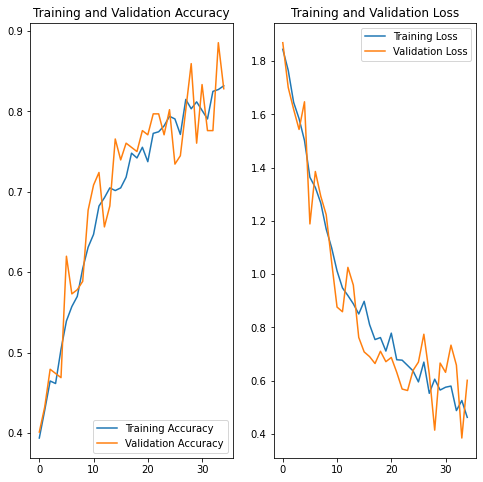

In [28]:
EPOCHS = 35

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Tomato_Leaf_Mold
predicted label: Tomato_Leaf_Mold


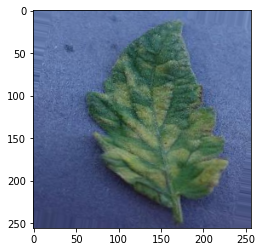

In [34]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [30]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

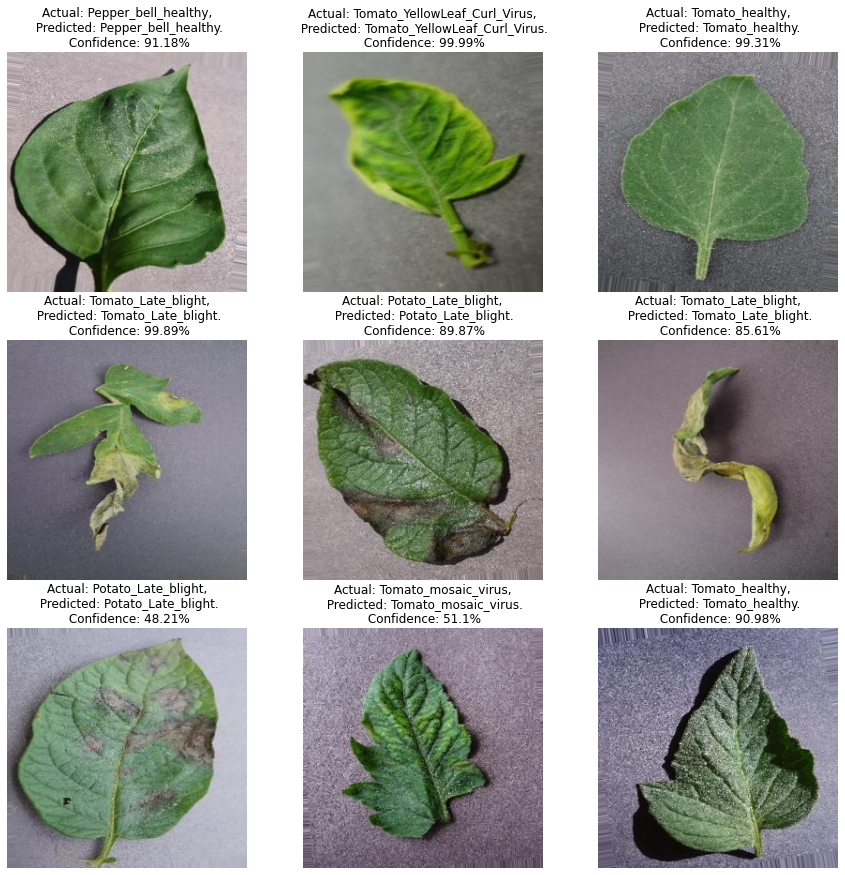

In [32]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [35]:
model.save("../all.h5")